In [53]:
# Import 3rd party libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

# Import local Libraries
sys.path.insert(0, os.path.dirname(os.getcwd()))
#from features.feature_extractor import Features
from utils.plotting.waveforms import plot_waveforms

# Configure Notebook
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Sampling frequency (Hz)
fs = 300  

# Data paths
label_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'labels')
waveform_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'waveforms')
#feature_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'features')

In [3]:
# Read labels CSV
labels = pd.read_csv(os.path.join(label_path, 'labels.csv'), names=['file_name', 'label'])

# View DataFrame
print(labels.head(5))
print(labels['file_name'][0])

  file_name label
0    A00001     N
1    A00002     N
2    A00003     N
3    A00004     A
4    A00005     A
A00001


In [4]:
labels_copy=labels
print(labels_copy)
file_list=[]
for i in range(len(labels_copy['label'])):
    if (labels_copy['label'][i] == 'N') :
        labels_copy['label'][i] = 0
    elif (labels_copy['label'][i] == 'A') :
        labels_copy['label'][i] = 1
    elif (labels_copy['label'][i] == '~') :
        labels_copy['label'][i] = 2

    if (labels_copy['label'][i] == 2) or (labels_copy['label'][i] == 1) or (labels_copy['label'][i] == 0):
        file_list.append(labels['file_name'][i])
    else:
        file = labels['file_name'][i]
        labels_copy=labels_copy.drop(labels[labels.file_name==file].index)
print(file_list)
print(labels_copy)

     file_name label
0       A00001     N
1       A00002     N
2       A00003     N
3       A00004     A
4       A00005     A
5       A00006     N
6       A00007     N
7       A00008     O
8       A00009     A
9       A00010     N
10      A00011     N
11      A00012     N
12      A00013     O
13      A00014     N
14      A00015     A
15      A00016     N
16      A00017     O
17      A00018     N
18      A00019     N
19      A00020     O
20      A00021     N
21      A00022     ~
22      A00023     O
23      A00024     O
24      A00025     N
25      A00026     N
26      A00027     A
27      A00028     N
28      A00029     O
29      A00030     O
...        ...   ...
8498    A08499     O
8499    A08500     A
8500    A08501     O
8501    A08502     N
8502    A08503     N
8503    A08504     O
8504    A08505     N
8505    A08506     N
8506    A08507     N
8507    A08508     N
8508    A08509     N
8509    A08510     O
8510    A08511     O
8511    A08512     N
8512    A08513     N
8513    A0851

In [5]:
import scipy.io as sio
from biosppy.signals import ecg
from biosppy.signals.tools import filter_signal 

file_names = [file.split('.')[0] for file in os.listdir(waveform_path) if file.endswith('.mat')]
label2 = labels_copy

rows_list = []
input_data= pd.DataFrame()


for file in file_list:
    signal = sio.loadmat(os.path.join(waveform_path, file))['val'][0].astype('float')
    # Get BioSPPy ECG object
    ecg_object = ecg.ecg(signal=signal , sampling_rate=300, show=False)
    # Get BioSPPy output
    ts = ecg_object['ts']          # Signal time array
    rpeaks = ecg_object['rpeaks']  # rpeak indices
    hr = ecg_object['heart_rate']  # HR
   
    #if((len(ts)/300)==30):
    print(file)
    try :
        basic_features =[]
        rows_list.append(signal)
        print(rpeaks)
        for i in range(len(rpeaks)-1):
            basic_features.append(rpeaks[i+1]-rpeaks[i])
        feat = pd.DataFrame([basic_features])
        input_data=input_data.append([feat],ignore_index=False)
        print(feat.head())
    except Exception as e:
        print('problem', file, e)
    #else :
     #   label2 = label2.drop(label2[label2.file_name==file].index)
     #   print(file)
     #   print(len(ts)/300,' dropped')
print(input_data.head(20))

A00001
[ 127  342  560  797 1040 1271 1510 1754 1996 2230 2470 2713 2952 3189
 3433 3679 3914 4140 4370 4599 4827 5045 5260 5485 5711 5943 6164 6385
 6608 6827 7040 7259 7482 7697 7909 8128 8355 8586 8810]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  215  218  237  243  231  239  244  242  234  240 ...   219  213  219  223   

    32   33   34   35   36   37  
0  215  212  219  227  231  224  

[1 rows x 38 columns]
A00002
[ 164  470  771 1076 1394 1699 2014 2335 2643 2751 2964 3289 3596 3906
 4219 4522 4818 5120 5369 5474 5558 5630 5774 5847 5949 6241 6531 6818
 7114 7425 7529 7693 7991 8286 8571 8860]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  306  301  305  318  305  315  321  308  108  213 ...   290  287  296  311   

    29   30   31   32   33   34  
0  104  164  298  295  285  289  

[1 rows x 35 columns]
A00003
[  289   512   743   975  1211  1447  1674  1888  2099  2316  2539  2772
  3015  3265  3512 

[1 rows x 56 columns]
A00025
[ 239  526  816 1114 1417 1718 2017 2319 2621 2916 3216 3517 3819 4115
 4416 4716 5012 5304 5600 5895 6193 6485 6780 7074 7367 7654 7944 8234
 8526 8813]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  287  290  298  303  301  299  302  302  295  300 ...   298  292  295  294   

    23   24   25   26   27   28  
0  293  287  290  290  292  287  

[1 rows x 29 columns]
A00026
[ 141  445  752 1060 1368 1674 1983 2294 2600 2909 3221 3534 3842 4152
 4463 4770 5078 5390 5703 6011 6321 6634 6945 7254 7565 7879 8190 8500
 8814]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  304  307  308  308  306  309  311  306  309  312 ...   308  310  313  311   

    22   23   24   25   26   27  
0  309  311  314  311  310  314  

[1 rows x 28 columns]
A00027
[ 234  451  634  823  977 1178 1336 1515 1724 1875 2142 2336 2538 2695
 2878 3085 3234 3423 3635 3781 4052 4318 4516 4720 4881 5068 5266 5417
 5602 58

    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  287  289  292  295  294  292  291  284  282  287 ...   288  287  282  276   

    24   25   26   27   28   29  
0  277  281  282  285  286  285  

[1 rows x 30 columns]
A00050
[  69  328  623  924 1219 1480 1513 1815 2113 2412 2715 3061 3322 3626
 3929 4234 4538 4843 5147 5449 5752 6054 6355 6656 6958 7261 7565 7863
 8166 8469 8766]
    0    1    2    3    4   5    6    7    8    9  ...    20   21   22   23  \
0  259  295  301  295  261  33  302  298  299  303 ...   302  301  301  302   

    24   25   26   27   28   29  
0  303  304  298  303  303  297  

[1 rows x 30 columns]
A00051
[  374   686   990  1297  1610  1913  2214  2511  2812  3113  3407  3702
  4000  4295  4600  4895  5193  5489  5788  6089  6391  6700  7003  7309
  7607  7912  8221  8530  8839  9140  9446  9754 10065 10365 10673 10979
 11285 11586 11893 12205 12514 12817 13121 13417 13717 14015 14315 14614
 14912 15210 15507 15812 16115 16

A00076
[ 326  521  754  983 1215 1446 1676 1904 2125 2345 2565 2784 2999 3211
 3425 3639 3855 4067 4279 4494 4711 4925 5140 5358 5582 5805 6023 6243
 6463 6685 6900 7115 7331 7549 7770 7988 8204 8421 8639 8851]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  195  233  229  232  231  230  228  221  220  220 ...   215  215  216  218   

    33   34   35   36   37   38  
0  221  218  216  217  218  212  

[1 rows x 39 columns]
A00079
[ 228  472  732  990 1262 1544 1837 2134 2425 2705 2967 3212 3460 3722
 3985 4247 4508 4773 5033 5297 5570 5844 6114 6380 6643 6888 7106 7312
 7532 7777 8036 8310 8591 8872]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  244  260  258  272  282  293  297  291  280  262 ...   263  245  218  206   

    27   28   29   30   31   32  
0  220  245  259  274  281  281  

[1 rows x 33 columns]
A00080
[ 240  426  616  807  997 1180 1364 1552 1743 1937 2130 2328 2532 2740
 2946 3146 3349 3556 3767 

    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  332  329  322  312  328  337  334  329  315  305 ...   325  330  325  322   

    21   22   23   24   25   26  
0  312  306  318  327  328  325  

[1 rows x 27 columns]
A00105
[  146   405   667   936  1212  1489  1771  2052  2361  2670  2960  3250
  3540  3830  4136  4444  4750  5073  5374  5674  6016  6351  6689  7014
  7336  7666  7998  8313  8611  8909  9232  9557  9865 10163 10453 10743
 11032 11310 11590 11881 12181 12485 12797 13098 13408 13715 14023 14320
 14633 14953 15264 15561 15864 16161 16478 16789 17083 17391 17710 18029]
    0    1    2    3    4    5    6    7    8    9  ...    49   50   51   52  \
0  259  262  269  276  277  282  281  309  309  290 ...   311  297  303  297   

    53   54   55   56   57   58  
0  317  311  294  308  319  319  

[1 rows x 59 columns]
A00106
[ 129  411  568  842  965 1233 1499 1766 2034 2306 2579 2853 3127 3401
 3674 3945 4213 4478 4746]
    0    1    2   

A00135
[  100   342   598   866  1145  1419  1699  1987  2279  2573  2856  3138
  3424  3719  4019  4314  4597  4879  5165  5464  5770  6079  6369  6656
  6947  7244  7542  7837  8123  8419  8725  9041  9344  9642  9939 10243
 10549 10844 11131 11430 11740 12055 12365 12665 12965 13269 13560 13832
 14087 14343 14604 14881 15174 15475 15770 16069 16381 16701 17023 17331
 17632]
    0    1    2    3    4    5    6    7    8    9  ...    50   51   52   53  \
0  242  256  268  279  274  280  288  292  294  283 ...   277  293  301  295   

    54   55   56   57   58   59  
0  299  312  320  322  308  301  

[1 rows x 60 columns]
A00137
[ 143  342  542  671  819 1027 1160 1354 1518 1695 1906 2063 2236 2488
 2661 2811 2972 3136 3255 3432 3599 3764 4038 4235 4408 4623 4837 5065
 5278 5520 5717 5857 6077 6231 6409 6566 6697 6832 7004 7141 7298 7450
 7598 7818 7962 8132 8278 8545 8698 8825]
    0    1    2    3    4    5    6    7    8    9  ...    39   40   41   42  \
0  199  200  129  148  208

   0    1    2    3    4   5    6   7    8    9  ...    61   62   63   64  \
0  50  149  272  279  179  85  200  73  273  260 ...   258  277  265  239   

    65   66   67   68   69   70  
0  283  269  239  278  270  260  

[1 rows x 71 columns]
A00160
[ 245  437  630  822 1012 1205 1398 1595 1785 1978 2173 2370 2567 2759
 2954 3149 3345 3537 3731 3925 4116 4308 4496 4685 4871 5058 5243 5429
 5616 5803 5992 6180 6367 6559 6749 6935 7118 7301 7486 7671 7855 8039
 8222 8406 8592 8776]
    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  192  193  192  190  193  193  197  190  193  195 ...   183  183  185  185   

    39   40   41   42   43   44  
0  184  184  183  184  186  184  

[1 rows x 45 columns]
A00163
[  97  353  409  733  896 1310 1626 1900 2195 2493 2813 3093 3401 3717
 4048 4341 4656 4977 5312 5607 5920 6233 6557 6843 7148 7473 7772 8055
 8361 8686]
    0   1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  256  56  324  163

A00185
[ 200  368  565  764  969 1175 1381 1588 1795 2002 2204 2407 2616 2757
 2822 3031 3238 3444 3644 3846 4051 4255 4459 4662 4865 5063 5261 5460
 5658 5856 6053 6249 6440 6632 6824 7014 7203 7394 7584 7773 7962 8152
 8343 8533 8724]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  168  197  199  205  206  206  207  207  207  202 ...   190  189  191  190   

    38   39   40   41   42   43  
0  189  189  190  191  190  191  

[1 rows x 44 columns]
A00188
[ 138  380  598  815 1031 1249 1454 1677 1922 2154 2389 2607 2861 3094
 3324 3535 3777 3997 4203 4424 4663 4888 5102 5334 5586 5821 6039 6288
 6504 6749 6959 7204 7430 7655 7880 8089 8317 8573 8815]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  242  218  217  216  218  205  223  245  232  235 ...   245  210  245  226   

    32   33   34   35   36   37  
0  225  225  209  228  256  242  

[1 rows x 38 columns]
A00190
[ 293  535  817 1117 1434 1748 2039 2331 2626 

A00216
[ 114  295  494  645  797  940 1092 1345 1511 1790 2057 2196 2366 2515
 2662 2929 3114 3257 3396 3557 3726 4046 4217 4374 4532 4693 4938 5121
 5382 5541 5715 5889 6118 6304 6481 6735 6946 7131 7320 7482 7673 7809
 8082 8227 8465 8602 8729 8871]
    0    1    2    3    4    5    6    7    8    9  ...    37   38   39   40  \
0  181  199  151  152  143  152  253  166  279  267 ...   189  162  191  136   

    41   42   43   44   45   46  
0  273  145  238  137  127  142  

[1 rows x 47 columns]
A00217
[ 254  523  720  808  987 1184 1510 1722 1924 2166 2382 2604 2800 2994
 3266 3534 3777 4047 4271 4487 4713 4913 5059 5331 5610 5847 6127 6248
 6500 6797 7016 7227 7451 7703 7898 8114 8338 8534 8804]
    0    1   2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  269  197  88  179  197  326  212  202  242  216 ...   297  219  211  224   

    32   33   34   35   36   37  
0  252  195  216  224  196  270  

[1 rows x 38 columns]
A00219
[ 114  344  536  753  890 1088 12

A00238
[ 259  530  800 1079 1365 1647 1923 2206 2491 2779 3065 3339 3609 3886
 4167 4448 4723 4996 5270 5549 5830 6107 6380 6647 6736 6920 7200 7483
 7760 8032 8307 8589 8869]
    0    1    2    3    4    5    6    7    8    9  ...    22  23   24   25  \
0  271  270  279  286  282  276  283  285  288  286 ...   267  89  184  280   

    26   27   28   29   30   31  
0  283  277  272  275  282  280  

[1 rows x 32 columns]
A00239
[ 117  364  567  762  928 1150 1364 1577 1786 2010 2240 2458 2671 2888
 3077 3314 3525 3739 3943 4129 4348 4543 4732 4911 5089]
    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  247  203  195  166  222  214  213  209  224  230 ...   237  211  214  204   

    18   19   20   21   22   23  
0  186  219  195  189  179  178  

[1 rows x 24 columns]
A00240
[ 151  355  558  761  965 1167 1368 1571 1774 1976 2178 2381 2583 2783
 2982 3183 3380 3577 3771 3966 4162 4358 4556 4756 4956 5156 5354 5553
 5662 5753 5955 6160 6362 6563 6765 69

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  276  256  266  273  264  257  265  271  258  261 ...   284  289  277  255   

    26   27   28   29   30   31  
0  279  266  262  294  266  264  

[1 rows x 32 columns]
A00263
[ 270  500  734  967 1201 1435 1671 1909 2147 2385 2623 2864 3106 3348
 3591 3833 4077 4324 4570 4813 5057 5304 5551 5798 6043 6289 6538 6786
 7034 7281 7530 7781 8031 8281 8529 8780]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  230  234  233  234  234  236  238  238  238  238 ...   249  248  248  247   

    29   30   31   32   33   34  
0  249  251  250  250  248  251  

[1 rows x 35 columns]
A00264
[  181   310   443   582   767   915  1074  1324  1485  1883  2200  2365
  2541  2684  2829  3021  3179  3316  3446  3586  3747  3899  4089  4470
  4795  4959  5140  5288  5414  5626  5788  5964  6087  6225  6356  6483
  6845  7153  7309  7679  7986  8285  8587  8787  8934  9089  9238  9591
  9750

A00292
[ 182  438  692  934 1175 1412 1659 1908 2132 2362 2599 2832 3066 3277
 3491]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13
0  256  254  242  241  237  247  249  224  230  237  233  234  211  214
A00294
[ 169  488  749 1125 1454 1778 2100 2419 2733 2984 3353 3669 3983 4288
 4567 4795 5166 5484 5803 6124 6446 6768 7053 7398 7717 8031 8282 8656]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  319  261  376  329  324  322  319  314  251  369 ...   319  321  322  322   

    21   22   23   24   25   26  
0  285  345  319  314  251  374  

[1 rows x 27 columns]
A00295
[  73  305  535  764  996 1228 1459 1690 1921 2155 2386 2615 2845 3080
 3310 3537 3764 3995 4222 4443 4662 4886 5108 5331 5555 5785 6012 6241
 6470 6702 6931 7161 7394 7624 7854 8083 8312 8544 8773]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  232  230  229  232  232  231  231  231  234  231 ...   232  229  230  233   

  

    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  269  279  260  255  263  269  237  242  261  248 ...   248  243  233  229   

    29   30   31   32   33   34  
0  225  220  209  208  208  217  

[1 rows x 35 columns]
A00320
[ 108  351  588  820 1057 1296 1540 1788 2033 2269 2506 2750 3000 3254
 3512 3770 4020 4256 4484 4707 4933 5171 5418 5687 5969 6249 6505 6762
 7020 7272 7516 7752 7985 8214 8438 8660]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  243  237  232  237  239  244  248  245  236  237 ...   256  257  258  252   

    29   30   31   32   33   34  
0  244  236  233  229  224  222  

[1 rows x 35 columns]
A00321
[ 118  278  436  598  782  914 1066 1251 1409 1593 1742 1900 2046 2189
 2393 2493 2679 2835 3022 3175 3343 3488 3657 3800 3974 4114 4271 4412
 4569 4712 4861 4994 5129 5269 5404 5573 5708 5891 6036 6177 6353 6503
 6685 6834 7027 7169 7364 7521 7703 7858 8051 8205 8379 8538 8709 8860]
    0    1   

    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  261  280  283  276  294  309  277  301  314  256 ...   313  262  290  312   

    24   25   26   27   28   29  
0  259  280  300  327  275  284  

[1 rows x 30 columns]
A00355
[  259   482   724   968  1191  1451  1734  1994  2227  2466  2688  2962
  3200  3483  3741  3983  4222  4457  4687  4911  5153  5415  5673  5917
  6157  6390  6624  6861  7111  7356  7595  7845  8109  8344  8574  8802
  9016  9261  9503  9751 10005 10245 10505 10739 10970 11207 11448 11679
 11954 12211 12463 12704 12937 13168 13384 13612 13853 14098 14304 14539
 14768 14995 15229 15454 15696 15947 16203 16460 16715 16972 17218 17447
 17675]
    0    1    2    3    4    5    6    7    8    9  ...    62   63   64   65  \
0  223  242  244  223  260  283  260  233  239  222 ...   225  242  251  256   

    66   67   68   69   70   71  
0  257  255  257  246  229  228  

[1 rows x 72 columns]
A00356
[ 111  351  584  844 1116 1389 1636 

A00375
[  64  258  487  650  830 1047 1211 1393 1611 1773 1956 2175 2336 2530
 2742 2908 3061 3225 3453 3617 3795 4023 4190 4364 4591 4757 4927 5166
 5332 5506 5729 5896 6070 6311 6482 6671 6876 7062 7247 7447 7633 7870
 8038 8239 8444 8633 8879]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  194  229  163  180  217  164  182  218  162  183 ...   186  185  200  186   

    40   41   42   43   44   45  
0  237  168  201  205  189  246  

[1 rows x 46 columns]
A00376
[ 215  454  688  939 1195 1439 1670 1894 2137 2387 2653 2910 3154 3385
 3613 3877 4162 4451 4737 5008 5282 5531 5766 6005 6279 6563 6845 7123
 7378 7620 7865 8132 8406 8680]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  239  234  251  256  244  231  224  243  250  266 ...   274  284  282  278   

    27   28   29   30   31   32  
0  255  242  245  267  274  274  

[1 rows x 33 columns]
A00377
[ 198  442  689  929 1156 1377 1588 1795 1998 2197 2394 2592 

A00403
[ 108  217  288  508  735  969 1195 1432 1674 1914 2160 2414 2670 2927
 3178 3437 3705 3967 4239 4513 4792 5062 5317 5573 5834 6104 6378 6645
 6894 7156 7360 7419 7495 7681 7735 7931 8176 8423 8668]
    0   1    2    3    4    5    6    7    8    9  ...    28   29  30  31  \
0  109  71  220  227  234  226  237  242  240  246 ...   262  204  59  76   

    32  33   34   35   36   37  
0  186  54  196  245  247  245  

[1 rows x 38 columns]
A00404
[ 178  436  701  971 1245 1522 1680 2074 2348 2623 2903 3183 3328 3498
 3736 4002 4137 4306 4555 4827 4965 5139 5386 5655 5791 5961 6206 6477
 6616 6786 7017 7241 7539 7803 7937 8107 8336 8599 8744]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  258  265  270  274  277  158  394  274  275  280 ...   170  231  224  298   

    32   33   34   35   36   37  
0  264  134  170  229  263  145  

[1 rows x 38 columns]
A00405
[ 199  409  575  951 1169 1495 1703 1876 2065 2249 2622 2770 2841]
    0    1    2   

   0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  96  275  282  289  293  296  297  297  294  297 ...   315  327  316  327   

    23   24   25   26   27   28  
0  329  331  323  333  339  332  

[1 rows x 29 columns]
A00429
[ 193  391  589  786  983 1177 1366 1562 1756 1951 2151 2354 2561 2767
 2971 3173 3371 3564 3749 3936 4121 4305 4489 4676 4867 5066 5279 5490
 5710 5928 6144 6354 6561 6764]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  198  198  197  197  194  189  196  194  195  200 ...   191  199  213  211   

    27   28   29   30   31   32  
0  220  218  216  210  207  203  

[1 rows x 33 columns]
A00432
[ 273  431  603  757  875 1051 1169 1288 1428 1550 1702 1856 2074 2202
 2410 2599 2759 2899 3016 3173 3364 3612 3787 3995 4181 4299 4477 4662
 4775 4897 5057 5176 5327 5473 5619 5737 5891 6147 6303 6547 6673 6811
 6985 7122 7262 7379 7580 7750 7864 7980 8123 8327 8524 8666 8822]
    0    1    2    3    4    5

    0    1    2    3    4    5    6    7    8    9  ...    54   55   56   57  \
0  273  267  266  270  274  272  267  268  274  279 ...   271  266  270  273   

    58   59   60   61   62   63  
0  275  271  267  268  260  260  

[1 rows x 64 columns]
A00455
[   97   186   341   586   834  1093  1357  1617  1879  2143  2412  2665
  2907  3168  3427  3693  3969  4246  4519  4798  5078  5346  5612  5883
  6148  6415  6689  6965  7241  7517  7795  8073  8344  8618  8887  9151
  9411  9674  9936 10197 10456 10716 10977 11234 11495 11755 12009 12254
 12501 12746 12994 13242 13492 13748 14008 14265 14527 14788 15048 15297
 15543 15779 16010 16243 16475 16706 16944 17185 17431 17680]
   0    1    2    3    4    5    6    7    8    9  ...    59   60   61   62  \
0  89  155  245  248  259  264  260  262  264  269 ...   246  236  231  233   

    63   64   65   66   67   68  
0  232  231  238  241  246  249  

[1 rows x 69 columns]
A00456
[ 190  314  539  713  851  999 1138 1261 1386 1600 1721 1

    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  222  221  226  229  225  224  229  221  227  223 ...   227  222  224  226   

    32   33   34   35   36   37  
0  222  223  227  233  222  220  

[1 rows x 38 columns]
A00480
[ 175  359  534  710  888 1073 1265 1461 1657 1846 2028 2208 2394 2581
 2761 3115 3304 3502 3698 3899 4102 4304 4497 4687 4876 5066 5261 5458
 5646 5848 6055 6271 6482 6684 6905 7121 7337 7552 7771 7991 8216 8439
 8656 8869]
    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  184  175  176  178  185  192  196  196  189  182 ...   221  216  216  215   

    37   38   39   40   41   42  
0  219  220  225  223  217  213  

[1 rows x 43 columns]
A00481
[  68  342  641  955 1280 1568 1848 2162 2507 2829 3111 3403 3706 3991
 4262 4540 4835 5133 5412 5690 5986 6300 6585 6863 7152 7447 7726 8007
 8305 8598 8870]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  274  299  314  

    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  283  272  260  278  283  281  263  279  280  281 ...   291  292  293  294   

    25   26   27   28   29   30  
0  292  262  233  235  268  271  

[1 rows x 31 columns]
A00504
[ 234  527  819 1105 1396 1687 1972 2263 2554 2842 3129 3419 3708 3993
 4283 4573 4858 5149]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  293  292  286  291  291  285  291  291  288  287  290  289  285  290  290   

    15   16  
0  285  291  
A00505
[ 122  371  618  867 1124 1389 1652 1911 2165 2416 2674 2946 3225 3499
 3762 4014 4259 4497 4738 4991 5260 5543 5821 6088 6344 6590 6834 7081
 7333 7584 7832 8073 8313 8554 8801]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  249  247  249  257  265  263  259  254  251  258 ...   246  244  247  252   

    28   29   30   31   32   33  
0  251  248  241  240  241  247  

[1 rows x 34 columns]
A00506
[ 247  577  88

    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  280  281  279  279  280  279  280  278  275  269 ...   219  256  333  276   

    19   20   21   22   23   24  
0  275  318  293  289  280  282  

[1 rows x 25 columns]
A00527
[ 268  496  721  942 1165 1390 1612 1831 2052 2278 2504 2725 2948 3168
 3387 3608 3833 4063 4291 4515 4732 4950 5162 5372 5577 5786 5997 6211
 6420 6631 6845 7060 7276 7490 7709 7930 8142 8347 8555 8767]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  228  225  221  223  225  222  219  221  226  226 ...   214  215  216  214   

    33   34   35   36   37   38  
0  219  221  212  205  208  212  

[1 rows x 39 columns]
A00528
[ 327  668  979 1321 1663 2002 2332 2672 3007 3337 3677 4018 4342 4681
 5023 5363 5693 6039 6375 6703 7052 7391 7711 8061 8399 8736]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  341  311  342  342  339  330  340  335  330  340 ...   330  34

    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  279  279  280  280  279  280  279  282  280  279 ...   280  282  284  281   

    23   24   25   26   27   28  
0  280  282  278  281  278  278  

[1 rows x 29 columns]
A00560
[  158   339   519   715   935  1147  1358  1581  1800  2002  2183  2361
  2538  2725  2919  3109  3309  3505  3691  3888  4092  4311  4523  4712
  4916  5114  5301  5486  5666  5847  6024  6203  6398  6599  6811  7013
  7216  7426  7639  7850  8050  8239  8444  8658  8887  9104  9311  9521
  9735  9954 10160 10352 10559 10761 10966 11169 11372 11582 11797 12009
 12213 12402 12594 12791 12975 13160 13344 13527 13718 13913 14111 14304
 14501 14697 14881 15069 15271 15478 15691 15895 16086 16293 16501 16715
 16928 17121 17340 17557 17782]
    0    1    2    3    4    5    6    7    8    9  ...    78   79   80   81  \
0  181  180  196  220  212  211  223  219  202  181 ...   204  191  207  208   

    82   83   84   85   86   87  
0  

A00582
[ 140  386  627  872 1114 1351 1604 1853 2098 2354 2605 2847 3103 3349
 3587 3829 4080 4338 4580 4818 5068 5309 5544 5787 6037 6278 6525 6776
 7018 7257 7502 7744 7987 8218 8449 8689]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  246  241  245  242  237  253  249  245  256  251 ...   247  251  242  239   

    29   30   31   32   33   34  
0  245  242  243  231  231  240  

[1 rows x 35 columns]
A00583
[  68  330  589  820  936 1101 1356 1605 1705 1862 2116 2364 2614 2870
 3142 3412 3673 3926 4178 4438 4701 4961 5218 5466 5716 5965 6219 6475
 6735 6987 7238 7488 7749 8013 8276 8537 8793]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  262  259  231  116  165  255  249  100  157  254 ...   256  260  252  251   

    30   31   32   33   34   35  
0  250  261  264  263  261  256  

[1 rows x 36 columns]
A00585
[ 222  473  544  650  712  899 1011 1119 1256 1324 1500 1750 1923 2136
 2349 2601 2775 3000 3041 3201 

A00606
[ 179  442  709  976 1240 1507 1777 2052 2326 2598 2872 3148 3425 3700
 3975 4252 4530 4810 5086 5367 5647 5924 6202 6477 6756 7035 7311 7588
 7871 8153 8433 8715]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  263  267  267  264  267  270  275  274  272  274 ...   278  275  279  279   

    25   26   27   28   29   30  
0  276  277  283  282  280  282  

[1 rows x 31 columns]
A00607
[ 279  575  860 1152 1442 1715 1973 2268 2540 2822 3130 3415 3700 3979
 4273 4553 4829 5125 5412 5686 5973 6269 6558 6831 7092 7370 7681 7971
 8252 8544 8831]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  296  285  292  290  273  258  295  272  282  308 ...   296  289  273  261   

    24   25   26   27   28   29  
0  278  311  290  281  292  287  

[1 rows x 30 columns]
A00609
[ 323  605  879 1154 1422 1690 1937 2193 2454 2738 3011 3297 3614 3922
 4215 4490]
    0    1    2    3    4    5    6    7    8    9    10   11   12   

    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  174  175  176  175  172  173  191  208  215  208 ...   209  201  190  182   

    22   23   24   25   26   27  
0  179  179  182  186  186  216  

[1 rows x 28 columns]
A00631
[ 239  521  798 1077 1357 1637 1908 2185 2459 2940 3197 3486 3800 4101
 4658 4955 5242 5522 5786 6034 6284 6555 6843 7144 7446 7729 7995 8288
 8576 8854]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  282  277  279  280  280  271  277  274  481  257 ...   250  271  288  301   

    23   24   25   26   27   28  
0  302  283  266  293  288  278  

[1 rows x 29 columns]
A00632
[  290   541   800  1070  1356  1646  1938  2231  2518  2795  3059  3313
  3567  3825  4086  4359  4645  4945  5245  5549  5848  6140  6419  6683
  6934  7178  7418  7660  7909  8163  8433  8727  9030  9340  9647  9948
 10240 10515 10777 11028 11277 11526]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33

A00660
[  66  291  359  485  695  892 1094 1308 1473 1701 1852 2143 2368 2608
 2815 3019 3310 3540 3743 3957 4195 4388 4618 4799]
    0   1    2    3    4    5    6    7    8    9  ...    13   14   15   16  \
0  225  68  126  210  197  202  214  165  228  151 ...   207  204  291  230   

    17   18   19   20   21   22  
0  203  214  238  193  230  181  

[1 rows x 23 columns]
A00661
[ 253  513  783 1070 1327 1582 1875 2171 2449 2704 2967 3251 3532 3802
 4055 4315 4606 4923 5212 5486 5761 6065 6372 6651 6927 7224 7546 7864
 8149 8440 8760]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  260  270  287  257  255  293  296  278  255  263 ...   304  307  279  276   

    24   25   26   27   28   29  
0  297  322  318  285  291  320  

[1 rows x 30 columns]
A00662
[ 135  253  316  485  594  699  814  958 1055 1214 1351 1454 1562 1676
 1802 1931 2102 2215 2315 2482 2587 2715 2840 2980 3122 3268 3377 3493
 3598 3765 3908 4045 4158 4325 4422 4512 4616 4770 49

A00683
[ 224  455  695  944 1202 1459 1710 1965 2220 2478 2730 2974 3223 3474
 3722 3961 4205 4455 4707 4950 5192 5441 5694 5941 6183 6433 6688 6935
 7173 7416 7661 7899 8137 8385 8636]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  231  240  249  258  257  251  255  255  258  252 ...   250  255  247  238   

    28   29   30   31   32   33  
0  243  245  238  238  248  251  

[1 rows x 34 columns]
A00685
[   61   340   619   898  1179  1457  1734  2013  2292  2573  2855  3138
  3420  3702  3984  4267  4550  4832  5117  5402  5686  5970  6258  6544
  6830  7116  7402  7684  7967  8250  8533  8816  9099  9382  9664  9942
 10219 10494 10767 11042 11319 11600 11883 12166 12451 12736 13018 13298
 13578 13858 14136 14413 14691 14967]
    0    1    2    3    4    5    6    7    8    9  ...    43   44   45   46  \
0  279  279  279  281  278  277  279  279  281  282 ...   285  285  282  280   

    47   48   49   50   51   52  
0  280  280  278  277  278  27

A00711
[  68  249  435  619  799  981 1164 1348 1532 1715 1899 2079 2258 2440
 2626 2809 2989 3172 3357 3548 3735 3920 4102 4285 4471 4660 4846 5028
 5210 5395 5585 5772 5955 6139 6328 6518 6704 6887 7075 7266 7458 7645
 7831 8020 8215 8405 8590 8779]
    0    1    2    3    4    5    6    7    8    9  ...    37   38   39   40  \
0  181  186  184  180  182  183  184  184  183  184 ...   188  191  192  187   

    41   42   43   44   45   46  
0  186  189  195  190  185  189  

[1 rows x 47 columns]
A00713
[ 183  374  565  758  956 1153 1465 1710 1926 2116 2306 2495 2685 2871
 3063 3255 3457 3660 3961 4198 4430 4641 4851 5062 5277 5498 5726 5950
 6177 6404 6628 6843]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  191  191  193  198  197  312  245  216  190  190 ...   210  211  215  221   

    25   26   27   28   29   30  
0  228  224  227  227  224  215  

[1 rows x 31 columns]
A00714
[  279   536   793  1049  1308  1569  1828  2083  2342  2603  2864

    0    1    2    3    4    5    6    7    8    9  ...    43   44   45   46  \
0  126  120  135  122  132  128  196  187  239  133 ...   137  132  139  125   

    47   48   49   50   51   52  
0  198  181  144  165  243  152  

[1 rows x 53 columns]
A00743
[ 326  677 1001 1316 1658 2020 2338 2684 3042 3371 3711 4043 4369 4718
 5047 5374 5708 6003 6256 6515 6755 7052 7388 7691 7996 8312 8615]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  351  324  315  342  362  318  346  358  329  340 ...   295  253  259  240   

    20   21   22   23   24   25  
0  297  336  303  305  316  303  

[1 rows x 26 columns]
A00747
[  277   567   852  1141  1417  1675  1937  2219  2516  2809  3082  3363
  3653  3948  4231  4500  4782  5071  5357  5622  5882  6155  6445  6745
  7041  7330  7613  7893  8154  8399  8638  8891  9176  9484  9789 10095
 10396 10685 10956 11210 11462 11736 12020 12312 12600 12881 13146 13395
 13633 13874 14139 14431 14727 15022 15311 15595 158

    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  269  268  158  125  280  284  288  282  278  277 ...   264  264  270  259   

    27   28   29   30   31   32  
0  523  269  270  281  283  283  

[1 rows x 33 columns]
A00775
[  214   515   810  1104  1403  1492  1708  2003  2294  2592  2893  3188
  3481  3786  4091  4391  4685  4980  5282  5579  5866  6161  6461  6754
  7041  7337  7636  7930  8219  8510  8804  9102  9396  9687  9982 10281
 10579 10871 11159 11451 11749 12038 12328 12624 12918 13204 13492 13782
 14067 14356 14649 14935 15065 15219 15505 15792 16077 16367 16660 16948
 17231 17524 17825]
    0    1    2    3   4    5    6    7    8    9  ...    52   53   54   55  \
0  301  295  294  299  89  216  295  291  298  301 ...   154  286  287  285   

    56   57   58   59   60   61  
0  290  293  288  283  293  301  

[1 rows x 62 columns]
A00777
[ 135  343  554  764  973 1184 1399 1618 1845 2078 2320 2569 2827 3081
 3331 3580 3825 4062 4296 45

    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  281  328  375  330  358  360  350  332  363  354 ...   342  377  364  352   

    18   19   20   21   22   23  
0  391  350  338  325  385  352  

[1 rows x 24 columns]
A00803
[  82  259  434  608  780  954 1130 1307 1487 1667 1841 2012 2182 2356
 2535 2721 2903 3083 3263 3447 3636 3825 4012 4193 4374 4553 4734 4918
 5104 5285 5464 5642 5821 6002 6191 6385 6572 6755 6938 7122 7310 7498
 7682 7864 8046 8226 8405 8580 8753]
    0    1    2    3    4    5    6    7    8    9  ...    38   39   40   41  \
0  177  175  174  172  174  176  177  180  180  174 ...   184  188  188  184   

    42   43   44   45   46   47  
0  182  182  180  179  175  173  

[1 rows x 48 columns]
A00804
[  99  181  389  615  842 1110 1391 1651 1713 1932 2215 2469 2734 2861
 2972 3202 3421 3632 3881 4133 4384 4635 4892 5127 5379 5630 5858 6088
 6343 6605 6863 7130 7395 7625 7852 8088 8317 8536 8758]
   0    1    2    3    4    5    

A00830
[ 103  321  542  771 1009 1246 1383 1512 1706 1933 2002 2159 2346 2466
 2649 2860 3088 3311 3541 3776 4007 4238 4467 4705 4947 5187 5421 5656
 5894 6131 6361 6591 6823 7058 7291 7518 7752 7990 8222 8452 8681]
    0    1    2    3    4    5    6    7    8   9  ...    30   31   32   33  \
0  218  221  229  238  237  137  129  194  227  69 ...   230  232  235  233   

    34   35   36   37   38   39  
0  227  234  238  232  230  229  

[1 rows x 40 columns]
A00831
[  123   415   682   941  1203  1459  1717  1975  2223  2475  2736  3019
  3313  3594  3871  4144  4409  4658  4906  5157  5426  5692  5956  6219
  6489  6764  7030  7283  7532  7782  8035  8280  8533  8800  9092  9395
  9671  9933 10194 10452 10706 10957 11216 11492 11782 12061 12328 12597
 12867 13124 13375 13631 13900 14166 14431 14706 14977 15234 15489 15742
 15993 16236 16480 16731 16987 17237 17495 17753]
    0    1    2    3    4    5    6    7    8    9  ...    57   58   59   60  \
0  292  267  259  262  256  258 

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  261  268  274  273  278  278  269  273  263  275 ...   258  262  273  282   

    26   27   28   29   30   31  
0  272  280  293  282  285  281  

[1 rows x 32 columns]
A00857
[ 136  289  578  822  910 1074 1270 1626 2023 2413 2768 3131 3529 3670
 3886 4073 4213 4383 4575 4958 5325 5653 5970 6301 6661 7020 7356 7704
 8086 8466 8804]
    0    1    2   3    4    5    6    7    8    9  ...    20   21   22   23  \
0  153  289  244  88  164  196  356  397  390  355 ...   328  317  331  360   

    24   25   26   27   28   29  
0  359  336  348  382  380  338  

[1 rows x 30 columns]
A00858
[ 146  401  658  912 1166 1419 1673 1926 2179 2433 2690 2948 3209 3472
 3737 3999 4262 4530 4795 5059 5318 5578 5842 6105 6369 6629 6888 7149
 7411 7672 7933 8191 8451 8714]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  255  257  254  254  253  254  253  253  254  257 ...   264  260  259

A00880
[ 159  418  716  933 1190 1445 1703 1963 2224 2484 2745 3006 3270 3532
 3793 4053 4167 4316 4580 4843 5105 5367 5633 5898 6162 6424 6687 6954
 7219 7483 7746 8013 8279 8544 8808]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  259  298  217  257  255  258  260  261  260  261 ...   262  263  267  265   

    28   29   30   31   32   33  
0  264  263  267  266  265  264  

[1 rows x 34 columns]
A00881
[ 128  432  739 1051 1355 1650 1952 2256 2543 2835 3133 3432 3719 4018
 4323 4634 4929 5219 5515 5813 6106 6398 6694 6988 7275 7570 7870 8167
 8458 8748]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  304  307  312  304  295  302  304  287  292  298 ...   293  292  296  294   

    23   24   25   26   27   28  
0  287  295  300  297  291  290  

[1 rows x 29 columns]
A00883
[ 254  531  802 1073 1331 1592 1849 2121 2404 2679 2963 3254 3538 3812
 4076 4348 4626 4898 5182 5474 5764 6042 6329 6622 6900 7185 7473 7756


A00912
[ 125  362  600  834 1070 1309 1548 1790 2032 2259 2482 2708 2935 3147
 3370 3597 3828 4035 4244 4459 4676 4877 5086 5289 5492 5624 5886 6157
 6247 6388 6493 6684 6888 7102 7317 7517 7719 7925 8141 8360 8572 8790]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  237  238  234  236  239  239  242  242  227  223 ...   204  214  215  200   

    35   36   37   38   39   40  
0  202  206  216  219  212  218  

[1 rows x 41 columns]
A00915
[  78  274  507  657  853 1053 1254 1448 1644 1843 2041 2237 2432 2628
 2824 3015 3208 3402 3598 3785 3978 4173 4368 4555 4747 4939 5129 5317
 5499 5686 5868 6055 6237 6422 6611 6804 6998 7187 7382 7576 7760 7950
 8139 8327 8508 8692 8878]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  196  233  150  196  200  201  194  196  199  198 ...   189  195  194  184   

    40   41   42   43   44   45  
0  190  189  188  181  184  186  

[1 rows x 46 columns]
A00918
[ 223  610  973 1335 

    0    1    2    3    4    5    6    7    8    9  ...    68   69   70   71  \
0  142  221  216  223  227  231  224  231  232  234 ...   217  221  219  215   

    72   73   74   75   76   77  
0  201  202  202  199  205  207  

[1 rows x 78 columns]
A00941
[ 294  577  861 1143 1419 1679 1930 2182 2433 2683 2935 3188 3415 3696
 3961 4201 4480 4748 4986 5259 5508 5768 6019 6275 6496 6749 6981 7205
 7421 7622 7880 8121 8355 8649]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  283  284  282  276  260  251  252  251  250  252 ...   221  253  232  224   

    27   28   29   30   31   32  
0  216  201  258  241  234  294  

[1 rows x 33 columns]
A00942
[ 268  497  749 1004 1245 1507 1774 2019 2257 2501 2752 2995 3245 3494
 3723 3955 4197 4436 4670 4927 5193 5456 5692 5908 6117 6332 6577 6876
 7162 7419 7648 7888 8127 8361 8601 8846]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  229  252  255  241  262  267  245  238  2

    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  122  192  291  276  282  119  163  281  276  278 ...   283  286  274  283   

    27   28   29   30   31   32  
0  299  284  284  284  289  280  

[1 rows x 33 columns]
A00967
[   75   349   621   882  1144  1428  1727  2019  2326  2632  2920  3209
  3499  3781  4071  4368  4653  4949  5249  5530  5819  6125  6415  6693
  6982  7256  7526  7805  8086  8359  8658  8955  9236  9531  9816 10096
 10389 10678 10946 11219 11504 11770 12046 12338 12619 12885 13168 13462
 13747 14039 14331 14611 14886 15166 15468 15760 16046 16346 16654 16947
 17232 17517 17795]
    0    1    2    3    4    5    6    7    8    9  ...    52   53   54   55  \
0  274  272  261  262  284  299  292  307  306  288 ...   280  302  292  286   

    56   57   58   59   60   61  
0  300  308  293  285  285  278  

[1 rows x 62 columns]
A00969
[ 283  596  897 1210 1520 1821 2116 2429 2737 3037 3345 3670 3977 4276
 4588 4901 5195 5469 5746 

A00995
[ 114  293  478  671  865 1047 1231 1422 1607 1796 1996 2208 2395 2592
 2814 3030 3220 3412 3611 3812 4001 4189 4389 4606 4838 5032 5215 5398
 5589 5793 5997 6183 6371 6570 6773 6979 7163 7345 7532 7722 7909 8093
 8279 8473 8678 8871]
    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  179  185  193  194  182  184  191  185  189  200 ...   184  182  187  190   

    39   40   41   42   43   44  
0  187  184  186  194  205  193  

[1 rows x 45 columns]
A00996
[ 300  567  820 1081 1349 1633 1929 2232 2528 2803 3084 3370 3663 3949
 4243 4546 4855 5152 5450 5753 6052 6349 6628 6912 7206 7507 7807 8084
 8365 8655]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  267  253  261  268  284  296  303  296  275  281 ...   299  297  279  284   

    23   24   25   26   27   28  
0  294  301  300  277  281  290  

[1 rows x 29 columns]
A00998
[ 169  505  739 1000 1260 1533 1819 2109 2390 2661 2930 3221 3530 3821
 4132 4435 4729

A01016
[  283   523   765  1023  1284  1544  1801  2049  2302  2558  2800  3038
  3287  3545  3797  4046  4297  4552  4797  5041  5296  5556  5820  6070
  6321  6574  6819  7074  7333  7580  7835  8086  8331  8589  8848  9094
  9334  9571  9794 10003 10235 10450 10663 10890 11117 11355 11568 12013
 12254 12480 12694 12924 13168 13418 13660 13901]
    0    1    2    3    4    5    6    7    8    9  ...    45   46   47   48  \
0  240  242  258  261  260  257  248  253  256  242 ...   213  445  241  226   

    49   50   51   52   53   54  
0  214  230  244  250  242  241  

[1 rows x 55 columns]
A01017
[  70  381  683  968 1251 1531 1808 2083 2367 2636 2926 3211 3496 3766
 4051 4319 4602 4875 5150 5425 5686 5819 5948 6217 6483 6748 7002 7269
 7533]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  311  302  285  283  280  277  275  284  269  290 ...   275  261  133  129   

    22   23   24   25   26   27  
0  269  266  265  254  267  264  

[1 rows x 28 

A01038
[ 188  423  673  929 1159 1386 1628 1882 2118 2347 2581 2815 3037 3268
 3513 3741 3962 4193 4425 4651 4865 5093 5337 5561 5795 6035 6260 6479
 6706 6932 7149 7373 7608 7833 8055 8288 8522 8744]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  235  250  256  230  227  242  254  236  229  234 ...   227  226  217  224   

    31   32   33   34   35   36  
0  235  225  222  233  234  222  

[1 rows x 37 columns]
A01039
[ 302  563  831 1105 1365 1629 1904 2185 2474 2757 3025 3300 3580 3863
 4134 4400 4678 4959 5230 5492 5758 6028 6305 6583 6864 7148 7424 7701
 7974 8240 8497 8755]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  261  268  274  260  264  275  281  289  283  268 ...   277  278  281  284   

    25   26   27   28   29   30  
0  276  277  273  266  257  258  

[1 rows x 31 columns]
A01041
[ 352  594  809 1087 1322 1563 1821 2074 2326 2584 2850 3085 3312 3578
 3803 4043 4290 4589 4903 5125 5354 5606 5853 

    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  113  114  173  241  224  286  160  421  295  290 ...   293  298  298  294   

    22   23   24   25   26   27  
0  246  363  247  350  306  309  

[1 rows x 28 columns]
A01064
[ 106  325  539  742  949 1159 1386 1635 1899 2160 2420 2683 2827 2950
 3212]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13
0  219  214  203  207  210  227  249  264  261  260  263  144  123  262
A01066
[ 179  263  481  708  937 1159 1368 1576 1786 1999 2213 2433 2656 2875
 3092 3318 3543 3772 3996 4210 4428 4657 4885 5120 5343 5568 5794 6030
 6101 6171 6242 6313 6383 6455 6569 6738 6851 6975 7098 7285 7542 7614
 7780 7846 7969 8062 8281 8505 8735 8955 9168 9455]
   0    1    2    3    4    5    6    7    8    9  ...    41  42   43  44  \
0  84  218  227  229  222  209  208  210  213  214 ...   166  66  123  93   

    45   46   47   48   49   50  
0  219  224  230  220  213  287  

[1 rows x 51 columns]
A

A01101
[ 293  541  785 1029 1268 1498 1731 1973 2224 2473 2712 2956 3203 3451
 3694 3927 4160 4394 4633 4872 5110 5354 5598 5845 6088 6324 6562 6801
 7044 7282 7514 7749 7985 8228 8467 8703]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  248  244  244  239  230  233  242  251  249  239 ...   238  239  243  238   

    29   30   31   32   33   34  
0  232  235  236  243  239  236  

[1 rows x 35 columns]
A01102
[ 177  368  561  759  963 1164 1365 1570 1777 1985 2196 2398 2595 2795
 2996 3198 3401 3600 3801 4002 4206 4414 4619 4821 5022 5225 5427 5630
 5827 6025 6224 6424 6627 6829 7025 7222 7422 7621 7821 8021 8218 8417
 8616 8817]
    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  191  193  198  204  201  201  205  207  208  211 ...   196  197  200  199   

    37   38   39   40   41   42  
0  200  200  197  199  199  201  

[1 rows x 43 columns]
A01104
[ 172  457  635  825 1119 1294 1482 1680 1943 2123 2315 2602 2782 

A01122
[  181   488   809  1128  1467  1784  2084  2410  2735  3059  3406  3717
  4046  4376  4697  5024  5355  5686  6014  6331  6659  6980  7281  7605
  7924  8236  8554  8894  9194  9510  9834 10159 10482 10819 11123 11447
 11786 12083 12404 12723 13049 13366 13714 14017 14344 14682 14987 15312
 15638 15958 16271 16592 16910 17231 17546 17868]
    0    1    2    3    4    5    6    7    8    9  ...    45   46   47   48  \
0  307  321  319  339  317  300  326  325  324  347 ...   305  325  326  320   

    49   50   51   52   53   54  
0  313  321  318  321  315  322  

[1 rows x 55 columns]
A01123
[ 221  466  720  975 1222 1469 1710 1944 2173 2393 2614 2830 3041 3265
 3500 3748 3990 4242 4494 4743 4987 5224 5461 5698 5939 6184 6435 6679
 6929 7183 7441 7704 7966 8222 8482 8737]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  245  254  255  247  247  241  234  229  220  221 ...   251  244  250  254   

    29   30   31   32   33   34  
0  258  263  

A01147
[ 186  436  682  926 1163 1399 1639 1877 2111 2342 2573 2806 3041 3281
 3523 3769 4019 4271 4529 4788 5052 5316 5581 5831 6076 6321 6574 6835
 7092 7351 7611 7867 8119 8372 8627 8876]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  250  246  244  237  236  240  238  234  231  231 ...   253  261  257  259   

    29   30   31   32   33   34  
0  260  256  252  253  255  249  

[1 rows x 35 columns]
A01148
[ 151  464  773 1086 1402 1715 2026 2341 2656 2848 2969 3073 3278 3592
 3906]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13
0  313  309  313  316  313  311  315  315  192  121  104  205  314  314
A01149
[ 169  472  785 1092 1435 1690 1975 2261 2557 2868 3181 3492 3793 4093
 4406 4739 4971 5044 5372 5674 5968 6267 6559 6843 7121 7388 7649 7917
 8196 8486 8801]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  303  313  307  343  255  285  286  296  311  313 ...   299  292  284  278   

 

A01176
[ 107  332  557  782  940 1008 1233 1416 1672 1897 2122 2347 2573 2755
 2973 3198 3423 3648 3874 4099 4282 4538 4763 4988 5213 5438 5621 5839
 6064 6289 6515 6672 6740 6965 7147 7404 7629 7854 8079 8305 8488 8705]
    0    1    2    3   4    5    6    7    8    9  ...   31   32   33   34  \
0  225  225  225  158  68  225  183  256  225  225 ...   68  225  182  257   

    35   36   37   38   39   40  
0  225  225  225  226  183  217  

[1 rows x 41 columns]
A01179
[ 118  346  579  811 1038 1261 1480 1698 1910 2105 2300 2505 2718 2941
 3176 3424 3673 3906 4111 4326 4538 4753 4973 5188 5393 5605 5821 6044
 6273 6494 6690 6904 7118 7339 7549 7743 7953 8169 8394 8610 8804]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  228  233  232  227  223  219  218  212  195  195 ...   214  214  221  210   

    34   35   36   37   38   39  
0  194  210  216  225  216  194  

[1 rows x 40 columns]
A01181
[ 236  479  732  985 1235 1484 1736 1984 2245 2506 2769 

    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  200  199  201  202  206  202  203  202  205  203 ...   194  194  195  195   

    37   38   39   40   41   42  
0  195  196  199  201  203  202  

[1 rows x 43 columns]
A01205
[ 213  433  648  867 1096 1333 1553 1769 1987 2213 2442 2666 2880 3092
 3306 3526 3745 3959 4182 4403 4637 4855 5070 5287 5509 5735 5947 6153
 6363 6578 6799 7021 7233 7443 7655 7871 8088 8301 8503 8705 8909 9118
 9331]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  220  215  219  229  237  220  216  218  226  229 ...   210  212  216  217   

    36   37   38   39   40   41  
0  213  202  202  204  209  213  

[1 rows x 42 columns]
A01206
[ 256  548  813 1084 1367 1651 1919 2191 2470 2747 3009 3271 3539 3810
 4064 4317 4585 4862 5125 5380 5641 5905 6166 6411 6668 6931 7196 7447
 7712 7979 8225 8483 8743]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  292  265  

A01232
[ 170  420  677  938 1202 1471 1741 2012 2284 2555 2826 3095 3363 3628
 3895 4157 4419 4677 4934 5187 5439 5687 5936 6184 6433 6685 6936 7192
 7449 7707 7967 8226 8486 8742]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  250  257  261  264  269  270  271  272  271  271 ...   249  252  251  256   

    27   28   29   30   31   32  
0  257  258  260  259  260  256  

[1 rows x 33 columns]
A01233
[ 312  622  714  889 1162 1441 1717 2016 2288 2559 2767 3025 3297 3553
 3760 3973 4178 4391 4705 4926 5093 5358 5642 5951 6199 6362 6515 6628
 6801 7060 7343 7517 7774 8050 8222 8346 8482 8764]
    0   1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  310  92  175  273  279  276  299  272  271  208 ...   173  259  283  174   

    31   32   33   34   35   36  
0  257  276  172  124  136  282  

[1 rows x 37 columns]
A01234
[ 308  590  869 1144 1425 1708 1921 1987 2268 2552 2836 3115 3396 3679
 3953 4227 4504 4781 5053 5329 5607 58

 16585 16650 16762 16873 17049 17251 17319 17538 17755 17965]
    0    1    2    3    4    5    6    7    8    9  ...    71  72   73   74  \
0  225  236  228  227  229  225  236  244  235  228 ...   151  65  112  111   

    75   76  77   78   79   80  
0  176  202  68  219  217  210  

[1 rows x 81 columns]
A01262
[ 272  509  747  988 1231 1472 1712 1951 2191 2434 2674 2915 3152 3391
 3630 3871 4113 4358 4603 4848 5092 5339 5584 5830 6075 6321 6567 6812
 7056 7299 7541 7780 8018 8257 8497 8743]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  237  238  241  243  241  240  239  240  243  240 ...   246  245  244  243   

    29   30   31   32   33   34  
0  242  239  238  239  240  246  

[1 rows x 35 columns]
A01264
[ 130  328  526  723  920 1116 1311 1504 1702 1906 2114 2321 2528 2733
 2937 3142 3349 3554 3757 3959 4165 4368 4571 4774 4974 5171 5369 5569
 5773 5982 6201 6421 6645 6869 7094 7325 7555 7783 8006 8226 8442 8666]
    0    1    2    3    4 

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  257  255  255  258  258  257  255  229  280  258 ...   257  239  272  258   

    28   29   30   31   32   33  
0  256  258  257  257  257  258  

[1 rows x 34 columns]
A01290
[  70  245  466  625  775  924 1075 1232 1410 1570 1724 1875 2036 2212
 2367 2522 2670 2819 2968 3121 3301 3461 3669 3830 3978 4127 4276 4425
 4579 4758 4918 5127 5286 5436 5584 5733 5881 6036 6217 6380 6587 6745
 6812 6896 7044 7192 7340 7488 7635 7804 7974 8133 8286 8436 8586 8744]
    0    1    2    3    4    5    6    7    8    9  ...    45   46   47   48  \
0  175  221  159  150  149  151  157  178  160  154 ...   148  148  147  169   

    49   50   51   52   53   54  
0  170  159  153  150  150  158  

[1 rows x 55 columns]
A01293
[ 172  393  600  795  988 1181 1379 1580 1780 1975 2144 2344 2528 2702
 2877 3056 3246 3440 3643 3862 4079 4305 4530 4764 4994 5198 5395 5591
 5792 5996 6189 6373 6554 6744 6933 7133 7351 7569 7774

A01320
[ 198  442  700  959 1232 1499 1763 2039 2315 2606 2880 3144 3442 3659
 3874 4154 4376 4673 4971 5316 5618 5914 6201 6475 6754 7034 7298 7590
 7885 8169 8459 8771]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  244  258  259  273  267  264  276  276  291  274 ...   287  274  279  280   

    25   26   27   28   29   30  
0  264  292  295  284  290  312  

[1 rows x 31 columns]
A01321
[ 149  362  577  795 1011 1222 1432 1645 1859 2071 2278 2482 2690 2901
 3119 3339 3556 3697 3782 4008 4236 4464 4686 4913 5141 5372 5611 5844
 6080 6320 6566 6814 7061 7307 7554 7804 8051 8294 8535 8773]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  213  215  218  216  211  210  213  214  212  207 ...   246  248  247  246   

    33   34   35   36   37   38  
0  247  250  247  243  241  238  

[1 rows x 39 columns]
A01323
[ 260  488  713  941 1175 1415 1659 1905 2146 2383 2627 2872 3118 3366
 3611 3852 4087 4330 4572 4818 5069 

A01346
[  116   387   651   917  1179  1247  1417  1645  1866  2084  2293  2501
  2715  2938  3164  3389  3607  3824  4039  4248  4453  4659  4865  5069
  5268  5468  5668  5876  6089  6298  6503  6707  6910  7117  7327  7534
  7740  7946  8157  8373  8584  8793  9005  9227  9457  9684  9911 10144
 10384 10614 10835 11054 11267 11476 11682 11887 12091 12300 12509 12723
 12938 13163 13393 13616 13831 14035 14232 14425 14615 14804 14992 15185
 15378 15570 15761 15955 16159 16374 16587 16799 17013 17231 17438 17640
 17838]
    0    1    2    3   4    5    6    7    8    9  ...    74   75   76   77  \
0  271  264  266  262  68  170  228  221  218  209 ...   194  204  215  213   

    78   79   80   81   82   83  
0  212  214  218  207  202  198  

[1 rows x 84 columns]
A01347
[ 212  429  511  651  860 1082 1297 1509 1715 1926 2141 2359 2578 2799
 3021 3246 3465 3688 3909 4125 4335 4544 4755 4965 5175 5387 5604 5823
 6041 6258 6481 6702 6923 7140 7362 7581 7803 8024 8248 8474 8695]
    0   

A01371
[   95   207   319   434   564   687   798   909  1067  1259  1418  1576
  1709  1833  1963  2103  2212  2330  2480  2631  2759  2901  3057  3207
  3354  3482  3622  3748  3872  3994  4115  4236  4359  4482  4611  4752
  4876  5026  5163  5348  5494  5601  5723  5839  5949  6060  6167  6313
  6460  6591  6728  6844  6963  7089  7199  7310  7418  7571  7704  7840
  7959  8072  8205  8330  8425  8537  8657  8777  9007  9136  9263  9382
  9497  9635  9767  9952 10116 10242 10396 10567 10714 10865 10972 11136
 11307 11423 11536 11654 11762 11937 12092 12220 12371 12505 12616 12810
 12936 13060 13178 13314 13465 13591 13718 13866 13992 14124 14300 14450
 14585 14716 14825 14932 15091 15208 15335 15464 15592 15717 15845 15968
 16104 16220 16341 16496 16672 16822 16936 17068 17228 17348 17476 17606
 17733]
   0    1    2    3    4    5    6    7    8    9   ...   122  123  124  125  \
0  112  112  115  130  123  111  111  158  192  159 ...   155  176  150  114   

   126  127  128  129

A01393
[ 142  241  342  606  780  841 1075 1307 1532 1745 1966 2195 2425 2659
 2898 3136 3374 3609 3854 4094 4334 4576 4816 5051 5275 5501 5733 5970
 6204 6443 6684 6931 7171 7414 7660 7907 8143 8381 8625 8872]
   0    1    2    3   4    5    6    7    8    9  ...    29   30   31   32  \
0  99  101  264  174  61  234  232  225  213  221 ...   241  247  240  243   

    33   34   35   36   37   38  
0  246  247  236  238  244  247  

[1 rows x 39 columns]
A01395
[  70  187  442  717 1015 1150 1289 1417 1560 1685 1809 1943 2135 2331
 2460 2624 2755 2980 3303 3544 3662 3819 4048 4184 4369 4544 4707 4853
 5184 5315 5435 5573 5979 6108 6250 6389 6631 6827 7090 7215 7456 7714
 7833 7958 8086 8279 8511 8635 8752]
    0    1    2    3    4    5    6    7    8    9  ...    38   39   40   41  \
0  117  255  275  298  135  139  128  143  125  124 ...   125  241  258  119   

    42   43   44   45   46   47  
0  125  128  193  232  124  117  

[1 rows x 48 columns]
A01396
[ 244  519  786 1069 1350

A01422
[  275   583   906  1241  1576  1912  2248  2585  2912  3236  3572  3910
  4249  4588  4925  5257  5581  5913  6248  6585  6921  7255  7581  7905
  8241  8575  8906  9226  9536  9858 10176 10484 10790 11109 11431 11752
 12068 12394 12723 13053 13376 13704 14034 14361 14681 14986 15293 15612
 15933 16255 16581 16906 17227 17556]
    0    1    2    3    4    5    6    7    8    9  ...    43   44   45   46  \
0  308  323  335  335  336  336  337  327  324  336 ...   320  305  307  319   

    47   48   49   50   51   52  
0  321  322  326  325  321  329  

[1 rows x 53 columns]
A01423
[  98  410  660  957 1186 1430 1681 1939 2164 2411 2697 3007 3241 3535
 3757 3998 4292 4530 4821 5046 5285 5527 5812 6032 6281 6507 6742 6982
 7232 7462 7722 7938 8194 8422 8653]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  312  250  297  229  244  251  258  225  247  286 ...   226  235  240  250   

    28   29   30   31   32   33  
0  230  260  216  256  228  23

A01447
[  217   520   828  1139  1449  1756  2062  2368  2676  2977  3276  3577
  3877  4179  4477  4777  5080  5382  5678  5976  6276  6573  6871  7169
  7471  7768  8068  8370  8667  8967  9265  9564  9859 10159 10457 10753
 11047 11342 11636 11926 12216 12508 12795 13085 13377 13674 13970 14273
 14579 14884 15191 15500 15806 16112 16418 16721 17022 17324 17626]
    0    1    2    3    4    5    6    7    8    9  ...    48   49   50   51  \
0  303  308  311  310  307  306  306  308  301  299 ...   305  307  309  306   

    52   53   54   55   56   57  
0  306  306  303  301  302  302  

[1 rows x 58 columns]
A01448
[ 189  430  537  712  763  912 1081 1151 1384 1620 1852 2084 2318 2549
 2779 3028 3245 3485 3723 3961 4225 4455 4704]
    0    1    2   3    4    5   6    7    8    9  ...    12   13   14   15  \
0  241  107  175  51  149  169  70  233  236  232 ...   231  230  249  217   

    16   17   18   19   20   21  
0  240  238  238  264  230  249  

[1 rows x 22 columns]
A01449
[

A01479
[ 310  602  922 1223 1517 1812 2108 2410 2713 3006 3295 3591 3887 4172
 4460 4755 5049 5337 5628 5918 6208 6504 6793 7090 7382 7682 7980 8281
 8581 8880]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  292  320  301  294  295  296  302  303  293  289 ...   290  296  289  297   

    23   24   25   26   27   28  
0  292  300  298  301  300  299  

[1 rows x 29 columns]
A01480
[  229   497   774  1062  1350  1638  1934  2223  2511  2794  3079  3354
  3632  3907  4186  4463  4746  5027  5303  5580  5853  6118  6387  6661
  6930  7197  7467  7727  7986  8244  8500  8757  9016  9272  9531  9772
 10044 10303]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  268  277  288  288  288  296  289  288  283  285 ...   259  258  256  257   

    31   32   33   34   35   36  
0  259  256  259  241  272  259  

[1 rows x 37 columns]
A01481
[ 100  446  792 1122 1443 1754 2044 2365 2711 3026 3339 3683 4041 4333
 4632 4921 5202 5

A01506
[  95  416  736 1066 1416 1776 2128 2481 2839 3205 3578 3924 4280 4645
 5007 5364 5715 6082 6438 6791 7135 7486 7842 8196 8535 8875]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  321  320  330  350  360  352  353  358  366  373 ...   351  367  356  353   

    19   20   21   22   23   24  
0  344  351  356  354  339  340  

[1 rows x 25 columns]
A01507
[  64  283  502  722  945 1170 1395 1617 1839 2064 2291 2515 2739 2967
 3196 3425 3650 3874 4101 4331 4562 4788 5014 5241 5470 5701 5930 6157
 6386 6618 6850 7081 7308 7536 7767 8000 8233 8463 8697]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  219  219  220  223  225  225  222  222  225  227 ...   232  232  231  227   

    32   33   34   35   36   37  
0  228  231  233  233  230  234  

[1 rows x 38 columns]
A01508
[ 237  473  709  950 1192 1435 1679 1923 2172 2422 2669 2919 3165 3405
 3648 3888 4123 4361 4596 4829 5064 5305 5544 5785 6031 6276 6518 6757
 

A01537
[ 118  380  651  927 1206 1470 1739 2014 2290 2560 2832 3093 3341 3601
 3863 4131 4404 4666 4939 5220 5499 5760 6023 6289 6558 6825 7085 7359
 7629 7901 8185 8477 8767]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  262  271  276  279  264  269  275  276  270  272 ...   266  269  267  260   

    26   27   28   29   30   31  
0  274  270  272  284  292  290  

[1 rows x 32 columns]
A01538
[ 184  444  716  997 1257 1523 1790 2055 2312 2569 2830 3083 3336 3598
 3862 4120 4366 4609 4861 5114 5361 5621 5887 6148 6405 6661 6757 6933
 7187 7444 7700 7957 8218 8464 8713]
    0    1    2    3    4    5    6    7    8    9  ...    24  25   26   27  \
0  260  272  281  260  266  267  265  257  257  261 ...   256  96  176  254   

    28   29   30   31   32   33  
0  257  256  257  261  246  249  

[1 rows x 34 columns]
A01539
[  181   401   624   847  1072  1301  1516  1732  1944  2153  2364  2581
  2810  3042  3277  3510  3734  3939  4146  4338  4529  

A01560
[ 247  495  755 1016 1275 1532 1787 2044 2304 2561 2811 3067 3327 3588
 3854 4117 4380 4647 4914 5179 5436 5698 5960 6225 6488 6749 7014 7281
 7552 7818 8085 8356 8626]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  248  260  261  259  257  255  257  260  257  250 ...   265  263  261  265   

    26   27   28   29   30   31  
0  267  271  266  267  271  270  

[1 rows x 32 columns]
A01562
[ 363  532  744 1099 1455 1804 2179 2526 2872 3041 3251 3598 3944 4115
 4316 4662 5012 5357 5722 6063 6412 6756 7100 7276 7471 7814 8166 8519
 8867]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  169  212  355  356  349  375  347  346  169  210 ...   341  349  344  344   

    22   23   24   25   26   27  
0  176  195  343  352  353  348  

[1 rows x 28 columns]
A01566
[ 114  349  595  841 1081 1317 1541 1766 1993 2222 2450 2677 2899 3123
 3354 3593 3824 4041 4268 4497 4727 4953 5173 5392 5616 5849 6084 6312
 6543 6773 7016

A01593
[ 108  322  530  691  936 1136 1331 1533 1729 2129 2331 2532 2725 2923
 3120 3326 3454 3522 3727 3923 4122 4316 4513 4710 4803 4906 5103 5296
 5491 5885 6269 6462 6661 6857 6925 7294 7417 7612 7736 7820 8034 8237
 8439 8636 8831]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  214  208  161  245  200  195  202  196  400  202 ...   369  123  195  124   

   38   39   40   41   42   43  
0  84  214  203  202  197  195  

[1 rows x 44 columns]
A01594
[  99  322  611  873 1217 1445 1646 1866 2087 2432 2605 2801 3016 3258]
    0    1    2    3    4    5    6    7    8    9    10   11   12
0  223  289  262  344  228  201  220  221  345  173  196  215  242
A01595
[ 296  545  803 1066 1326 1586 1841 2099 2356 2610 2865 3121 3383 3652
 3918 4183 4456 4722 4979 5236 5493 5749 6000 6253 6508 6765 7017 7267
 7519 7778 8045 8307 8568 8833]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  249  258  263  260  260  255  258  2

    0    1    2    3    4    5    6    7    8    9  ...    46   47   48   49  \
0  222  225  227  227  223  216  214  222  234  244 ...   201  203  201  202   

    50   51   52   53   54   55  
0  208  215  219  225  229  226  

[1 rows x 56 columns]
A01618
[ 192  335  541  734  880 1078 1272 1420 1612 1813 2006 2209 2413 2607
 2759 2951 3144 3407]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  143  206  193  146  198  194  148  192  201  193  203  204  194  152  192   

    15   16  
0  193  263  
A01621
[ 175  369  564  759  953 1146 1338 1527 1779 1947 2076 2259 2449 2644
 2845 3052 3262 3476 3688 3894 4097 4296 4488]
    0    1    2    3    4    5    6    7    8    9  ...    12   13   14   15  \
0  194  195  195  194  193  192  189  252  168  129 ...   195  201  207  210   

    16   17   18   19   20   21  
0  214  212  206  203  199  192  

[1 rows x 22 columns]
A01623
[ 103  370  642  921 1186 1443 1708 1971 2236 2498 2755 3002 3240 3469
 369

    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  211  208  204  203  198  196  205  196  198  194 ...   195  196  194  201   

    34   35   36   37   38   39  
0  206  204  198  201  197  196  

[1 rows x 40 columns]
A01657
[  84  289  499  711  923 1135 1343 1544 1741 1937 2136 2341 2554 2772
 2990 3200 3404 3606 3807 4006 4199 4390 4580 4770 4960 5149 5336 5522
 5705 5887 6067 6247 6426 6610 6803 7010 7229 7447 7656 7860 8063 8264
 8464 8659 8850]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  205  210  212  212  212  208  201  197  196  199 ...   207  219  218  209   

    38   39   40   41   42   43  
0  204  203  201  200  195  191  

[1 rows x 44 columns]
A01658
[ 124  342  521  741  917 1137 1324 1503 1700 1914 2110 2285 2501 2700
 2895 3074 3291 3485 3680 3855 4051 4270 4461 4655 4823 5015 5231 5422
 5617 5812 6000 6176 6390 6567 6764 6979 7172 7366 7557 7735 7948 8140
 8330 8501 8690]
    0    1    2    3  

    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  223  229  230  237  241  246  238  239  246  242 ...   236  247  257  257   

    29   30   31   32   33   34  
0  253  254  260  262  259  248  

[1 rows x 35 columns]
A01684
[ 239  475  710  947 1184 1421 1662 1903 2145 2393 2642 2890 3138 3384
 3633 3884 4132 4381 4624 4864 5107 5351 5593 5836 6072 6309 6548 6784
 7024 7261 7497 7738 7979 8221 8461 8698]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  236  235  237  237  237  241  241  242  248  249 ...   239  236  240  237   

    29   30   31   32   33   34  
0  236  241  241  242  240  237  

[1 rows x 35 columns]
A01685
[  316   556   732   872  1148  1295  1588  1837  1974  2177  2334  2506
  2687  2895  3261  3464  3716  3886  4106  4366  4595  4850  5110  5347
  5606  5840  6107  6348  6530  6787  7047  7300  7557  7814  8062  8338
  8567  8866  9104  9264  9535  9869 10157 10385 10673 10904 11150 11337
 11619

A01706
[ 169  451  616  718  983 1186 1309 1516 1760 2011 2275 2558 2816 3108]
    0    1    2    3    4    5    6    7    8    9    10   11   12
0  282  165  102  265  203  123  207  244  251  264  283  258  292
A01707
[  142   235   381   452   541   634   700   798   924  1038  1147  1264
  1338  1508  1766  1904  2021  2125  2310  2375  2486  2576  2713  2814
  2934  3010  3151  3294  3387  3481  3548  3696  3837  3907  4014  4015
  4159  4250  4371  4449  4538  4731  4820  4957  5044  5174  5279  5393
  5506  5639  5854  5949  6015  6117  6199  6324  6396  6520  6610  6716
  6822  6900  6964  7106  7202  7343  7379  7543  7633  7706  7854  7977
  8114  8210  8242  8483  8678  8805  8932  9036  9148  9346  9524  9618
  9860 10007 10082 10169 10238 10329 10345 10460 10584 10690 10762 10876
 11041 11141 11236]
   0    1   2   3   4   5   6    7    8    9  ...  88  89   90   91   92  93  \
0  93  146  71  89  93  66  98  126  114  109 ...  91  16  115  124  106  72   

    94   95   9

A01732
[  91  400  684  956 1244 1529 1810 2088 2362 2636 2910 3187 3468 3750
 4032 4315 4596 4873 5151 5429 5704 5977 6249 6522 6792 7065 7339 7612
 7884 8154 8428 8702]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  309  284  272  288  285  281  278  274  274  274 ...   272  273  270  273   

    25   26   27   28   29   30  
0  274  273  272  270  274  274  

[1 rows x 31 columns]
A01733
[ 149  396  649  907 1167 1421 1683 1950 2207 2468 2734 2994 3255 3517
 3777 4028 4283 4544 4795 5040 5290 5544 5786 6031 6283 6532 6775 7020
 7267 7510 7751 7994 8239 8483 8728]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  247  253  258  260  254  262  267  257  261  266 ...   249  243  245  247   

    28   29   30   31   32   33  
0  243  241  243  245  244  245  

[1 rows x 34 columns]
A01734
[  86  267  417  499  633  819 1000 1182 1356 1537 1715 1896 2079 2260
 2440 2623 2807 2993 3179 3366 3550 3735 3921 4107 4292 4477 

A01754
[ 106  402  661  972 1288 1594 1890 2172 2439 2705 2976 3259 3554 3850
 4137 4423 4703 4973 5229 5483 5742 6019 6317 6624 6931 7229 7520 7803
 8072 8331 8587 8849]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  296  259  311  316  306  296  282  267  266  271 ...   298  307  307  298   

    25   26   27   28   29   30  
0  291  283  269  259  256  262  

[1 rows x 31 columns]
A01755
[ 280  532  702  793  867 1062 1261 1581 1835 2091 2348 2608 2868 3120
 3377 3543 3874 4123 4383 4650 4911]
    0    1   2   3    4    5    6    7    8    9    10   11   12   13   14  \
0  252  170  91  74  195  199  320  254  256  257  260  260  252  257  166   

    15   16   17   18   19  
0  331  249  260  267  261  
A01756
[ 112  418  729 1041 1347 1642 1906 2171 2457 2767 3067 3365 3662 3953
 4221 4485 4776 5090 5398 5708 5992 6261 6542 6827 7089 7356 7634 7935
 8235 8514 8796]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0

    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  305  312  318  313  314  315  309  304  313  317 ...   322  322  312  319   

    20   21   22   23   24   25  
0  325  327  324  321  326  330  

[1 rows x 26 columns]
A01776
[ 249  414  558  760 1011 1205 1409 1732 1903 2039 2281 2470 2638 2924
 3151 3377 3571 3788 4048 4254 4456 4659 4887 5096 5270 5459 5673 6052
 6251 6482 6667 6893 7112 7315 7576 7784 7980 8121 8324 8479 8780]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  165  144  202  251  194  204  323  171  136  242 ...   226  219  203  261   

    34   35   36   37   38   39  
0  208  196  141  203  155  301  

[1 rows x 40 columns]
A01778
[  95  260  516  777 1040 1302 1560 1809 2059 2315 2577 2843 3111 3366
 3619 3882 4146 4414 4680 4935 5193 5454 5709 5954 6198 6444 6687 6940
 7202 7470 7739 7999 8177 8261 8531 8801]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  165  2

    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  267  262  252  247  244  240  237  237  232  237 ...   235  234  228  222   

    31   32   33   34   35   36  
0  212  195  189  188  203  217  

[1 rows x 37 columns]
A01804
[ 341  553  790  873  997 1250 1474 1709 1908 2125 2376 2620 2834 3067
 3326 3547 3774 4027 4272 4510 4711 4973 5196 5452 5662 5919 6144 6372
 6626 6860 7100 7328 7551 7756 7998 8229 8445 8667]
    0    1   2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  212  237  83  124  253  224  235  199  217  251 ...   254  234  240  228   

    31   32   33   34   35   36  
0  223  205  242  231  216  222  

[1 rows x 37 columns]
A01805
[  74  332  572  809 1050 1296 1402 1725 1876 2204 2380 2676 2847 2972
 3069 3218 3422 3516 3733 3878 4160 4334 4637 4924 5488 5640 5911 6500
 6781 7030 7274 7432 7713 7887 8057 8406 8531]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  258  240  237  241

A01830
[ 142  370  604  834 1062 1294 1525 1753 2208 2675 2911 3151 3387 3624
 3857 4086 4314 4540 4763 4990 5215 5441 5663 5890 6117 6343 6791 7014
 7236 7460 7685 7919 8151 8385 8617 8849]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  228  234  230  228  232  231  228  455  467  236 ...   448  223  222  224   

    29   30   31   32   33   34  
0  225  234  232  234  232  232  

[1 rows x 35 columns]
A01831
[ 450  754 1098 1573 1815 2095 2335 2592 2784 3104 3386 3836 4108 4647
 4894 5152 5394 5623 5900 6080 6293 6505 6926 7144 7376 7573 7786 7982
 8260 8548 8775]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  304  344  475  242  280  240  257  192  320  282 ...   212  421  218  232   

    24   25   26   27   28   29  
0  197  213  196  278  288  227  

[1 rows x 30 columns]
A01832
[ 172  522  896 1271 1623 1974 2323 2671 3022 3374 3726 4081 4434 4787
 5140 5490 5843 6196 6547 6898 7249 7601 7950 8300 8652]
    

A01855
[  85  257  430  603  771  935 1100 1272 1456 1651 1851 2041 2230 2419
 2611 2806 2992 3166 3343 3525 3711 3904 4095 4272 4447 4626 4813 5006
 5197 5381 5555 5730 5910 6093 6275 6457 6633 6803 6973 7145 7324 7508
 7702 7890 8069 8248 8433 8629 8839]
    0    1    2    3    4    5    6    7    8    9  ...    38   39   40   41  \
0  172  173  173  168  164  165  172  184  195  200 ...   172  179  184  194   

    42   43   44   45   46   47  
0  188  179  179  185  196  210  

[1 rows x 48 columns]
A01856
[ 313  399  578  820 1061 1317 1573 1838 2094 2329 2564 2811 3068 3328
 3570 3802 4044 4308 4577 4836 5074 5315 5573 5835 6098 6347 6580 6825
 7085 7361 7643 7902 8147 8392 8644]
   0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  86  179  242  241  256  256  265  256  235  235 ...   249  233  245  260   

    28   29   30   31   32   33  
0  276  282  259  245  245  252  

[1 rows x 34 columns]
A01857
[ 231  533  839 1150 1457 1763 2079 2398 2706 30

    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  275  290  292  283  285  289  283  278  284  287 ...   270  275  281  285   

    24   25   26   27   28   29  
0  283  294  307  306  301  319  

[1 rows x 30 columns]
A01882
[  73  283  502  729  964 1202 1444 1689 1935 2181 2431 2678 2927 3173
 3418 3660 3895 4127 4359 4598 4846 5104 5372 5642 5913 6183 6449 6713
 6978 7241 7510 7777 8025 8271 8522 8786]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  210  219  227  235  238  242  245  246  246  250 ...   266  264  265  263   

    29   30   31   32   33   34  
0  269  267  248  246  251  264  

[1 rows x 35 columns]
A01883
[ 313  618  877 1085 1408 1650 1889 2117 2408 2638 3041 3280 3558 3886
 4110 4371 4642 4886 5262 5436 5490 5886 5975 6097 6355 6571 6884 7337
 7543 7779 7998 8255 8475 8773]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  305  259  208  323  242  239  228  291  2

A01910
[   75   296   525   738   957  1198  1447  1670  1902  2149  2390  2633
  2878  3117  3355  3596  3833  4068  4308  4550  4788  5029  5265  5502
  5745  5986  6223  6458  6691  6918  7140  7359  7572  7782  7990  8196
  8403  8606  8813  9023  9232  9439  9663  9894 10099 10307 10567 10823
 11072 11318 11559 11800 12033 12258 12466 12677 12883 13099 13310 13524
 13737 13949 14162 14376 14591 14802 15016 15234 15449 15664 15879 16091
 16302 16512 16721 16931 17154 17381 17610 17857]
    0    1    2    3    4    5    6    7    8    9  ...    69   70   71   72  \
0  221  229  213  219  241  249  223  232  247  241 ...   215  212  211  210   

    73   74   75   76   77   78  
0  209  210  223  227  229  247  

[1 rows x 79 columns]
A01911
[ 254  489  720  950  956 1188 1382 1652 1889 2016 2127 2239 2364 2611
 2874 3140 3403 3665 3924 4176 4424 4677 4926 5169 5408 5651 5897 6144
 6392 6643 6892 7137 7386 7635 7878 8123 8369 8618 8865]
    0    1    2   3    4    5    6    7    8   

A01939
[  99  416  733 1043 1341 1649 1958 2264 2564 2857 3152 3449 3743 4034
 4331 4626 4913 5192 5470 5753 6035 6317 6597 6865 7132 7403 7682 7966
 8252 8531 8809]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  317  317  310  298  308  309  306  300  293  295 ...   282  280  268  267   

    24   25   26   27   28   29  
0  271  279  284  286  279  278  

[1 rows x 30 columns]
A01940
[  73  264  453  639  827 1019 1215 1410 1605 1797 1989 2181 2370 2558
 2746 2933 3121 3307 3491 3674 3859 4042 4232 4429 4631 4834 5034 5234
 5432 5629 5822 6014 6204 6392 6580 6765 6950 7134 7319 7502 7685 7869
 8052 8239 8428 8619 8810]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  191  189  186  188  192  196  195  195  192  192 ...   184  185  183  183   

    40   41   42   43   44   45  
0  184  183  187  189  191  191  

[1 rows x 46 columns]
A01941
[ 122  261  409  587  797  955 1144 1388 1625 1771 1984 2130 2261 2413
 2608

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  276  269  268  268  271  270  265  262  260  263 ...   266  268  265  261   

    26   27   28   29   30   31  
0  259  263  268  271  271  267  

[1 rows x 32 columns]
A01964
[ 120  381  660  969 1284 1592 1892 2184 2467 2733 2984 3225 3456 3684
 3915 4147]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14
0  261  279  309  315  308  300  292  283  266  251  241  231  228  231  232
A01965
[ 308  415  656  731 1006 1088 1381 1459 1747 2017 2179 2436 2504 2719
 2859 3073 3286 3500 3667 3884 3967 4343 4558 4772 4989 5261 5343 5387
 5640 6065 6279 6493 6711 6847 7154 7377 7600 7822 8041 8255 8335 8469
 8683]
    0    1   2    3   4    5   6    7    8    9  ...    32   33   34   35  \
0  107  241  75  275  82  293  78  288  270  162 ...   136  307  223  223   

    36   37   38  39   40   41  
0  222  219  214  80  134  214  

[1 rows x 42 columns]
A01966
[ 190  446  665  824  941 

    0    1    2    3    4    5    6    7    8    9  ...    57   58   59   60  \
0  114  132  131  129  131  131  134  127  131  132 ...   118  103  114  125   

    61   62   63   64   65   66  
0  185  123  131  140  118  142  

[1 rows x 67 columns]
A01987
[ 221  437  654  864 1063 1256 1445 1641 1844 2066 2292 2503 2721 2938
 3151 3372 3596 3817 4032 4235 4431 4622 4816 5019 5237 5460 5674 5880
 6084 6292 6507 6727 6952 7167 7382 7605 7829 8049 8255 8456 8663 8880]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  216  217  210  199  193  189  196  203  222  226 ...   225  215  215  223   

    35   36   37   38   39   40  
0  224  220  206  201  207  217  

[1 rows x 41 columns]
A01988
[ 197  459  729  990 1240 1494 1761 2033 2276 2511 2761 3021 3294 3563
 3811 4042 4268 4501 4750 5018 5297 5571 5834 6103 6382 6650 6891 7132
 7379 7634 7880 8127 8396 8687]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  262  270  2

A02016
[ 161  376  588  806 1034 1269 1491 1703 1924 2148 2361 2567 2785 3001
 3216 3441 3659 3874 4091 4308 4526 4740 4951 5155 5360 5564 5770 5984
 6205 6435 6665 6884 7096 7296 7495 7690 7890 8092 8303 8531 8770]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  215  212  218  228  235  222  212  221  224  213 ...   219  212  200  199   

    34   35   36   37   38   39  
0  195  200  202  211  228  239  

[1 rows x 40 columns]
A02017
[  73  210  440  677  922 1174 1429 1672 1916 2160 2403 2647 2729 2894
 3143 3372 3604 3840 4078 4328 4579 4829 5082 5327 5559 5793 6029 6269
 6524 6779 7027 7267 7514 7765 8017 8274 8516 8770]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  137  230  237  245  252  255  243  244  244  243 ...   255  255  248  240   

    31   32   33   34   35   36  
0  247  251  252  257  242  254  

[1 rows x 37 columns]
A02018
[ 169  405  649  893 1132 1362 1590 1816 2043 2273 2500 2725 2955 3198
 

A02042
[ 229  525  762 1044 1389 1735 2045 2447 2687 2938 3198 3641 3907 4127
 4385 4694 5023 5195 5530 5767 6082 6354 6635 6939 7172 7372 7520 7675
 7807 8066 8284 8602]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  296  237  282  345  346  310  402  240  251  260 ...   281  304  233  200   

    25   26   27   28   29   30  
0  148  155  132  259  218  318  

[1 rows x 31 columns]
A02043
[ 194  407  617  827 1035 1241 1444 1648 1854 2067 2285 2498 2707 2917
 3130 3346 3560 3771 3976 4180 4386 4593 4800 5003 5202 5404 5606 5811
 6012 6209 6404 6596 6789 6980 7171 7364 7565 7772 7981 8184 8385 8584
 8786]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  213  210  210  208  206  203  204  206  213  218 ...   191  191  193  201   

    36   37   38   39   40   41  
0  207  209  203  201  199  202  

[1 rows x 42 columns]
A02045
[ 263  574  863 1157 1467 1780 2084 2379 2673 2966 3244 3517 3798 4085
 4351 4625 4919 5218

    0    1    2    3    4    5    6    7    8    9  ...    56   57   58   59  \
0  258  264  266  258  259  261  266  266  261  261 ...   273  273  277  279   

    60   61   62   63   64   65  
0  273  267  267  267  266  266  

[1 rows x 66 columns]
A02072
[ 244  463  818 1031 1280 1597 1903 2239 2589 2993 3261 3561 3790 4015
 4249 4561 4925 5190 5404 5768 6062 6287 6545 6928 7091 7355 7607 7933
 8051 8472 8761]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  219  355  213  249  317  306  336  350  404  268 ...   225  258  383  163   

    24   25   26   27   28   29  
0  264  252  326  118  421  289  

[1 rows x 30 columns]
A02073
[ 239  466  688  904 1122 1354 1606 1869 2134 2396 2650 2895 3135 3372
 3602 3824 4041 4255 4474 4718 4980 5245 5502 5755 6005 6246 6481 6709
 6936 7161 7385 7611 7843 8073 8304 8533 8766 8993 9223]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  227  222  216  218  232  252  263  265  2

A02097
[ 161  386  615  850 1082 1313 1547 1783 2013 2245 2480 2710 2942 3171
 3401 3614 3834 4047 4266 4477 4699 4916 5129 5350 5573 5796 6009 6226
 6443 6650 6859 7078 7283 7495 7710 7919 8123 8326 8542 8749]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  225  229  235  232  231  234  236  230  232  235 ...   209  219  205  212   

    33   34   35   36   37   38  
0  215  209  204  203  216  207  

[1 rows x 39 columns]
A02099
[ 170  469  757 1053 1356 1652 1929 2196 2491 2809 3150 3493 3844 4184
 4518 4810 5058 5319 5598 5905 6227 6555 6850 7118 7394 7689 8005 8340
 8673]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  299  288  296  303  296  277  267  295  318  341 ...   307  322  328  295   

    22   23   24   25   26   27  
0  268  276  295  316  335  333  

[1 rows x 28 columns]
A02100
[  85  283  485  688  892 1099 1306 1514 1720 1923 2124 2321 2518 2715
 2911 3108 3306 3505]
    0    1    2    3    4    

A02128
[  84  220  303  491  653  999 1323 1406 1680 2042 2419 2794 3163 3526
 3856 4200 4557 4934 5301 5654 6009 6367 6742 7082 7432 7807 8148 8445
 8772]
    0   1    2    3    4    5   6    7    8    9  ...    18   19   20   21  \
0  136  83  188  162  346  324  83  274  362  377 ...   353  355  358  375   

    22   23   24   25   26   27  
0  340  350  375  341  297  327  

[1 rows x 28 columns]
A02130
[  94  450  751 1063 1415 1740 2051 2383 2694 2962 3282 3628 3909 4201
 4520 4822 5098 5419 5754 6039 6334 6635 6912 7196 7533 7844 8131 8444
 8757]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  356  301  312  352  325  311  332  311  268  320 ...   285  295  301  277   

    22   23   24   25   26   27  
0  284  337  311  287  313  313  

[1 rows x 28 columns]
A02131
[ 153  389  612  835 1062 1296 1530 1764 1994 2214 2422 2632 2843 3054
 3270 3484 3698 3902 4101 4301 4499 4701 4903 5106 5309 5509 5708 5904
 6100 6298 6497 6693 6890 7087 7291 750

A02151
[ 173  396  629  866 1106 1348 1596 1849 2101 2286 2619 2877 3132 3233
 3401 3665 3928 4194 4469 4736 5003 5270 5531 5794 6058 6319 6580 6846
 7108 7369 7635 7898 8158 8421 8683]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  223  233  237  240  242  248  253  252  185  333 ...   261  261  266  262   

    28   29   30   31   32   33  
0  261  266  263  260  263  262  

[1 rows x 34 columns]
A02154
[ 113  422  741 1062 1384 1698 2026 2355 2672 2986 3298 3607 3923 4250
 4571 4898 5230 5552 5867 6181 6498 6811 7129 7446 7763 8089 8410 8725]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  309  319  321  322  314  328  329  317  314  312 ...   315  314  317  313   

    21   22   23   24   25   26  
0  318  317  317  326  321  315  

[1 rows x 27 columns]
A02155
[ 154  414  684  955 1217 1476 1755 2037 2318 2589 2849 3115 3390 3677
 3960 4227 4500 4772 5043 5306 5555 5813 6086 6372 6648 6923 7192 7468
 7735 7996 

    0    1    2   3    4   5   6    7    8   9  ...   63   64   65  66   67  \
0  163  162  163  66  100  67  95  157  136  99 ...   84  178  129  68  188   

   68   69   70   71   72  
0  67  113  203  133  211  

[1 rows x 73 columns]
A02182
[ 288  559  838 1134 1412 1688 1995 2340 2658 2981 3312 3640 3945 4224
 4511 4830 5163 5456 5778 6091 6381 6652 6933 7250 7567 7852 8174]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  271  279  296  278  276  307  345  318  323  331 ...   293  322  313  290   

    20   21   22   23   24   25  
0  271  281  317  317  285  322  

[1 rows x 26 columns]
A02184
[  74  298  522  744  959 1175 1390 1605 1818 2029 2244 2463 2684 2910
 3140 3368 3586 3795 4002 4206 4405 4610 4825 5068 5324 5578 5826 6066
 6288 6506 6712 6913 7111 7314 7521 7742 7975 8228 8483 8727]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  224  224  222  215  216  215  215  213  211  215 ...   206  201  198  2

A02208
[ 298  638  980 1319 1665 2006 2351 2697 3042 3389 3734 4075 4418 4717
 5057 5394 5738 6076 6418 6761 7108 7457 7801 8154 8505 8856]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  340  342  339  346  341  345  346  345  347  345 ...   344  338  342  343   

    19   20   21   22   23   24  
0  347  349  344  353  351  351  

[1 rows x 25 columns]
A02209
[ 192  470  750  962 1031 1209 1309 1581 1659 1847 2117 2384 2656 2930
 3203 3468 3737 4009 4282 4550 4817 5089 5360 5626 5891 6151 6401 6651
 6904 7161 7423 7691 7950 8211 8472 8731]
    0    1    2   3    4    5    6   7    8    9  ...    25   26   27   28  \
0  278  280  212  69  178  100  272  78  188  270 ...   250  250  253  257   

    29   30   31   32   33   34  
0  262  268  259  261  261  259  

[1 rows x 35 columns]
A02210
[  93  366  636  909 1185 1396 1730 2004 2279 2559 2842 3127 3405 3675
 3943 4215 4491 4764 5047 5333 5614 5892 6174 6454 6730 7013 7297 7577
 7852 8135 8416 8694

    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  225  232  230  230  226  224  225  227  224  218 ...   224  224  224  220   

    32   33   34   35   36   37  
0  219  219  220  223  225  224  

[1 rows x 38 columns]
A02239
[  218   432   685   955  1226  1350  1781  2051  2320  2590  2859  3149
  3329  3600  3869  4143  4425  4697  4965  5241  5461  5708  5972  6240
  6520  6796  7061  7330  7610  7890  8161  8429  8708  8989  9261  9530
  9804 10086 10359 10626 10842 11183 11453 11719 11988 12263 12544 12813
 13078 13350 13621 13888 14159 14430 14701 14973 15242 15510 15779 16048
 16315 16585 16814 17055 17324 17589 17866]
    0    1    2    3    4    5    6    7    8    9  ...    56   57   58   59  \
0  214  253  270  271  124  431  270  269  270  269 ...   268  269  269  267   

    60   61   62   63   64   65  
0  270  229  241  269  265  277  

[1 rows x 66 columns]
A02240
[ 143  414  684  949 1215 1483 1748 2005 2274 2547 2824 3096 3389 3685
 3

    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  337  346  340  347  350  356  344  354  362  356 ...   343  344  356  344   

    18   19   20   21   22   23  
0  348  352  340  340  338  344  

[1 rows x 24 columns]
A02267
[  97  306  514  724  935 1138 1350 1562 1781 1999 2220 2443 2666 2884
 3094 3290 3486 3680 3877 4087 4304 4528 4758 4984 5210 5443 5675 5904
 6123 6338 6555 6771 6990 7209 7424 7649 7875 8104 8328 8554 8781]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  209  208  210  211  203  212  212  219  218  221 ...   216  219  219  215   

    34   35   36   37   38   39  
0  225  226  229  224  226  227  

[1 rows x 40 columns]
A02269
[ 232  502  744 1003 1283 1528 1778 2055 2317 2569 2842 3096 3365 3652
 3904 4151 4415 4658 4900 5162 5443 5686 5939 6214 6453 6704 6981 7238
 7496 7802 8100 8349 8614]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  270  242  259  280  2

A02292
[ 163  457  742 1032 1326 1621 1910 2186 2470 2753 3043 3328 3604 3873
 4154 4450 4756 5048 5334 5626 5926 6220 6516 6803 7078 7353 7627 7905
 8178 8448 8737]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  294  285  290  294  295  289  276  284  283  290 ...   294  296  287  275   

    24   25   26   27   28   29  
0  275  274  278  273  270  289  

[1 rows x 30 columns]
A02293
[ 198  482  776 1071 1354 1637 1889 2536 2827 3129 3425 3726 4008 4304
 4619 4717 4945 5232 5533 5847 6153 6448 6742 7018 7274 7541 7850 8112
 8438 8749]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  284  294  295  283  283  252  647  291  302  296 ...   306  295  294  276   

    23   24   25   26   27   28  
0  256  267  309  262  326  311  

[1 rows x 29 columns]
A02297
[  76  133  384  634  885 1147 1417 1682 1955 2233 2505 2771 3049 3336
 3622 3916 4210 4497 4781 5065 5346 5633 5937 6234 6531 6831 7119 7409
 7698 7976 8258 8549

A02331
[ 355  693 1025 1341 1669 1994 2313 2642 2985 3333 3673 4025 4380 4729
 5081 5444 5810 6160 6525 6892 7252 7612 7983 8355 8710]
    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  338  332  316  328  325  319  329  343  348  340 ...   363  366  350  365   

    18   19   20   21   22   23  
0  367  360  360  371  372  355  

[1 rows x 24 columns]
A02332
[ 280  539  776 1004 1220 1428 1636 1847 2080 2333 2581 2822 3046 3264
 3474 3679 3877 4075 4273 4477 4692 4922 5108 5303 5399 5490 5669 5844
 6019 6190 6359 6528 6702 6887 7081 7289 7520 7764 8022 8293 8510 8743]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  259  237  228  216  208  208  211  233  253  248 ...   174  185  194  208   

    35   36   37   38   39   40  
0  231  244  258  271  217  233  

[1 rows x 41 columns]
A02335
[ 279  591  902 1216 1530 1845 2159 2473 2787 3103 3420 3736 4052 4368
 4685 5004 5324 5642 5960 6279 6598 6917 7236 7559 7879 8200 8

   0    1    2    3    4    5    6    7    8    9   ...   120  121  122  123  \
0  165  117  148  126  111  147  129  131  138  113 ...   118  138  138  120   

   124  125  126  127  128  129  
0  129  134  130  144  116  188  

[1 rows x 130 columns]
A02356
[  185   298   619   937  1257  1579  1894  2222  2562  2910  3254  3601
  3961  4330  4688  5054  5422  5781  6141  6505  6859  7209  7570  7935
  8294  8654  9022  9381  9740 10108 10469 10831 11196 11554 11914 12278
 12636 12998 13369 13728 14096 14465 14825 15187 15551 15904 16264 16631
 16984 17342 17707]
    0    1    2    3    4    5    6    7    8    9  ...    40   41   42   43  \
0  113  321  318  320  322  315  328  340  348  344 ...   369  360  362  364   

    44   45   46   47   48   49  
0  353  360  367  353  358  365  

[1 rows x 50 columns]
A02357
[ 171  478  783 1084 1386 1690 1993 2292 2594 2899 3204 3504 3805 4109
 4411 4708 5006 5301 5591 5881 6177 6479 6773 7063 7353 7645 7942 8242
 8542 8839]
    0    1    2

A02381
[ 130  392  654  907 1155 1414 1672 1920 2164 2418 2677 2937 3185 3446
 3712 3980 4237 4488 4746 5003 5256 5502 5756 6018 6290 6555 6814 7075
 7342 7595 7841 8088 8336 8599 8866]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  262  262  253  248  259  258  248  244  254  259 ...   265  259  261  267   

    28   29   30   31   32   33  
0  253  246  247  248  263  267  

[1 rows x 34 columns]
A02382
[  109   302   497   694   897  1110  1320  1537  1761  1976  2178  2386
  2602  2832  3052  3267  3497  3753  3986  4199  4403  4610  4819  5044
  5260  5483  5721  5962  6193  6437  6682  6921  7152  7366  7584  7821
  8074  8322  8541  8762  8994  9227  9450  9676  9917 10148 10374 10621
 10870 11104 11348 11611 11858 12081 12343 12581 12829 13052 13305 13557
 13792 14028 14272 14498 14727 14929 15131 15329 15519 15706 15907 16133
 16348 16555 16768 17008 17258 17503 17728]
    0    1    2    3    4    5    6    7    8    9  ...    68   69   70  

    0    1    2    3    4    5    6    7    8    9  ...    13   14   15   16  \
0  347  354  360  359  363  363  361  361  359  361 ...   364  367  366  366   

    17   18   19   20   21   22  
0  376  377  375  370  380  382  

[1 rows x 23 columns]
A02406
[ 176  394  618  857 1114 1375 1624 1862 2081 2307 2559 2844 3131 3395
 3662 3923 4183 4422 4656 4897 5143 5387 5623 5868 6115 6360 6593 6809
 7020 7231 7440 7645 7854 8078 8308 8532 8751]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  218  224  239  257  261  249  238  219  226  252 ...   216  211  211  209   

    30   31   32   33   34   35  
0  205  209  224  230  224  219  

[1 rows x 36 columns]
A02407
[ 286  543  756 1012 1237 1393 1496 1715 1941 2152 2366 2608 2836 3111
 3340 3574 3810 4043 4267 4485 4704 4926 5183 5439 5692 5975 6263 6536
 6780 7026 7252 7476 7703 7930 8166 8412 8646 8871]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  257  213  256  2

    0    1    2    3    4    5    6    7    8    9  ...    65   66   67   68  \
0  243  247  236  242  241  242  243  254  254  260 ...   204  208  214  215   

    69   70   71   72   73   74  
0  217  217  218  219  217  220  

[1 rows x 75 columns]
A02431
[ 194  488  760 1036 1284 1547 1814 2085 2361 2664 2943 3215 3479 3751
 4001 4306 4564 4867 5146 5419 5681 5941 6208 6476 6753 7032 7286 7578
 7820 8114 8389 8643]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  294  272  276  248  263  267  271  276  303  279 ...   267  268  277  279   

    25   26   27   28   29   30  
0  254  292  242  294  275  254  

[1 rows x 31 columns]
A02435
[ 290  597  853 1135 1401 1675 1925 2150 2402 2659 2887 3119 3357 3594
 3808 4074 4318 4530 4763 5001 5231 5498 5716 5991 6268 6515 6814 7070
 7369 7598 7879 8132 8219 8342 8647]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  307  256  282  266  274  250  225  252  257  228 ...   2

    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  239  209  211  196  235  200  217  223  224  222 ...   231  235  230  232   

    32   33   34   35   36   37  
0  232  233  233  234  232  237  

[1 rows x 38 columns]
A02460
[ 137  251  373  538  730  853  957 1063 1192 1353 1470 1574 1701 1825
 1977 2115 2229 2338 2493 2611 2722 2835 2964 3093 3250 3406 3517 3626
 3734 3840 3953 4058 4182 4354 4545 4687 4799 4911 5012 5131 5241 5394
 5542 5701 5808 5917 6024 6134 6237 6350 6453 6568 6677 6822 6971 7085
 7194 7292 7412 7525 7649 7797 7939 8062 8209 8334 8448 8556 8675 8836
 8964]
    0    1    2    3    4    5    6    7    8    9  ...    60   61   62   63  \
0  114  122  165  192  123  104  106  129  161  117 ...   148  142  123  147   

    64   65   66   67   68   69  
0  125  114  108  119  161  128  

[1 rows x 70 columns]
A02461
[  293   572   846  1122  1281  1400  1637  1867  2186  2404  2737  2963
  3137  3448  3725  3999  4171  4482  4871  503

A02482
[ 241  545  896 1228 1546 1915 2302 2608 2997 3381 3749 4094 4446 4790
 5163 5516 5853 6203 6524 6831 7141 7506 7837 8231 8573]
    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  304  351  332  318  369  387  306  389  384  368 ...   353  337  350  321   

    18   19   20   21   22   23  
0  307  310  365  331  394  342  

[1 rows x 24 columns]
A02483
[ 159  239  463  726  895 1188 1404 1740 1960 2377 2588 2836 3066 3345
 3657 3744 3849 4179 4760 4960 5269 5594 6074 6297 6517 6600]
   0    1    2    3    4    5    6    7    8    9  ...   15   16   17   18  \
0  80  224  263  169  293  216  336  220  417  211 ...  105  330  581  200   

    19   20   21   22   23  24  
0  309  325  480  223  220  83  

[1 rows x 25 columns]
A02484
[  90  326  552  783 1024 1266 1493 1733 1988 2273 2529 2784 3035 3282
 3512 3753 4009 4279 4528 4766 5008 5277 5535 5788 6038 6284 6510 6749
 6999 7266 7511 7754 7997 8234 8460 8690]
    0    1    2    3    4    5    6 

A02502
[  223   377   544   731   886  1046  1213  1389  1543  1702  1896  2052
  2210  2366  2554  2707  2864  3062  3214  3368  3518  3679  3864  4017
  4170  4333  4516  4672  4826  4978  5131  5291  5463  5615  5771  5924
  6084  6270  6420  6572  6723  6873  7022  7185  7365  7519  7674  7829
  8026  8176  8329  8479  8631  8781  8942  9122  9274  9430  9586  9784
  9933 10088 10239 10394 10587 10740 10899 11095 11246 11399 11552 11704
 11903 12057 12226 12405 12556 12711 12865 13070 13224 13427 13580 13739
 13898 14089 14244 14415 14596 14749 14908 15064 15254 15409 15568 15753
 15921 16076 16306 16423 16579 16738 16938 17092 17248 17443 17598 17757]
   0    1    2    3    4    5    6    7    8    9   ...   97   98   99   100  \
0  154  167  187  155  160  167  176  154  159  194 ...   230  117  156  159   

   101  102  103  104  105  106  
0  200  154  156  195  155  159  

[1 rows x 107 columns]
A02503
[ 249  461  675  891 1114 1342 1568 1789 2009 2237 2476 2731 2994 3236
 346

A02520
[ 161  425  697  960 1222 1490 1762 2035 2309 2592 2873 3144 3415 3686
 3951 4213 4471 4733 4990 5244 5502 5758 6011 6268 6526 6783 7033 7286
 7539 7787 8032 8279 8530 8781]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  264  272  263  262  268  272  273  274  283  281 ...   258  257  250  253   

    27   28   29   30   31   32  
0  253  248  245  247  251  251  

[1 rows x 33 columns]
A02521
[ 103  361  621  882 1145 1410 1670 1932 2193 2453 2712 2968 3228 3488
 3752 4010 4265 4518 4777 5040 5307 5569 5821 6077 6329 6587 6850]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  258  260  261  263  265  260  262  261  260  259 ...   253  259  263  267   

    20   21   22   23   24   25  
0  262  252  256  252  258  263  

[1 rows x 26 columns]
A02523
[ 246  449  679  920 1165 1412 1640 1860 2082 2307 2543 2782 3017 3252
 3487 3738 3998 4269 4531 4763 4967 5166 5366 5597 5850 6107 6361 6613
 6845 7065 7288 7510 

A02547
[ 113  302  487  678  861 1051 1235 1427 1609 1801 1996 2213 2444 2633
 2842 3012 3197 3403 3574 3758 3956 4136 4331 4510 4699 4887 5075 5264
 5447 5638 5821 6012 6199 6389 6571 6760 6946 7139 7320 7511 7697 7885
 8071 8262 8447 8636 8828]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  189  185  191  183  190  184  192  182  192  195 ...   193  181  191  186   

    40   41   42   43   44   45  
0  188  186  191  185  189  192  

[1 rows x 46 columns]
A02548
[ 118  371  627  882 1138 1397 1659 1915 2174 2437 2701 2963 3231 3501
 3767 4034 4310 4587 4862 5141 5424 5702 5979 6259 6539 6815 7093 7378
 7661 7938 8218 8505 8790]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  253  256  255  256  259  262  256  259  263  264 ...   280  280  276  278   

    26   27   28   29   30   31  
0  285  283  277  280  287  285  

[1 rows x 32 columns]
A02549
[ 186  418  642  924 1104 1369 1586 1803 2007 2200 2458 2730 3081 

A02571
[ 155  410  671  929 1195 1466 1737 2006 2282 2565 2843 3116 3395 3668
 3929 4191 4442 4701 4958 5214 5451 5685 5916 6144 6378 6622 6871 7114
 7349 7583 7815 8039 8265 8500 8746]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  255  261  258  266  271  271  269  276  283  278 ...   244  249  243  235   

    28   29   30   31   32   33  
0  234  232  224  226  235  246  

[1 rows x 34 columns]
A02572
[ 104  298  489  683  878 1073 1201 1463 1604 1866 2000 2259 2394 2652
 2785 3040 3177 3433 3644 3853 4071 4263 4504 4724 4954 5189 5431 5671
 5909 6147 6379 6611 6836 7061 7270 7489 7701 7958 8187 8413 8615 8867]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  194  191  194  195  195  128  262  141  262  134 ...   225  225  209  219   

    35   36   37   38   39   40  
0  212  257  229  226  202  252  

[1 rows x 41 columns]
A02573
[  84  358  613  877 1138 1385 1671 1938 2208 2482 2752 3024 3298 3553
 3841 4118 

A02593
[  71  321  580  847 1116 1382 1655 1922 2189 2463 2707 2965 3223 3479
 3736 3994 4251 4512 4780 5053 5327 5594 5857 6121 6387 6653 6916 7174
 7435 7699 7964 8233 8498 8760]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  250  259  267  269  266  273  267  267  274  244 ...   266  266  263  258   

    27   28   29   30   31   32  
0  261  264  265  269  265  262  

[1 rows x 33 columns]
A02594
[ 157  360  491  623  741  844  956 1087 1219 1351 1482 1613 1725 1831
 1948 2077 2208 2340 2473 2600 2716 2814 2940 3068 3201 3334 3459 3568
 3668 3800 3929 4062 4195 4328 4459 4590 4722 4855 4978 5195 5323 5449
 5583 5702 5806 5919 6049 6179 6311 6444 6576 6708 6840 6972 7104 7237
 7368 7500 7625 7736 7834 7965 8095 8227 8358 8481 8592 8711 8827]
    0    1    2    3    4    5    6    7    8    9  ...    58  59   60   61  \
0  203  131  132  118  103  112  131  132  132  131 ...   111  98  131  130   

    62   63   64   65   66   67  
0  132  131  123

A02613
[  282   561   930  1226  1602  1891  2241  2558  2779  3153  3442  3666
  4046  4348  4578  4968  5272  5498  5764  6164  6443  6676  7066  7397
  7649  8035  8376  8631  8856  9133  9367  9723 10073 10341 10570 10856
 11103 11494 11827 12098 12323 12722 13059 13319 13542 13818 14210 14488
 14870 15201 15459 15848 16154 16375 16767 17059 17288 17672]
    0    1    2    3    4    5    6    7    8    9  ...    47   48   49   50  \
0  279  369  296  376  289  350  317  221  374  289 ...   382  331  258  389   

    51   52   53   54   55   56  
0  306  221  392  292  229  384  

[1 rows x 57 columns]
A02614
[ 233  398  540  682  815 1009 1225 1380 1547 1822 1925 2088 2228 2404
 2513 2716 2726 2952 3163 3301 3447 3584 3762 3849 3952 4212 4425 4535
 4747 4859 5058 5185 5376 5532 5669 5831 5969 6133 6259 6411 6636 6787
 6959 7063 7178 7303 7509 7669 7861 8092 8250 8401 8546 8727 8851]
    0    1    2    3    4    5    6    7    8    9  ...    44   45   46   47  \
0  165  142  142  13

A02642
[ 166  389  615  840 1068 1293 1514 1738 1969 2210 2455 2701 2947 3194
 3439 3682 3920 4157 4387 4621 4856 5097 5343 5592 5842 6085 6331 6577
 6822 7056 7286 7524 7768 8018 8268 8520 8760]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  223  226  225  228  225  221  224  231  241  245 ...   246  245  234  230   

    30   31   32   33   34   35  
0  238  244  250  250  252  240  

[1 rows x 36 columns]
A02644
[ 117  312  499  715  962 1204 1332 1436 1590 1859 2057 2239 2441 2569
 2776 3025 3212 3493 3704 3906 4110 4307 4536 4756 4938 5189 5380 5586
 5784 5971 6179 6338 6545 6690 6908 7080 7305 7490 7775 8003 8210 8451
 8648 8856]
    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  195  187  216  247  242  128  104  154  269  198 ...   218  172  225  185   

    37   38   39   40   41   42  
0  285  228  207  241  197  208  

[1 rows x 43 columns]
A02645
[ 299  550  808 1068 1331 1555 1844 2101 2352 2592 2839 3083 

A02667
[ 347  474  813 1091 1412 1733 2062 2393 2738 3073 3404 3718 4040 4357
 4675 5004 5335 5657 5953 6258 6557 6861 7176 7466 7735 8004 8296 8623]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  127  339  278  321  321  329  331  345  335  331 ...   296  305  299  304   

    21   22   23   24   25   26  
0  315  290  269  269  292  327  

[1 rows x 27 columns]
A02669
[ 243  506  768 1032 1297 1555 1817 2078 2333 2596 2858 3120 3378 3638
 3896 4157 4417 4678 4942 5199 5290 5457 5718 5978 6236 6496 6757 7017
 7281 7545 7805 8069 8335 8593 8856]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  263  262  264  265  258  262  261  255  263  262 ...   260  261  260  264   

    28   29   30   31   32   33  
0  264  260  264  266  258  263  

[1 rows x 34 columns]
A02670
[ 130  330  529  728  928 1128 1328 1530 1731 1936 2141 2345 2549 2753
 2957 3161 3362 3563 3762 3961 4161 4362 4563 4764 4966 5171 5373 5576
 5778 5980 

A02700
[  304   612   908  1191  1480  1758  2025  2285  2547  2804  3061  3313
  3573  3855  4140  4413  4677  4944  5201  5454  5693  5929  6174  6423
  6673  6915  7161  7436  7711  7981  8240  8496  8758  9020  9279  9531
  9779 10039 10304 10565 10817 11069 11326 11575 11816 12053 12293 12545
 12801 13048 13288 13533 13794 14054 14310 14555 14795 15043 15294 15538
 15785 16054 16344 16622 16890 17156 17422 17685]
    0    1    2    3    4    5    6    7    8    9  ...    57   58   59   60  \
0  308  296  283  289  278  267  260  262  257  257 ...   251  244  247  269   

    61   62   63   64   65   66  
0  290  278  268  266  266  263  

[1 rows x 67 columns]
A02702
[  126   237   467   509   607   773   810  1027  1205  1291  1391  1524
  1662  1816  1910  2016  2105  2339  2499  2611  2682  2791  3017  3108
  3244  3380  3491  3579  3680  4024  4204  4420  4500  4668  4933  5088
  5190  5322  5431  5569  5687  5765  5953  6101  6303  6400  6469  6543
  6608  6729  6848  6977  7

    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  148  175  187  244  205  208  177  189  200  167 ...   263  133  179  181   

    39   40   41   42   43   44  
0  196  121  169  215  193  182  

[1 rows x 45 columns]
A02728
[ 288  620  956 1293 1622 1937 2275 2617 2954 3284 3625 3960 4302 4647
 4971 5313 5656 5987 6305 6640 6979 7309 7631 7972 8319 8656]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  332  336  337  329  315  338  342  337  330  341 ...   343  331  318  335   

    19   20   21   22   23   24  
0  339  330  322  341  347  337  

[1 rows x 25 columns]
A02730
[ 316  591  857 1120 1319 1632 1882 2133 2383 2632 2884 3142 3405 3663
 3925 4183 4647 4861 5082 5313 5534 5760 6012 6327 6597 6858 7106 7321]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  275  266  263  199  313  250  251  250  249  252 ...   221  231  221  226   

    21   22   23   24   25   26  
0  252  315

    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  238  235  233  226  225  219  216  214  214  215 ...   208  207  206  202   

    35   36   37   38   39   40  
0  199  198  196  195  194  195  

[1 rows x 41 columns]
A02757
[  169   346   608   741   872  1042  1209  1357  1569  1753  1920  2133
  2374  2605  2802  2987  3126  3293  3492  3687  3854  4058  4251  4520
  4708  4875  5114  5364  5572  5789  5984  6161  6356  6636  6778  6903
  7145  7302  7582  7732  7932  8147  8364  8546  8695  8823  9020  9216
  9416  9545  9690  9827 10027 10240 10357 10580 10783 10965 11151 11320
 11493 11795 11925 12071 12213 12396 12615 12803 12942 13152 13407 13622
 13799 13937 14106 14376 14513 14680 14848 14987 15174 15327 15501 15641
 15845 16019 16242 16447 16665 16837 17029 17216 17387 17586 17804]
    0    1    2    3    4    5    6    7    8    9  ...    84   85   86   87  \
0  177  262  133  131  170  167  148  212  184  167 ...   174  223  205  218   

 

A02779
[ 129  340  555  778 1032 1290 1547 1837 2147 2419 2694 2971 3239 3496
 3767 4053 4329 4598 4884 5177 5446 5720 6000 6285 6550 6814 7090 7372
 7635 7908 8191 8479 8748]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  211  215  223  254  258  257  290  310  272  275 ...   285  265  264  276   

    26   27   28   29   30   31  
0  282  263  273  283  288  269  

[1 rows x 32 columns]
A02781
[  275   461   649   839  1025  1213  1395  1575  1753  1930  2106  2284
  2374  2645  2830  3020  3211  3400  3590  3777  3964  4149  4331  4513
  4693  4872  5055  5240  5430  5620  5813  6009  6205  6396  6634  6771
  6954  7021  7134  7493  7671  7849  8027  8119  8255  8385  8567  8751
  8937  9120  9304  9487  9669  9853 10035 10217 10397 10609 10740 10845
 11107 11278 11450 11621 11792 11964 12139 12517 12591 13025 13394 13581
 13770 13957 14140 14366 14436 14675]
    0    1    2    3    4    5    6    7    8    9  ...   67   68   69   70  \
0  186  18

A02803
[  87  161  434  638  829 1010 1198 1391 1600 1808 2000 2197 2396 2601
 2790 2974 3165 3366 3584 3804 4005 4220 4437 4642 4837 5040 5248 5455
 5645 5855 6066 6325 6539 6762 6981 7186]
   0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  74  273  204  191  181  188  193  209  208  192 ...   208  207  190  210   

    29   30   31   32   33   34  
0  211  259  214  223  219  205  

[1 rows x 35 columns]
A02805
[ 239  410  559  722  874 1042 1189 1356 1507 1676 1829 1984 2142 2311
 2460 2614 2782 2936 3090 3255 3408 3570 3725 3890 4037 4203 4281 4355
 4525 4673 4836 4988 5153 5303 5472 5627 5790 5937 6106 6257 6429 6582
 6735 6896 7052 7225 7389 7536 7690 7854 8020 8176 8330 8488 8649 8812]
    0    1    2    3    4    5    6    7    8    9  ...    45   46   47   48  \
0  171  149  163  152  168  147  167  151  169  153 ...   164  147  154  164   

    49   50   51   52   53   54  
0  166  156  154  158  161  163  

[1 rows x 55 columns]
A02807
[ 212  4

A02824
[ 127  431  738 1042 1341 1643 1955 2273 2591 2914 3243 3568 3829 4190
 4485 4782 5090 5407 5725 6040 6343 6626 6908 7188 7468 7745 8018 8297
 8582 8874]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  304  307  304  299  302  312  318  318  323  329 ...   303  283  282  280   

    23   24   25   26   27   28  
0  280  277  273  279  285  292  

[1 rows x 29 columns]
A02825
[  81  261  441  621  801  980 1160 1341 1530 1738 1997 2254 2494 2728
 2951 3167 3376 3579 3783 3985 4187 4391 4598 4802 5006 5208 5411 5614
 5813 6012 6208 6405 6601 6797 6991 7183 7375 7568 7760 7954 8147 8340
 8535 8732]
    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  180  180  180  180  179  180  181  189  208  259 ...   194  192  192  193   

    37   38   39   40   41   42  
0  192  194  193  193  195  197  

[1 rows x 43 columns]
A02829
[ 279  504  728  952 1175 1393 1614 1836 1951 2059 2283 2488 2693 2803
 2898 3107 3312 3534 3759

A02855
[ 224  494  783 1052 1332 1594 1863 2133 2406 2672 2927 3187 3454 3718
 3988 4265 4554 4851 5138 5420 5699 5980 6264 6546 6836 7131 7429 7737
 8052 8371 8678]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  270  289  269  280  262  269  270  273  266  255 ...   281  284  282  290   

    24   25   26   27   28   29  
0  295  298  308  315  319  307  

[1 rows x 30 columns]
A02856
[ 191  439  662  886 1105 1362 1584 1816 2020 2228 2550 2797 3052 3298
 3491 3774 3998 4242 4498 4564 4623 4781 4882 5018 5085 5241 5290 5518]
    0    1    2    3    4    5    6    7    8    9  ...    17  18  19   20  \
0  248  223  224  219  257  222  232  204  208  322 ...   256  66  59  158   

    21   22  23   24  25   26  
0  101  136  67  156  49  228  

[1 rows x 27 columns]
A02857
[ 164  382  577  814 1013 1239 1467 1695 1922 2172 2385 2638 2872 3087
 3324 3564 3821 4060 4279 4541 4760 5020 5240 5499 5735 5970 6212 6430
 6669 6905 7146 7383 7637 7872 8110 832

A02882
[ 284  563  846 1129 1382 1660 1936 2222 2562 2771 2986 3326 3439 3598
 3887 3974 4179 4526 4714 4993 5278 5352 5543 5812 6021 6100 6383 6652
 6774 6861 6939 7084 7215 7420 7494 7799 7899 8106 8392 8704]
    0    1    2    3    4    5    6    7    8    9  ...   29   30   31   32  \
0  279  283  283  253  278  276  286  340  209  215 ...   78  145  131  205   

   33   34   35   36   37   38  
0  74  305  100  207  286  312  

[1 rows x 39 columns]
A02884
[ 222  477  722  958 1204 1451 1703 1947 2215 2491 2773 3058 3335 3621
 3905 4184 4469 4754 5045 5329]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  255  245  236  246  247  252  244  268  276  282  285  277  286  284  279   

    15   16   17   18  
0  285  285  291  284  
A02886
[  197   447   698   952  1202  1452  1703  1953  2205  2452  2697  2946
  3195  3443  3688  3935  4181  4428  4673  4918  5164  5415  5670  5920
  6169  6424  6682  6944  7198  7449  7704  7960  8217  8468  8718  8

    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  271  273  273  269  270  278  281  279  275  281 ...   277  274  271  277   

    25   26   27   28   29   30  
0  281  278  269  271  275  274  

[1 rows x 31 columns]
A02905
[ 203  398  584  771  959 1148 1338 1527 1715 1904 2094 2286 2477 2666
 2856 3045 3236 3427 3617 3807 3996 4187 4378 4571 4765 4957 5149 5342
 5536 5731 5926 6122 6319 6512 6707 6902 7099 7297 7497 7693 7892 8092
 8292 8491 8693]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  195  186  187  188  189  190  189  188  189  190 ...   195  197  198  200   

    38   39   40   41   42   43  
0  196  199  200  200  199  202  

[1 rows x 44 columns]
A02906
[  98  253  404  516  667  768  896 1009 1124 1246 1354 1465 1580 1685
 1873 1991 2109 2242 2367 2482 2592 2700 2808 2916 3088 3292 3403 3507
 3618 3732 3844 3971 4101 4208 4317 4441 4629 4744 4860 4985 5093 5224
 5341 5451 5566 5675 5791 5903 6019 614

A02929
[ 282  558  825 1082 1335 1582 1823 2057 2282 2505 2730 2961 3207 3482
 3760 4041 4314 4585 4853 5105 5343 5570 5790 6003 6214 6432 6665 6910
 7172 7430 7538 7694 7827 7961]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  276  267  257  253  247  241  234  225  223  225 ...   211  218  233  245   

    27   28   29   30   31   32  
0  262  258  108  156  133  134  

[1 rows x 33 columns]
A02930
[ 148  370  594  817 1043 1274 1506 1736 1967 2197 2429 2654 2879 3101
 3322 3543 3767 3993 4222 4453 4689 4924 5159 5390 5621 5851 6079 6306
 6535 6765 6994 7221 7451 7681 7909 8138 8368 8597 8823]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  222  224  223  226  231  232  230  231  230  232 ...   230  229  227  230   

    32   33   34   35   36   37  
0  230  228  229  230  229  226  

[1 rows x 38 columns]
A02931
[ 273  524  773 1018 1259 1503 1746 1993 2232 2469 2715 2960 3208 3454
 3697 3945 4193 4434 4672 4918 

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  247  248  251  241  245  246  245  239  245  249 ...   265  261  255  260   

    28   29   30   31   32   33  
0  263  254  255  256  258  245  

[1 rows x 34 columns]
A02953
[  88  350  602  855 1106 1357 1606 1856 2108 2360 2611 2862 3111 3360
 3609 3860 4111 4362 4615 4856 5113 5362 5613 5862 6111 6361 6610 6860
 7113 7358 7616 7869 8120 8373 8626 8878]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  262  252  253  251  251  249  250  252  252  251 ...   249  250  253  245   

    29   30   31   32   33   34  
0  258  253  251  253  253  252  

[1 rows x 35 columns]
A02954
[ 321  584  841 1092 1343 1598 1863 2125 2391 2635 2900 3145 3420 3672
 3960 4215 4479 4735 4990 5259 5511 5794 6046 6333 6576 6837 7100 7376
 7639 7913 8165 8430 8702]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  263  257  251  251  255  265  262  266  244  2

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  269  289  271  259  270  275  262  244  248  251 ...   214  213  239  302   

    28   29   30   31   32   33  
0  284  108  162  249  223  220  

[1 rows x 34 columns]
A02981
[ 108  367  624  885 1151 1415 1677 1946 2210 2468 2727 2988 3256 3517
 3784 4053 4327 4597 4865 5134 5402 5666 5927 6196 6461 6725 6996 7260
 7526 7713 7789 7911 8061 8149 8324 8586 8848]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28  29  \
0  259  257  261  266  264  262  269  264  258  259 ...   264  266  187  76   

    30   31  32   33   34   35  
0  122  150  88  175  262  262  

[1 rows x 36 columns]
A02982
[ 204  410  540  868 1201 1532 1866 2199 2528 2862 3197 3530 3855 4182
 4527 4865 5198 5350 5583 5876 6207 6554 6896 7229 7567 7914 8244 8573]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  206  130  328  333  331  334  333  329  334  335 ...   233  293  331  3

    0    1    2    3    4    5    6    7    8    9    10   11   12   13
0  250  246  245  239  231  233  253  289  307  302  295  289  278  269
A03009
[  331   601   861  1127  1391  1651  1909  2169  2425  2684  2952  3218
  3484  3729  3959  4194  4449  4703  4957  5225  5503  5770  6043  6308
  6565  6825  7091  7361  7614  7875  8141  8405  8669  8944  9212  9487
  9763 10026 10296 10574 10835 11108 11388 11666 11938 12191 12447 12703
 12961 13222 13490 13761 14018 14286 14562 14831 15114 15391 15653 15925
 16199 16464 16731 17001 17275 17545 17824]
    0    1    2    3    4    5    6    7    8    9  ...    56   57   58   59  \
0  270  260  266  264  260  258  260  256  259  268 ...   277  262  272  274   

    60   61   62   63   64   65  
0  265  267  270  274  270  279  

[1 rows x 66 columns]
A03011
[ 193  473  594  876 1076 1372 1674 1960 2242 2525 2819 3116 3413 3724
 3938 4030 4329 4644 4931 5224 5518 5799 6093 6385 6658 6950 7243 7517
 7806 8061 8315 8578 8852]
    0    1  

    0    1    2    3    4   5    6    7    8    9  ...    27   28   29  30  \
0  100  343  250  225  175  99  151  288  242  304 ...   148  181  135  98   

    31   32   33   34   35   36  
0  224  288  212  322  344  305  

[1 rows x 37 columns]
A03032
[ 299  623  944 1251 1533 1839 2152 2452 2774 3078 3385 3698 3993 4300
 4610 4911 5234 5544 5854 6170 6482 6802 7111 7421 7745 8046 8339 8605
 8867]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  324  321  307  282  306  313  300  322  304  307 ...   316  312  320  309   

    22   23   24   25   26   27  
0  310  324  301  293  266  262  

[1 rows x 28 columns]
A03033
[ 327  587  853 1115 1370 1620 1829 2103 2236 2330 2590 2842 3095 3356
 3617 3882 4148 4412 4675 4934 5194 5454 5714 5970 6224 6476 6730 6981
 7236 7489 7740]
    0    1    2    3    4    5    6    7   8    9  ...    20   21   22   23  \
0  260  266  262  255  250  209  274  133  94  260 ...   260  260  256  254   

    24   25   26   

A03053
[ 368  732 1100 1463 1822 2187 2537 2898 3246 3602 3951 4303 4662 5014
 5381 5740 6103 6475 6835 7045 7116 7225 7296 7568 7948 8308 8681]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18  19  \
0  364  368  363  359  365  350  361  348  356  349 ...   372  360  210  71   

    20  21   22   23   24   25  
0  109  71  272  380  360  373  

[1 rows x 26 columns]
A03054
[ 214  517  815 1110 1408 1711 2005 2304 2611 2913 3206 3496 3798 4085
 4374 4671 4953 5242 5535 5768]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  303  298  295  298  303  294  299  307  302  293  290  302  287  289  297   

    15   16   17   18  
0  282  289  293  233  
A03055
[ 236  429  627  860 1132 1339 1532 1721 1909 2100 2299 2531 2807 3012
 3204 3394 3587 3790 4023 4296 4501 4694 4892 5105 5328 5596 5750 5991
 6186 6383 6624 6898 7109 7306 7503 7741 8015 8223 8418 8616 8856]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32 

A03077
[ 256  469  694  929 1171 1410 1647 1888 2131 2371 2605 2842 3085 3330
 3574 3810 4053 4296 4534 4769 5010 5256 5502 5743 5990 6238 6488 6731
 6974 7224 7478 7729 7974 8223 8472 8723]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  213  225  235  242  239  237  241  243  240  234 ...   250  243  243  250   

    29   30   31   32   33   34  
0  254  251  245  249  249  251  

[1 rows x 35 columns]
A03078
[  76  183  309  415  549  684  794  931 1059 1168 1297 1403 1530 1637
 1766 1871 1998 2105 2233 2338 2465 2570 2699 2802 2930 3040 3165 3270
 3397 3510 3633 3739 3866 3973]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  107  126  106  134  135  110  137  128  109  129 ...   128  110  125  105   

    27   28   29   30   31   32  
0  127  113  123  106  127  107  

[1 rows x 33 columns]
A03080
[   96   208   328   461   588   807   941  1059  1165  1288  1409  1548
  1713  1813  2023  2227  2354  2471  2577  

    0    1    2    3    4    5    6    7    8    9  ...   16   17   18   19  \
0  228  233  230  227  231  238  248  250  256  251 ...  240  242  252  246   

    20   21   22   23   24  25  
0  228  244  114  184  209  82  

[1 rows x 26 columns]
A03105
[ 139  355  571  789 1005 1221 1437 1653 1869 2084 2301 2516 2732 2950
 3166 3380 3594 3808 4019 4232 4446 4661 4876 5089 5303 5516 5729 5944
 6163 6380 6596 6810 7024 7238 7449 7660 7871 8083 8296 8506 8719]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  216  216  218  216  216  216  216  216  215  217 ...   214  214  214  211   

    34   35   36   37   38   39  
0  211  211  212  213  210  213  

[1 rows x 40 columns]
A03106
[ 274  528  775 1033 1280 1529 1780 2032 2278 2527 2775 3019 3268 3512
 3758 4002 4247 4492 4736 4982 5227 5472 5723 5965 6211 6451 6696 6944
 7184 7423 7662 7912 8152 8393 8634 8880]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  254  247  

A03128
[ 134  266  401  531  664  822 1046 1182 1320 1449 1582 1712 1844 1979
 2112 2244 2373 2505 2647 2771 2902 3032 3163 3299 3430 3561 3691 3822
 3960 4091 4221 4352 4486 4622 4754 4885 5018 5153 5286 5417 5549 5683
 5818 5951 6082 6213 6348 6484 6616 6747 6881 7017 7148 7280 7412 7544
 7678 7813 7945 8077 8209 8340 8475 8610 8743 8875]
    0    1    2    3    4    5    6    7    8    9  ...    55   56   57   58  \
0  132  135  130  133  158  224  136  138  129  133 ...   134  135  132  132   

    59   60   61   62   63   64  
0  132  131  135  135  133  132  

[1 rows x 65 columns]
A03129
[ 181  507  825 1153 1498 1829 2150 2489 2841 3552 3926 4278 4624 4990
 5338 5684 6050 6405 6758 7035 7464 7847 8212 8584]
    0    1    2    3    4    5    6    7    8    9  ...    13   14   15   16  \
0  326  318  328  345  331  321  339  352  711  374 ...   348  346  366  355   

    17   18   19   20   21   22  
0  353  277  429  383  365  372  

[1 rows x 23 columns]
A03130
[   83   330   5

A03149
[ 510  796  917  993 1296 1590 1625 1757 1997 2070 2266 2343 2532 2719
 2986 3221 3420 3547 3628 3684 4189 4411 4652 4892 5170 5376 5618 5856
 6094 6339 6578 6838 7062 7303 7572 7806 8025 8262 8485 8773]
    0    1   2    3    4   5    6    7   8    9  ...    29   30   31   32  \
0  286  121  76  303  294  35  132  240  73  196 ...   239  260  224  241   

    33   34   35   36   37   38  
0  269  234  219  237  223  288  

[1 rows x 39 columns]
A03150
[ 159  383  603  816 1032 1249 1470 1691 1914 2138 2359 2581 2804 3028
 3253 3480 3708 3933 4158 4378 4596 4816 5039]
    0    1    2    3    4    5    6    7    8    9  ...    12   13   14   15  \
0  224  220  213  216  217  221  221  223  224  221 ...   224  225  227  228   

    16   17   18   19   20   21  
0  225  225  220  218  220  223  

[1 rows x 22 columns]
A03151
[  172   432   665   890  1135  1413  1706  1983  2251  2509  2752  2979
  3208  3468  3768  4081  4356  4601  4840  5096  5368  5650  5912  6157
  6389  6621 

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  259  282  263  253  244  255  260  279  268  270 ...   304  281  276  260   

    26   27   28   29   30   31  
0  275  268  257  263  257  270  

[1 rows x 32 columns]
A03173
[  311   579   860  1164  1481  1804  2117  2427  2740  3055  3355  3643
  3920  4196  4472  4750  5029  5319  5609  5874  6130  6393  6672  6960
  7239  7500  7769  8055  8355  8660  8973  9277  9578  9882 10185 10485
 10859 11063 11338 11605 11865 11954 12083 12394 12669 12948 13223 13504
 13778 14048 14307 14587 14878 15176 15474 15772 16055 16343 16632 16929
 17223 17505 17786]
    0    1    2    3    4    5    6    7    8    9  ...    52   53   54   55  \
0  268  281  304  317  323  313  310  313  315  300 ...   298  298  298  283   

    56   57   58   59   60   61  
0  288  289  297  294  282  281  

[1 rows x 62 columns]
A03175
[  197   444   688   933  1174  1412  1640  1863  2086  2314  2559  2814
  3063  3307  3549  3792

    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  241  217  219  241  252  254  249  231  230  254 ...   232  239  252  262   

    29   30   31   32   33   34  
0  254  230  215  220  230  244  

[1 rows x 35 columns]
A03194
[ 223  449  677  902 1128 1354 1578 1800 2023 2245 2466 2687 2908 3127
 3349]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13
0  226  228  225  226  226  224  222  223  222  221  221  221  219  222
A03196
[ 180  465  771 1133 1409 1707 2026 2301 2669 2984 3313]
     0    1    2    3    4    5    6    7    8    9
0  285  306  362  276  298  319  275  368  315  329
A03197
[ 240  453  668  883 1098 1315 1531 1747 1963 2180 2395 2612 2828 3043
 3258 3472 3685 3898 4110 4322 4533 4746 4958 5170 5383 5595 5808 6021
 6233 6446 6658 6871 7084 7297 7511 7724 7937 8150 8362 8575 8787]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  213  215  215  215  217  216  216  216  217  215 ...

    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  288  285  291  161  118  284  259  303  275  267 ...   269  290  308  291   

    24   25   26   27   28   29  
0  272  310  275  308  288  291  

[1 rows x 30 columns]
A03223
[ 108  251  429  662  815 1011 1217 1376 1695 1856 2083 2243 2556 2733
 2891 3133 3282 3527 3676 3863 4093 4241 4408 4578 4792 4951 5137 5354
 5512 5685 5920 6062 6247 6475 6629 6860 7016 7187 7348 7565 7723 7910
 8126 8285 8451 8616 8833]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  143  178  233  153  196  206  159  319  161  227 ...   171  161  217  158   

    40   41   42   43   44   45  
0  187  216  159  166  165  217  

[1 rows x 46 columns]
A03224
[ 281  552  822 1094 1366 1635 1901 2169 2445 2727 3010 3285 3563 3844
 4125 4402 4667 4931 5197 5469 5739 6005 6274 6548 6812 7074 7342 7616
 7885 8145 8406 8668]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  

A03246
[ 201  570  803  976 1231 1600 1896 2048 2422 2634 2922 3250 3540 3924
 4230 4433 4734 5022 5324 5472 5700 5917 6198 6366 6667 6983 7328 7529
 7758 8023 8190 8439 8624]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  369  233  173  255  369  296  152  374  212  288 ...   168  301  316  345   

    26   27   28   29   30   31  
0  201  229  265  167  249  185  

[1 rows x 32 columns]
A03247
[ 266  500  735  951 1206 1441 1678 1917 2153 2394 2638 2885 3141 3391
 3647 3905 4163 4421 4674 4919 5168 5406 5690 5947 6210 6471 6739 7005
 7271 7536 7805 8072 8340 8608 8877]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  234  235  216  255  235  237  239  236  241  244 ...   261  268  266  266   

    28   29   30   31   32   33  
0  265  269  267  268  268  269  

[1 rows x 34 columns]
A03248
[ 256  521  772 1037 1305 1577 1843 2112 2386 2648 2913 3187 3471 3744
 4032 4314 4588 4859 5122 5383 5647 5906 6174 6443 6710 

A03274
[  278   498   718   938  1158  1378  1592  1800  2007  2218  2464  2710
  2836  2947  3028  3193  3428  3661  3892  4114  4331  4545  4759  4977
  5198  5418  5635  5857  6047  6307  6525  6742  6957  7166  7372  7572
  7777  7983  8196  8402  8606  8812  9017  9225  9435  9643  9852 10057
 10263 10464 10663 10863 11062 11264 11466 11667 11871 12078 12285 12488
 12689 12885 13080 13275 13471 13670 13870 14071 14270 14469 14665 14863
 15061 15260 15455 15649 15845 16042 16250 16452 16648 16843 17035 17226
 17416 17607 17797]
    0    1    2    3    4    5    6    7    8    9  ...    76   77   78   79  \
0  220  220  220  220  220  214  208  207  211  246 ...   197  208  202  196   

    80   81   82   83   84   85  
0  195  192  191  190  191  190  

[1 rows x 86 columns]
A03277
[  68  308  545  781 1018 1255 1492 1731 1974 2225 2480 2734 2988 3242
 3494 3740 3988 4234 4482 4735 4989 5243 5497 5748 5993 6233 6472 6710
 6949 7188 7424 7662 7899 8136 8374 8612 8851]
    0    1    

A03303
[  187   398   608   819  1036  1260  1481  1703  1925  2153  2389  2628
  2864  3103  3336  3564  3801  4053  4308  4564  4814  5062  5309  5567
  5832  6090  6343  6589  6833  7080  7326  7575  7825  8079  8342  8604
  8862  9112  9362  9610  9852 10090 10324 10565 10816 11071 11318 11565
 11805 12045 12288 12534 12780 13029 13276 13516 13759 14009 14263 14515
 14758 14995 15231 15465 15694 15914 16136 16369 16604 16843 17080 17314
 17541 17771]
    0    1    2    3    4    5    6    7    8    9  ...    63   64   65   66  \
0  211  210  211  217  224  221  222  222  228  236 ...   229  220  222  233   

    67   68   69   70   71   72  
0  235  239  237  234  227  230  

[1 rows x 73 columns]
A03304
[ 486  704  921 1141 1356 1574 1789 2004 2223 2443 2665 2889 3105 3323
 3545 3768 3996 4221 4441 4665 4892 5121 5350 5579 5804 6031 6262 6490
 6721 6951 7177 7397 7619 7840 8065 8292 8514 8733]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  218  

    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  372  316  335  364  322  330  340  332  325  320 ...   313  318  320  319   

    20   21   22   23   24   25  
0  339  319  328  330  316  334  

[1 rows x 26 columns]
A03328
[ 314  566  811 1055 1297 1536 1774 2012 2251 2493 2742 2999 3265 3529
 3788 4042 4294 4543 4789 5035 5285 5533 5777 6020 6268 6516 6764 7008
 7257 7505 7748 7986 8230 8474 8716]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  252  245  244  242  239  238  238  239  242  249 ...   248  248  244  249   

    28   29   30   31   32   33  
0  248  243  238  244  244  242  

[1 rows x 34 columns]
A03331
[ 247  434  623  812 1001 1190 1380 1570 1760 1950 2141 2330 2521 2711
 2900 3090 3281 3470 3661 3852 4042 4233 4423 4614 4805 4996 5186 5377
 5568 5759 5951 6143 6335 6527 6719 6912 7103 7296 7489 7681 7874 8067
 8261 8452 8646 8840]
    0    1    2    3    4    5    6    7    8    9  ...    35   36  

A03356
[ 286  492  701  898 1081 1263 1442 1621 1798 1974 2146 2390 2589 2777
 2989 3165 3364 3548 3719 3895 4070 4240 4409 4650 4839 5027 5199 5367
 5560 5798 6014 6203 6389 6566 6741 6915 7089 7263 7436 7607 7817 8076
 8291 8483 8669 8851]
    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  206  209  197  183  182  179  179  177  176  172 ...   174  174  173  171   

    39   40   41   42   43   44  
0  210  259  215  192  186  182  

[1 rows x 45 columns]
A03357
[ 224  485  752 1013 1268 1528 1790 2052 2303 2542 2780 3024 3276 3540
 3802 4053 4306 4561 4822 5085 5338 5579 5825 6074 6333 6589 6859 7126
 7393 7649 7898 8133 8367 8600 8828]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  261  267  261  255  260  262  262  251  239  238 ...   256  270  267  267   

    28   29   30   31   32   33  
0  256  249  235  234  233  228  

[1 rows x 34 columns]
A03358
[ 152  320  451  532  663  776  869 1029 1156 1261 1356 1454 

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  260  259  262  256  257  256  257  254  248  253 ...   248  249  249  250   

    28   29   30   31   32   33  
0  251  254  256  259  257  259  

[1 rows x 34 columns]
A03380
[ 219  462  713  998 1256 1521 1831 2151 2413 2670 2916 3151 3556 3927
 4214 4501 4809 5118 5422 5761 6070 6363 6693 7012 7334 7708 8070 8379
 8698]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  243  251  285  258  265  310  320  262  257  246 ...   339  309  293  330   

    22   23   24   25   26   27  
0  319  322  374  362  309  319  

[1 rows x 28 columns]
A03381
[ 198  378  557  738  920 1100 1281 1463 1640 1717 1820 2001 2181 2362
 2542 2724 2907 3090 3274 3459 3646 3831 4072 4200 4313 4365 4471 4574]
    0    1    2    3    4    5    6    7   8    9  ...    17   18   19   20  \
0  180  179  181  182  180  181  182  177  77  103 ...   184  185  187  185   

    21   22   23  24   25   26 

    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  203  203  203  207  205  208  203  211  209  209 ...   192  197  191  193   

    37   38   39   40   41   42  
0  192  192  200  198  196  198  

[1 rows x 43 columns]
A03404
[ 187  387  626  851 1072 1322 1528 1779 1992 2211 2437 2670 2914 3136
 3346 3587 3776 3995 4213 4458 4669 4873 5098 5335 5551 5753 5974 6194
 6409 6633 6872 7086 7289 7509 7738 7934 8155 8374 8585 8814]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  200  239  225  221  250  206  251  213  219  226 ...   239  214  203  220   

    33   34   35   36   37   38  
0  229  196  221  219  211  229  

[1 rows x 39 columns]
A03405
[ 175  408  638  867 1099 1331 1560 1786 2012 2239 2469 2701 2928 3155
 3383 3612 3844 4071 4296 4521 4744 4969 5186 5402 5614 5826 6037 6248
 6462 6680 6902 7125 7352 7584 7816 8045 8275 8505 8737]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \

A03432
[ 311  573  831 1095 1363 1630 1893 2155 2418 2686 2953 3219 3482 3744
 4014 4282 4545 4805 5063 5326 5586 5849 6108 6366 6627 6891 7149 7405
 7666 7926 8181 8437 8698]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  262  258  264  268  267  263  262  263  268  267 ...   258  261  264  258   

    26   27   28   29   30   31  
0  256  261  260  255  256  261  

[1 rows x 32 columns]
A03433
[ 373  723 1036 1343 1664 1987 2285 2679 3043 3388 3731 4052 4356 4680
 5002 5306 5689 6059 6402 6732 7056 7349 7663 7987 8291 8607]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  350  313  307  321  323  298  394  364  345  343 ...   383  370  343  330   

    19   20   21   22   23   24  
0  324  293  314  324  304  316  

[1 rows x 25 columns]
A03434
[ 158  461  799 1093 1361 1642 1942 2236 2524 2820 3100 3403 3692 3993
 4295 4588 4876 5160 5476 5765 6052 6353 6678 6940 7222 7561 7824 8108
 8398 8759]
    0    1    2    

A03456
[ 267  570  870 1170 1467 1760 2053 2346 2636 2928 3213 3500 3787 4067
 4350]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13
0  303  300  300  297  293  293  293  290  292  285  287  287  280  283
A03457
[ 106  375  646  918 1192 1464 1735 2006 2279 2552 2826 3102 3380 3658
 3938 4219 4501 4783 5062 5339 5614 5886 6157 6429 6701 6976 7252 7529
 7806 8083 8360 8636]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  269  271  272  274  272  271  271  273  273  274 ...   271  272  272  275   

    25   26   27   28   29   30  
0  276  277  277  277  277  276  

[1 rows x 31 columns]
A03458
[  85  286  489  692  895 1100 1302 1508 1714 1920 2126 2333 2542 2752
 2961 3171 3381 3590 3800 4010 4220 4430 4641 4853 5065 5276 5488 5701
 5913 6124 6336 6547 6758 6968 7180 7390 7603 7815 8026 8237 8450 8660
 8872]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  201  203  203  203  205  202  206  206

    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  220  219  209  199  205  213  223  225  232  236 ...   245  244  224  223   

    33   34   35   36   37   38  
0  217  210  202  208  199  194  

[1 rows x 39 columns]
A03484
[ 230  528  831 1129 1430 1736 2045 2350 2655 2972 3282 3585 3894 4195
 4496 4795 5100 5405 5704 6033 6314 6619 6948 7227 7569 7839 8180 8461
 8766]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  298  303  298  301  306  309  305  305  317  310 ...   329  281  305  329   

    22   23   24   25   26   27  
0  279  342  270  341  281  305  

[1 rows x 28 columns]
A03485
[ 131  501  820 1189 1511 1868 2215 2537 2880 3225 3593 3910 4245 4584
 4924 5263 5604 5948 6294 6663 6997 7324 7691 8012 8357 8696]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  370  319  369  322  357  347  322  343  345  368 ...   341  344  346  369   

    19   20   21   22   23   24  
0  33

A03509
[ 206  390  582  787  978 1166 1355 1544 1729 1906 2077 2244 2414 2589
 2778 2967 3150 3341 3546 3756 3950 4149 4347 4550 4754 4963 5165 5355
 5553 5762 5979 6189 6380 6577 6775 6974 7167 7348 7534 7726 7928 8128
 8311 8494 8678 8869]
    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  184  192  205  191  188  189  189  185  177  171 ...   193  181  186  192   

    39   40   41   42   43   44  
0  202  200  183  183  184  191  

[1 rows x 45 columns]
A03510
[ 279  508  731  945 1148 1353 1559 1764 1975 2190 2404 2615 2826 3045
 3265 3488 3699 3905 4117 4328 4537 4744 4943 5139 5340 5541 5743 5950
 6155 6359 6569 6646 6787 7009 7218 7422 7629 7834 8043 8387 8641]
    0    1    2    3    4    5    6    7    8    9  ...   30   31   32   33  \
0  229  223  214  203  205  206  205  211  215  214 ...   77  141  222  209   

    34   35   36   37   38   39  
0  204  207  205  209  344  254  

[1 rows x 40 columns]
A03511
[   69   190   293   519   747   

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  251  251  254  254  252  251  252  250  253  246 ...   250  249  250  248   

    28   29   30   31   32   33  
0  248  251  250  250  247  248  

[1 rows x 34 columns]
A03543
[ 278  453  680  863 1088 1294 1498 1702 1898 2100 2303 2505 2707 2821
 2905 3107 3317 3529 3737 3944 4159 4372 4581 4786 4995 5208 5426 5634
 5848 6064 6281 6493 6703 6920 7139 7359 7573 7790 8006 8233 8456 8672]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  175  227  183  225  206  204  204  196  202  203 ...   210  217  219  220   

    35   36   37   38   39   40  
0  214  217  216  227  223  216  

[1 rows x 41 columns]
A03544
[ 202  438  672  906 1135 1364 1593 1825 2058 2301 2554 2802 3049 3293
 3530 3760 3991 4221 4449 4680 4914 5149 5391 5639 5878 6116 6348 6571
 6791 7013 7231 7447 7676 7913 8145 8381 8620 8851]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   

    0   1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  257  65  146  208  112  142  125  255  270  253 ...   245  265  256  262   

    32   33   34   35   36   37  
0  272  251  265  264  264  255  

[1 rows x 38 columns]
A03567
[ 281  515  779 1051 1319 1524 1746 2001 2231 2460 2688 2953 3227 3498
 3764 3969 4190 4447 4668 4906 5133 5398 5617 5857 6084 6349 6625 6895
 7169 7444 7710 7964 8174 8397 8660]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  234  264  272  268  205  222  255  230  229  228 ...   265  276  270  274   

    28   29   30   31   32   33  
0  275  266  254  210  223  263  

[1 rows x 34 columns]
A03568
[   85   290   491   690   886  1082  1278  1475  1675  1879  2081  2280
  2478  2676  2877  3079  3283  3488  3693  3896  4097  4296  4496  4699
  4904  5111  5319  5526  5730  5932  6133  6334  6532  6732  6933  7133
  7331  7530  7731  7934  8138  8343  8549  8751  8953  9157  9363  9572
  9779  9987 

A03590
[ 101  328  548  774  995 1222 1454 1685 1912 2134 2353 2571 2792 3006
 3222 3440 3655 3872 4092 4311 4529 4750 4973 5195 5414 5635 5852 6066
 6276 6489 6699 6905 7109 7316 7522 7728 7931 8138 8340 8539 8741]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  227  220  226  221  227  232  231  227  222  219 ...   206  204  207  206   

    34   35   36   37   38   39  
0  206  203  207  202  199  202  

[1 rows x 40 columns]
A03592
[ 119  420  764  952 1248 1401 1702 2057 2246 2491 2697 2941 3204 3516
 3678 3857 4119 4375 4620 4820 5040 5288 5535 5788 6104 6350 6575 6840
 7087 7402 7562 7744 7907 8076 8412 8597 8810]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  301  344  188  296  153  301  355  189  245  206 ...   265  247  315  160   

    30   31   32   33   34   35  
0  182  163  169  336  185  213  

[1 rows x 36 columns]
A03593
[ 133  403  673  941 1210 1480 1749 2019 2288 2556 2825 3093 3363 3631
 3901 

A03622
[  84  326  577  827 1056 1283 1513 1749 1982 2214 2452 2701 2955 3199
 3435 3674 3914 4154 4381 4611 4845 5084 5317 5544 5779 6013 6248 6478
 6706 6938 7174 7411 7637 7862 8094 8327 8564 8792]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  242  251  250  229  227  230  236  233  232  238 ...   228  232  236  237   

    31   32   33   34   35   36  
0  226  225  232  233  237  228  

[1 rows x 37 columns]
A03623
[ 318  403  598  790 1089 1220 1722 2228 2745 3264 3783 4553 5356 6053
 6234 6423 6671 6885 7100 7366 7625 7933 8400 8651]
   0    1    2    3    4    5    6    7    8    9  ...    13   14   15   16  \
0  85  195  192  299  131  502  506  517  519  519 ...   181  189  248  214   

    17   18   19   20   21   22  
0  215  266  259  308  467  251  

[1 rows x 23 columns]
A03625
[ 151  359  569  788 1011 1239 1463 1692 1920 2150 2372 2593 2819 3057
 3296 3536 3778 4010 4234 4459 4696 4939 5192 5443 5680 5906 6135 6368
 6606 6853 7100 73

    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  201  218  251  268  270  260  265  269  267  252 ...   257  231  222  230   

    27   28   29   30   31   32  
0  250  264  257  245  241  243  

[1 rows x 33 columns]
A03648
[ 296  569  843 1109 1378 1660 1935 2214 2500 2779 3058 3347 3637 3918
 4204 4485 4757 5042 5321 5600 5889 6169 6445 6729 7006 7280 7561 7834
 8103 8380 8658]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  273  274  266  269  282  275  279  286  279  279 ...   280  276  284  277   

    24   25   26   27   28   29  
0  274  281  273  269  277  278  

[1 rows x 30 columns]
A03649
[  285   594   884  1168  1459  1755  2036  2316  2605  2900  3190  3479
  3771  4051  4324  4608  4900  5187  5478  5773  6058  6314  6585  6891
  7154  7403  7652  7907  8170  8445  8725  9005  9294  9582  9863 10145
 10427 10706 10987 11272 11560 11843 12127 12404 12685 12967 13242 13524
 13817 14109 14407 14708 14995 

[ 178  414  650  890 1131 1371 1611 1850 2089 2328 2563 2799 3039 3280
 3524 3765 4007 4250 4490 4729 4966 5207 5451 5696 5939 6181 6426 6665
 6903 7140 7377 7616 7854 8092 8335 8575 8819]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  236  236  240  241  240  240  239  239  239  235 ...   239  238  237  237   

    30   31   32   33   34   35  
0  239  238  238  243  240  244  

[1 rows x 36 columns]
A03676
[  68  138  376  581  785  991 1196 1400 1604 1808 2013 2216 2419 2622
 2826 3030 3233 3436 3639 3842 4045 4248 4451 4653 4854 5056 5258 5460
 5660 5860 6061 6262 6462 6663 6865 7068 7271 7474 7679 7882 8085 8288
 8491 8694]
   0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  70  238  205  204  206  205  204  204  204  205 ...   202  203  203  203   

    37   38   39   40   41   42  
0  205  203  203  203  203  203  

[1 rows x 43 columns]
A03678
[ 275  543  835 1137 1453 1777 2106 2427 2728 3033 3346 3664 3994 4323

    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  251  250  250  241  243  259  260  255  260  256 ...   242  236  242  234   

    30   31   32   33   34   35  
0  235  237  231  227  226  228  

[1 rows x 36 columns]
A03702
[ 217  545  872 1206 1536 1867 2198 2527 2856 3188 3519 3851 4183 4512
 4843 5174 5503 5836 6166 6498 6829 7160 7493 7823 8155 8488 8817]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  328  327  334  330  331  331  329  329  332  331 ...   333  330  332  331   

    20   21   22   23   24   25  
0  331  333  330  332  333  329  

[1 rows x 26 columns]
A03703
[  85  302  523  747  966 1179 1398 1611 1817 2020 2227 2430 2641 2853
 3061 3267 3472 3675 3899 4083 4285 4493 4707 4923 5133 5344 5557 5765
 5972 6104 6156 6406 6634 6864 7088 7319 7552 7773 7999 8232 8462 8689]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  217  221  224  219  213  219  213  206  203  20

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  275  270  274  275  271  262  256  257  260  262 ...   281  276  268  263   

    26   27   28   29   30   31  
0  265  266  261  263  259  265  

[1 rows x 32 columns]
A03733
[ 237  420  599  770  943 1116 1290 1464 1632 1801 1975 2154 2340 2526
 2708 2898 3090 3284 3474 3657 3836 4022 4206 4395 4579 4757 4940 5129
 5322 5524 5718 5908 6104 6301 6494 6682 6864 7049 7243 7438 7634 7825
 8020 8217 8418 8606 8791]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  183  179  171  173  173  174  174  168  169  174 ...   185  194  195  196   

    40   41   42   43   44   45  
0  191  195  197  201  188  185  

[1 rows x 46 columns]
A03734
[ 263  517  651  846 1037 1140 1295 1388 1477 1672 1786 2002 2168 2386
 2579 2772 2967 3162 3360 3555 3752 3950 4151 4343 4541 4743 4945 5150
 5356 5452 5561 5765 5972 6178 6385 6592 6798 7003 7208 7414 7621 7829
 8245 8454 8603 8666]
    0  

A03755
[  85  338  601  874 1158 1447 1737 2022 2310 2595 2873 3157 3441 3713
 4002 4273 4542 4816 5093 5371 5643 5909 6187 6467 6745 7021 7302 7588
 7870 8146 8424 8705]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  253  263  273  284  289  290  285  288  285  278 ...   278  280  278  276   

    25   26   27   28   29   30  
0  281  286  282  276  278  281  

[1 rows x 31 columns]
A03759
[ 251  542  834 1123 1407 1687 1961 2222 2483 2754 3033 3314 3580 3842
 4107 4378 4647 4905 5158 5424 5688 5951 6208 6473 6746 7022 7298 7575
 7843 8104 8366 8628]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  291  292  289  284  280  274  261  261  271  279 ...   257  265  273  276   

    25   26   27   28   29   30  
0  276  277  268  261  262  262  

[1 rows x 31 columns]
A03760
[  70  379  548  855 1025 1188 1348 1510 1671 1968 2140 2446 2617 2924
 3097 3401 3567 3730 3889 4048 4208 4372 4657 4846 5144 5320 5624 5797
 6090

A03785
[ 254  495  745  994 1122 1227 1468 1714 1963 2206 2436 2660 2881 3113
 3353 3604 3864 4131 4400 4668 4933 5193 5448 5701 5956 6206 6459 6712
 6967 7219 7459 7696 7937 8185 8442 8689]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  241  250  249  128  105  241  246  249  243  230 ...   253  253  255  252   

    29   30   31   32   33   34  
0  240  237  241  248  257  247  

[1 rows x 35 columns]
A03786
[ 224  374  493  738  995 1255 1517 1780 2046 2314 2581 2848 3117 3385
 3651 3915 4181 4444 4707 4970 5234 5498 5761 6026 6291 6554 6821 7088
 7351 7613 7877 8138 8399 8659]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  150  119  245  257  260  262  263  266  268  267 ...   265  263  267  267   

    27   28   29   30   31   32  
0  263  262  264  261  261  260  

[1 rows x 33 columns]
A03787
[  72  367  654  930 1193 1436 1670 1910 2170 2452 2748 3056 3353]
    0    1    2    3    4    5    6    7    8    9

A03819
[ 125  287  562  813 1063 1312 1559 1808 2057 2306 2554 2802 3050 3297
 3545 3791 4038 4284 4529 4774 5019 5265 5510 5756 6002 6249 6496 6744
 6990 7237 7485 7732 7980 8228 8475 8721]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  162  275  251  250  249  247  249  249  249  248 ...   247  248  246  247   

    29   30   31   32   33   34  
0  248  247  248  248  247  246  

[1 rows x 35 columns]
A03821
[ 248  472  690  926 1185 1447 1708 1962 2218 2478 2745 3014 3274 3544
 3821 4072 4315 4570]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  224  218  236  259  262  261  254  256  260  267  269  260  270  277  251   

    15   16  
0  243  255  
A03823
[  94  426  853 1182 1491 1842 2216 2600 2903 3221 3511 3797 4102 4479
 4920 5277 5654 6000 6313 6614 6956 7424 7768 8155 8511]
    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  332  427  329  309  351  374  384  303  318  290 .

A03852
[ 143  314  476  644  848 1007 1142 1290 1432 1622 1748 1941 2099 2289
 2469 2642 2797 3038 3162 3360 3519 3652 3838 3997 4104 4211 4350 4576
 4741 5004 5170 5319 5464 5654 5773 5892 6071 6274 6410 6578 6741 6905
 7070 7251 7380 7552 7745 7928 8130 8344 8530 8696]
    0    1    2    3    4    5    6    7    8    9  ...    41   42   43   44  \
0  171  162  168  204  159  135  148  142  190  126 ...   165  181  129  172   

    45   46   47   48   49   50  
0  193  183  202  214  186  166  

[1 rows x 51 columns]
A03853
[ 345  628  908 1186 1461 1731 1996 2262 2529 2796 3058 3319 3576 3824
 4069 4323 4578 4838 5103 5363 5626 5893 6156 6420 6685 6951 7213 7470
 7722 7972 8226 8489 8756]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  283  280  278  275  270  265  266  267  267  262 ...   264  265  266  262   

    26   27   28   29   30   31  
0  257  252  250  254  263  267  

[1 rows x 32 columns]
A03854
[ 168  377  587  798 1012 1223 1434 1644 

A03876
[ 143  414  768 1051 1336 1565 1658 1819 2002 2348 2634 2988 3314 3638
 3937 4248 4572 4888 5180 5484 5803 6134 6458 6772 7067 7365 7673 7990
 8311 8618]
    0    1    2    3    4   5    6    7    8    9  ...    19   20   21   22  \
0  271  354  283  285  229  93  161  183  346  286 ...   319  331  324  314   

    23   24   25   26   27   28  
0  295  298  308  317  321  307  

[1 rows x 29 columns]
A03877
[ 194  442  721 1026 1273 1338 1662 1982 2292 2557 2818 3075 3311 3538
 3785 4073 4366 4655 4914 5164 5399 5628 5914 6253 6614 6971 7302 7629
 7940 8251 8558 8847]
    0    1    2    3   4    5    6    7    8    9  ...    21   22   23   24  \
0  248  279  305  247  65  324  320  310  265  261 ...   286  339  361  357   

    25   26   27   28   29   30  
0  331  327  311  311  307  289  

[1 rows x 31 columns]
A03878
[  93  348  648  953 1256 1566 1877 2176 2487 2786 3069 3382 3684 3988
 4293 4586 4889 5185 5447 5729 6011 6246 6497 6773 7013 7274 7569 7832
 8104 8393 8678]
  

A03901
[ 163  365  544  728  912 1076 1278 1468 1655 1846 2032 2220 2411 2608
 2805 3003 3200 3396 3598 3805 4011 4208 4401 4594 4787 4989 5194 5396
 5595 5793 6000 6230 6446 6668 6878 7088 7305 7503 7706 7898 8095 8302
 8511 8720]
    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  202  179  184  184  164  202  190  187  191  186 ...   210  210  217  198   

    37   38   39   40   41   42  
0  203  192  197  207  209  209  

[1 rows x 43 columns]
A03902
[ 211  398  600  814 1025 1223 1431 1643 1838 2021 2212 2396 2578 2766
 2976 3169 3355 3558 3725 3782 4008 4207 4423 4640 4841 5039 5248 5445
 5639 5842 6051 6249 6443 6644 6841 7028]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  187  202  214  211  198  208  212  195  183  191 ...   209  197  194  203   

    29   30   31   32   33   34  
0  209  198  194  201  197  187  

[1 rows x 35 columns]
A03903
[ 167  378  578  771  964 1153 1343 1536 1736 1933 2126 2318 2514 

A03923
[  349   647   946  1248  1546  1843  2141  2435  2726  3025  3320  3609
  3907  4207  4505  4812  5121  5421  5721  6024  6319  6613  6913  7206
  7501  7801  8091  8380  8672  8957  9244  9537  9828 10118 10411 10710
 11000 11293 11587 11874 12159 12454 12744 13032 13325 13611 13896 14185
 14470 14756 15049 15337 15626 15924 16213 16500 16792 17078 17364 17656]
    0    1    2    3    4    5    6    7    8    9  ...    49   50   51   52  \
0  298  299  302  298  297  298  294  291  299  295 ...   293  288  289  298   

    53   54   55   56   57   58  
0  289  287  292  286  286  292  

[1 rows x 59 columns]
A03925
[ 158  358  458  508  744  930 1115 1299 1485 1667 1853 2044 2240 2438
 2631 2827 3033 3237 3443 3646 3848 4049 4251 4446 4633 4821 5010 5205
 5406 5608 5805 6000 6201 6409 6620 6825 7025 7230 7436 7640 7841 8037
 8235 8439 8644 8850]
    0    1   2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  200  100  50  236  186  185  184  186  182  186 ...

A03950
[ 141  402  677  956 1224 1501 1781 2060 2336 2622 2907 3191 3476 3761
 4046 4320 4596 4872 5149 5418 5693 5971 6248 6529 6817 7110 7401 7688
 7966 8238 8498 8742]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  261  275  279  268  277  280  279  276  286  285 ...   277  281  288  293   

    25   26   27   28   29   30  
0  291  287  278  272  260  244  

[1 rows x 31 columns]
A03951
[ 277  532  783 1036 1289 1544 1802 2054 2307 2559 2814 3071 3321 3570
 3820 4074 4324 4571 4818 5071 5317 5565 5811 6054 6303 6554 6813 7068
 7323 7579 7831 8081 8324 8564 8807]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  255  251  253  253  255  258  252  253  252  255 ...   251  259  255  255   

    28   29   30   31   32   33  
0  256  252  250  243  240  243  

[1 rows x 34 columns]
A03952
[ 202  480  759 1021 1287 1553 1821 2084 2350 2627 2907 3183 3445 3716
 3988 4260 4529 4806 5091 5370 5654 5940 6224 6503 6788 7072 

A03972
[ 100  457  549  710  876  963 1221 1478 1729 1987 2248 2503 2746 3003
 3258 3504 3753 3999 4240 4481 4730 4981 5233 5463 5743 6005 6211 6269
 6521 6771 7013 7260 7503 7760 8020 8277 8541 8731]
    0   1    2    3   4    5    6    7    8    9  ...    27   28   29   30  \
0  357  92  161  166  87  258  257  251  258  261 ...   252  250  242  247   

    31   32   33   34   35   36  
0  243  257  260  257  264  190  

[1 rows x 37 columns]
A03973
[ 197  463  728  995 1257 1522 1788 2054 2311 2572 2834 3098 3360 3625
 3885 4148 4401 4633 4904 5168 5430 5692 5956 6217 6473 6735 6997 7260
 7522 7784 8047 8304 8560 8818]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  266  265  267  262  265  266  266  257  261  262 ...   256  262  262  263   

    27   28   29   30   31   32  
0  262  262  263  257  256  258  

[1 rows x 33 columns]
A03974
[  172   385   751  1040  1381  1678  2019  2385  2718  3064  3410  3732
  3816  4067  4412  4741  4815  5095  

    0    1    2    3    4   5    6    7    8    9  ...    34   35   36  37  \
0  191  190  189  186  111  79  193  281  296  205 ...   245  226  123  85   

    38   39   40   41   42   43  
0  201  199  201  201  202  203  

[1 rows x 44 columns]
A04004
[ 147  442  736 1012 1298 1598 1890 2196 2503 2788 3086 3387 3667 3957
 4256 4550 4838 5143 5444 5730 6025 6326 6607 6903 7206 7494 7794 8110
 8406 8707]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  295  294  276  286  300  292  306  307  285  298 ...   295  301  281  296   

    23   24   25   26   27   28  
0  303  288  300  316  296  301  

[1 rows x 29 columns]
A04006
[ 308  615  888 1192 1462 1780 2067 2341 2608 2930 3214 3525 3810 4083
 4372 4651 4930 5213 5503 5792 6092 6370 6637 6920 7220 7496 7774 8045
 8357 8644]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  307  273  304  270  318  287  274  267  322  284 ...   300  278  267  283   

    23   24   25 

A04026
[ 202  423  655  899 1145 1393 1635 1876 2122 2372 2621 2868 3106 3345
 3588 3833 4072 4321 4573 4825 5068 5306 5551 5795 6030 6267 6502 6747
 6999 7251 7497 7740 7962 8181 8393 8603 8806]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  221  232  244  246  248  242  241  246  250  249 ...   245  252  252  246   

    30   31   32   33   34   35  
0  243  222  219  212  210  203  

[1 rows x 36 columns]
A04027
[  66  276  465  698  912 1125 1336 1545 1755 1964 2170 2375 2579 2783
 2981 3185 3373 3565 3753 3940 4129 4317 4510 4705 4903 5100 5303 5505
 5692 5915 6123 6331 6538 6745 6953 7159 7361 7561 7762 7969 8177 8555]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  210  189  233  214  213  211  209  210  209  206 ...   207  207  208  206   

    35   36   37   38   39   40  
0  202  200  201  207  208  378  

[1 rows x 41 columns]
A04028
[ 116  296  477  660  843 1029 1215 1400 1587 1775 1966 2160 2356 2551
 

    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  257  363  314  323  324  332  349  337  343  354 ...   319  337  319  332   

    20   21   22   23   24   25  
0  324  325  332  313  326  330  

[1 rows x 26 columns]
A04053
[  245   529   815  1100  1383  1654  1931  2213  2494  2769  3044  3327
  3609  3889  4159  4426  4699  4975  5254  5527  5806  6084  6354  6628
  6906  7182  7455  7737  8020  8296  8575  8850  9120  9395  9665  9928
 10196 10468 10728 10990 11249 11504 11764 12024 12284 12540 12792 13049
 13310 13573 13835 14104 14376 14645 14923 15202 15472 15747 16024 16298
 16572 16847 17115 17388 17660]
    0    1    2    3    4    5    6    7    8    9  ...    54   55   56   57  \
0  284  286  285  283  271  277  282  281  275  275 ...   279  270  275  277   

    58   59   60   61   62   63  
0  274  274  275  268  273  272  

[1 rows x 64 columns]
A04054
[ 248  466  686  910 1132 1358 1584 1821 2061 2301 2546 2788 3018 3245
 3472 3694 390

A04076
[ 142  369  596  823 1053 1286 1521 1742 1970 2203 2433 2667 2860 3090
 3292 3518 3733 3943 4158 4384 4614 4840 5067 5263 5512 5715 5954 6170
 6373 6624 6854 7107 7313 7543 7785 8041 8270 8510 8775]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  227  227  227  230  233  235  221  228  233  230 ...   251  230  253  206   

    32   33   34   35   36   37  
0  230  242  256  229  240  265  

[1 rows x 38 columns]
A04077
[ 287  568  835 1113 1395 1668 1946 2227 2509 2783 3062 3340 3612 3899
 4169 4431 4671 4912 5159 5416 5662 5921 6194 6486 6764 7030 7307 7573
 7826 8061 8294 8529 8761]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  281  267  278  282  273  278  281  282  274  279 ...   292  278  266  277   

    26   27   28   29   30   31  
0  266  253  235  233  235  232  

[1 rows x 32 columns]
A04079
[ 243  451  648  855 1060 1261 1463 1665 1872 2078 2283 2492 2691 2894
 3095 3301 3500 3701 3909 4112 4316 

    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  283  276  255  258  243  258  273  293  322  311 ...   264  259  268  276   

    24   25   26   27   28   29  
0  286  288  299  290  278  273  

[1 rows x 30 columns]
A04106
[  93  371  649  922 1193 1467 1741 2011 2278 2547 2821 3094 3365 3638
 3911 4182 4448 4715 4984 5252 5516 5780 6046 6312 6575 6838 7105 7372
 7635 7898 8163 8430 8696]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  278  278  273  271  274  274  270  267  269  274 ...   266  263  263  267   

    26   27   28   29   30   31  
0  267  263  263  265  267  266  

[1 rows x 32 columns]
A04107
[  265   580   881  1165  1471  1781  2089  2385  2667  2965  3278  3586
  3877  4166  4467  4771  5071  5348  5627  5933  6244  6551  6853  7139
  7414  7705  8017  8333  8651  8949  9228  9519  9831 10147 10466 10769
 11054 11353 11666 11987 12303 12589 12873 13180 13506 13836 14165 14467
 14779 15098 15414 15

    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  187  259  268  152  169  254  361  277  242  246 ...   337  259  235  228   

    32   33   34   35   36   37  
0  202  259  157  172  132  121  

[1 rows x 38 columns]
A04131
[ 233  465  698  934 1170 1408 1648 1887 2131 2375 2619 2858 3098 3342
 3587 3829 4071 4314 4557 4804 5050 5298 5543 5789 6037 6286 6537 6785
 7033 7284 7537 7790 8043 8293 8543 8791]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  232  233  236  236  238  240  239  244  244  244 ...   251  248  248  251   

    29   30   31   32   33   34  
0  253  253  253  250  250  248  

[1 rows x 35 columns]
A04132
[  118   402   677   959  1255  1554  1845  2130  2427  2728  3016  3297
  3590  3887  4184  4468  4768  5077  5389  5683  5992  6297  6597  6880
  7165  7463  7767  8069  8360  8666  8979  9287  9579  9876 10182 10489
 10790 11083 11383 11684 11981 12267 12557 12854 13148 13427 13711 14006
 14307

A04153
[  101   323   547   780  1031  1273  1516  1751  1981  2217  2463  2710
  2953  3186  3415  3657  3897  4141  4391  4634  4865  5113  5358  5604
  5843  6094  6334  6579  6816  7054  7285  7535  7777  8017  8244  8488
  8737  8987  9224  9464  9720  9976 10224 10468 10723 10968 11217 11455
 11696 11938 12187 12428 12664 12909 13150 13395 13636 13866 14115 14363
 14606 14844 15323 15589 15829 16074 16318 16562 16804 17049 17299 17552
 17797]
    0    1    2    3    4    5    6    7    8    9  ...    62   63   64   65  \
0  222  224  233  251  242  243  235  230  236  246 ...   266  240  245  244   

    66   67   68   69   70   71  
0  244  242  245  250  253  245  

[1 rows x 72 columns]
A04154
[ 215  411  610  810 1008 1209 1409 1610 1809 2009 2210 2411 2611 2810
 3009 3208 3407 3606 3807 4007 4207 4406 4606 4806 5005 5203 5399 5595
 5792 5989 6185 6380 6575 6771 6965 7159 7353 7546 7739 7930 8121 8312
 8502 8692]
    0    1    2    3    4    5    6    7    8    9  ...    33  

A04180
[ 162  389  618  847 1076 1305 1535 1764 1995 2229 2460 2688 2915 3139
 3361 3585 3812 4037 4262 4484 4705 4927 5148 5368 5589 5808 6029 6250
 6470 6689 6909 7133 7358 7582 7805 8028 8249 8470 8690]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  227  229  229  229  229  230  229  231  234  231 ...   219  220  224  225   

    32   33   34   35   36   37  
0  224  223  223  221  221  220  

[1 rows x 38 columns]
A04181
[ 301  571  834 1119 1386 1638 1906 2174 2447 2716 2990 3265 3539 3817
 4095 4370 4650 4930 5214 5461 5744 5995 6266 6530 6814 7132 7423 7714]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  270  263  285  267  252  268  268  273  269  274 ...   284  247  283  251   

    21   22   23   24   25   26  
0  271  264  284  318  291  291  

[1 rows x 27 columns]
A04182
[ 170  444  727  996 1268 1563 1865 2150 2438 2724 3003 3281 3567 3875
 4169 4461 4753 5047 5317 5588 5872 6161 6427 6703 6999 7291 7

    0    1    2    3    4   5    6    7    8    9  ...    53   54   55   56  \
0  110  116  116  104  102  94  109  108  109  101 ...   146  162  172  108   

   57   58   59   60   61   62  
0  98  101  172  105  104  171  

[1 rows x 63 columns]
A04208
[ 262  520  777 1035 1295 1551 1804 2063 2322 2577 2832 3094 3358 3623
 3885 4145 4401 4653 4908 5164 5416 5669 5926 6185 6444 6705 6967 7228
 7487 7748 8003 8258 8509 8756]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  258  257  258  260  256  253  259  259  255  255 ...   259  261  262  261   

    27   28   29   30   31   32  
0  259  261  255  255  251  247  

[1 rows x 33 columns]
A04210
[ 174  360  544  711  906 1087 1275 1473 1678 1886 2090 2300 2504 2708
 2906 3101 3298 3497 3698 3897 4100 4304 4511 4714 4915 5117 5323 5534
 5743 5948 6155 6360 6572 6781 6989 7191 7391 7592 7792 7995 8198 8397
 8603 8807]
    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  186 

A04234
[ 147  430  673  941 1200 1444 1729 1968 2241 2487 2756 2990 3486 3779
 4033 4298 4559 4791 5068 5323 5569 5822 6080 6330 6580 6828 7083 7315
 7566 7818 8102 8347 8614 8869]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  283  243  268  259  244  285  239  273  246  269 ...   250  248  255  232   

    27   28   29   30   31   32  
0  251  252  284  245  267  255  

[1 rows x 33 columns]
A04235
[ 224  476  724  970 1216 1466 1715 1965 2216 2469 2722 2941 3043 3231
 3485 3742 3997 4251 4502 4755 5011 5265 5520 5774 6029 6279 6534 6788
 7040 7290 7540 7789 8036 8288 8539 8787]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  252  248  246  246  250  249  250  251  253  253 ...   255  254  252  250   

    29   30   31   32   33   34  
0  250  249  247  252  251  248  

[1 rows x 35 columns]
A04236
[ 263  581  902 1229 1557 1884 2203 2408 2524 2846 3166 3487 3803 4116
 4431 4753 5080 5410 5734 6049 6363 6675 6979 

A04265
[  162   355   566   758   935  1134  1355  1538  1738  1957  2137  2361
  2558  2740  2973  3179  3358  3586  3791  3978  4210  4392  4627  4840
  5054  5262  5455  5669  5906  6102  6340  6554  6740  6974  7179  7362
  7586  7797  8007  8219  8408  8641  8835  9054  9301  9516  9712  9924
 10134 10344 10584 10797 10991 11214 11457 11658 11874 12121 12335 12562
 12763 12990 13213 13453 13661 13888 14122 14339 14592 14793 15024 15271
 15494 15718 15920 16166 16390 16585 16827 17052 17273 17482 17725]
    0    1    2    3    4    5    6    7    8    9  ...    72   73   74   75  \
0  193  211  192  177  199  221  183  200  219  180 ...   224  202  246  224   

    76   77   78   79   80   81  
0  195  242  225  221  209  243  

[1 rows x 82 columns]
A04267
[   62   346   638   930  1207  1491  1783  2076  2374  2667  2951  3246
  3542  3845  4141  4426  4720  5022  5329  5624  5918  6226  6532  6840
  7142  7430  7729  8020  8306  8581  8869  9167  9471  9779 10071 10370
 10669 10

A04291
[ 170  444  723 1005 1279 1557 1838 2113 2395 2674 2948 3223 3504 3781
 4057 4338 4618 4894 5182 5468 5745 6027 6308 6581 6858 7136 7408 7685
 7973 8233 8474 8756]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  274  279  282  274  278  281  275  282  279  274 ...   281  273  277  278   

    25   26   27   28   29   30  
0  272  277  288  260  241  282  

[1 rows x 31 columns]
A04292
[ 184  493  756 1047 1344 1612 1922 2251 2566 2887 3198 3490 3812 4127
 4419 4731 5040 5339 5646 5959 6260 6573 6882 7183 7485 7775 8036 8316
 8597 8854]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  309  263  291  297  268  310  329  315  321  311 ...   301  313  309  301   

    23   24   25   26   27   28  
0  302  290  261  280  281  257  

[1 rows x 29 columns]
A04294
[ 154  392  632  876 1124 1369 1609 1835 2064 2300 2534 2773 3013 3254
 3497 3731 3963 4194 4425 4658 4887 5117 5228 5350 5587 5827 6060 6287
 6511 6732 7176

A04317
[ 105  293  511  734  967 1224 1522 1809 2088 2367 2633 2890 3140 3383
 3627 3870 4116 4364 4620 4872 5113 5352 5582 5803 6017 6226 6430 6631
 6848 7087 7322 7563 7808 8054 8291 8526 8763]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  188  218  223  233  257  298  287  279  279  266 ...   201  217  239  235   

    30   31   32   33   34   35  
0  241  245  246  237  235  237  

[1 rows x 36 columns]
A04319
[ 328  627  953 1296 1619 1923 2262 2704 3106 3478 3829 4169 4496 4863
 5235 5565 5922 6351 6742 7096 7428 7733 8035 8371 8824]
    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  299  326  343  323  304  339  442  402  372  351 ...   330  357  429  391   

    18   19   20   21   22   23  
0  354  332  305  302  336  453  

[1 rows x 24 columns]
A04321
[ 168  385  595  798  990 1180 1369 1558 1752 1940 2116 2291 2475 2663
 2852 3041 3233 3426 3624 3822 4018 4210 4402 4597 4798 5002 5203 5401
 5600 5805 6012 

A04342
[ 332  619  921 1193 1479 1778 2057 2354 2672 2975 3277 3576 3863 4140
 4435 4737 5022 5315 5610 5890 6171 6463 6763 7043 7325 7618 7915 8192
 8473 8757]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  287  302  272  286  299  279  297  318  303  302 ...   281  292  300  280   

    23   24   25   26   27   28  
0  282  293  297  277  281  284  

[1 rows x 29 columns]
A04343
[  73  423  772 1057 1424 1774 2127 2482 2836 3173 3551 3905 4261 4619
 4977 5333 5690 6054 6387 6753 7117 7476 7813 8181 8512 8804]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  350  349  285  367  350  353  355  354  337  378 ...   357  364  333  366   

    19   20   21   22   23   24  
0  364  359  337  368  331  292  

[1 rows x 25 columns]
A04344
[  185   409   627   859  1108  1322  1568  1839  2072  2291  2520  2740
  2996  3222  3451  3710  3982  4229  4446  4698  4960  5193  5412  5675
  5912  6134  6352  6575  6790  7028  7286

    0    1   2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  100  162  21  240  256  257  254  250  252  255 ...   254  255  252  254   

    30   31   32   33   34   35  
0  253  256  255  251  255  258  

[1 rows x 36 columns]
A04373
[  94  307  517  729  939 1152 1362 1582 1818 2073 2314 2546 2783 3017
 3241 3460 3683 3921 4164 4391 4622 4857 5099 5325 5547 5782 6020 6251
 6480 6723 6967 7188 7411 7647 7882 8108 8331 8565 8806]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  213  210  212  210  213  210  220  236  255  241 ...   243  244  221  223   

    32   33   34   35   36   37  
0  236  235  226  223  234  241  

[1 rows x 38 columns]
A04375
[ 296  642  991 1295 1595 1920 2238 2579 2928 3261 3573 3893 4230 4567
 4936 5319 5664 6009 6341 6641 6946 7284 7652 7988 8327 8673]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  346  349  304  300  325  318  341  349  333  312 ...   345  345  332 

A04394
[ 153  420  688  947 1211 1470 1730 1989 2246 2502 2764 3030 3299 3568
 3840 4109 4374 4641 4908 5175 5439 5707 5974 6242 6512 6785 7053 7324
 7594 7864 8128 8396 8666]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  267  268  259  264  259  260  259  257  256  262 ...   268  270  273  268   

    26   27   28   29   30   31  
0  271  270  270  264  268  270  

[1 rows x 32 columns]
A04395
[ 248  552  848 1023 1159 1474 1791 2095 2412 2729 3048 3366 3664 3971
 4291 4615 4916 5227 5550 5864 6177 6479 6769 7067]
    0    1    2    3    4    5    6    7    8    9  ...    13   14   15   16  \
0  304  296  175  136  315  317  304  317  317  319 ...   320  324  301  311   

    17   18   19   20   21   22  
0  323  314  313  302  290  298  

[1 rows x 23 columns]
A04396
[ 200  506  812 1121 1431 1733 2033 2332 2627 2928]
     0    1    2    3    4    5    6    7    8
0  306  306  309  310  302  300  299  295  301
A04397
[ 265  569  874 1175 1478 1785

    0    1   2   3   4    5    6    7    8    9  ...    26   27   28   29  \
0  239  241  76  62  63  282  240  239  240  244 ...   258  258  262  266   

    30   31   32   33   34   35  
0  268  269  266  264  263  265  

[1 rows x 36 columns]
A04422
[  253   538   873  1175  1458  1738  2018  2344  2665  2966  3257  3545
  3857  4159  4457  4742  5028  5361  5667  5949  6227  6526  6837  7123
  7404  7729  8030  8307  8580  8882  9193  9480  9760 10092 10396 10690
 10964 11239 11541 11858 12144 12418 12694 12997 13299 13583 13866 14175
 14468 14766 15062 15339 15644 15951 16251 16528 16811 17126 17423 17718]
    0    1    2    3    4    5    6    7    8    9  ...    49   50   51   52  \
0  285  335  302  283  280  280  326  321  301  291 ...   296  277  305  307   

    53   54   55   56   57   58  
0  300  277  283  315  297  295  

[1 rows x 59 columns]
A04423
[ 274  556  800 1096 1392 1681 1982 2295 2603 2904 3202 3481 3780 4082
 4391 4684 4975 5277 5583 5882 6182 6478 6769 7048 

A04452
[  149   307   482   605   763   870   939  1059  1205  1361  1493  1785
  1938  2044  2189  2261  2377  2536  2872  3135  3305  3472  3617  3910
  4311  4692  4767  4863  5213  5597  6136  6701  6844  7124  7312  7663
  7925  7997  8153  8348  8660  8931  9100  9293  9436  9712  9868 10060
 10204 10288 10778 11077 11385 11892 12189 12324 12409 12623 12742 13017
 13274 13551 13909 14119 14231 14405 14475 14543 14815 14915 15069 15389
 15638 15843 16130 16442 16609 17072 17552 17696]
    0    1    2    3    4   5    6    7    8    9  ...    69   70   71   72  \
0  158  175  123  158  107  69  120  146  156  132 ...   154  320  249  205   

    73   74   75   76   77   78  
0  287  312  167  463  480  144  

[1 rows x 79 columns]
A04453
[ 276  516  756  999 1243 1485 1724 1966 2210 2457 2699 2948 3198 3441
 3692 3944 4198 4453 4707 4959 5205 5454 5700 5947 6187 6432 6674 6916
 7159 7402 7640 7884 8128 8374 8622 8865]
    0    1    2    3    4    5    6    7    8    9  ...    25   

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  259  253  260  259  265  252  251  256  247  251 ...   283  286  272  268   

    28   29   30   31   32   33  
0  264  270  265  268  259  261  

[1 rows x 34 columns]
A04481
[ 238  490  732  969 1196 1664 1998 2301 2593 2869 3111 3324 3540 3791
 4132 4461 4767 5036 5277 5499 5742 5992 6254 6516 6769 7014 7259 7518
 7796 8069 8342 8601 8838]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  252  242  237  227  468  334  303  292  276  242 ...   262  253  245  245   

    26   27   28   29   30   31  
0  259  278  273  273  259  237  

[1 rows x 32 columns]
A04482
[ 287  535  782 1032 1289 1548 1825 2108 2386 2653 2927 3200 3466 3739
 4008 4274 4558 4837 5116 5390 5671 5948 6218 6504 6784 7055 7330 7614
 7894 8171 8442 8716]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  248  247  250  257  259  277  283  278  267  274 ...   270  286  2

    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  334  342  348  347  339  324  320  327  330  327 ...   323  319  314  325   

    20   21   22   23   24   25  
0  326  321  309  313  314  321  

[1 rows x 26 columns]
A04505
[ 164  320  472  748  910 1041 1350 1638 1898 2195 2511 2771 3108 3433
 3722 4020 4293 4564 4847 5131 5389 5648 5944 6243 6509 6804 7073 7416
 7692 7993 8299 8569 8856]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  156  152  276  162  131  309  288  260  297  316 ...   299  266  295  269   

    26   27   28   29   30   31  
0  343  276  301  306  270  287  

[1 rows x 32 columns]
A04506
[ 149  423  703  988 1272 1556 1846 2137 2426 2719 2913 3015 3304 3592
 3884 4176 4462 4746 5035 5325 5615 5906 6197 6485 6769 7056 7341 7626
 7910 8199 8487 8772]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  274  280  285  284  284  290  291  289  293  194 ...   291  288  2

A04535
[ 127  403  645  916 1146 1430 1665 1953 2195 2471 2717 2992 3223 3491
 3717 3988 4229 4514 4790 5074 5354 5614 5901 6168 6431 6702 6961 7227
 7500 7775 8051 8324 8591 8869]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  276  242  271  230  284  235  288  242  276  246 ...   263  271  259  266   

    27   28   29   30   31   32  
0  273  275  276  273  267  278  

[1 rows x 33 columns]
A04536
[ 211  396  583  770  957 1144 1332 1523 1715 1907 2098 2292 2486 2680
 2874 3069 3264 3458 3653 3850 4048 4246 4442 4639 4838 5035 5233 5432
 5629 5827 6023 6221 6421 6619 6816 7015 7216 7417 7616 7814 8013 8215
 8415 8613 8812]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  185  187  187  187  187  188  191  192  192  191 ...   199  201  201  199   

    38   39   40   41   42   43  
0  198  199  202  200  198  199  

[1 rows x 44 columns]
A04537
[ 154  407  666  930 1194 1449 1701 1957 2218 2473 2723 2983 3247 3508


    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  243  278  310  332  352  366  377  381  376  377 ...   349  355  339  345   

    19   20   21   22   23   24  
0  350  310  316  331  365  365  

[1 rows x 25 columns]
A04563
[ 243  477  719  959 1191 1418 1661 1904 2145 2373 2613 2859 3108 3343
 3567 3799 4039 4284 4517 4752 4994 5237 5471 5701 5942 6190 6429 6666
 6908 7151 7379 7616 7853 8085 8311 8541 8773]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  234  242  240  232  227  243  243  241  228  240 ...   237  242  243  228   

    30   31   32   33   34   35  
0  237  237  232  226  230  232  

[1 rows x 36 columns]
A04564
[ 271  489  709  929 1148 1353 1554 1759 2002 2226 2448 2666 2873 3085
 3291 3493 3694 3895 4103 4318 4536 4747 4960 5181 5397 5610 5822 6028
 6240 6451 6661 6869 7079 7289 7499 7705 7911 8121 8329 8533 8735]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  2

    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  328  327  313  300  286  292  321  345  346  342 ...   328  330  331  325   

    21   22   23   24   25   26  
0  317  307  303  300  297  295  

[1 rows x 27 columns]
A04594
[ 421  812 1065 1283 1495 1698 1958 2186 2431 2680 2964 3404 3618 3793
 4087 4270 4631 4939 5211 5418 5656 6054 6206 6433 6725 6867 7051 7422
 7784 8092 8372 8744]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  391  253  218  212  203  260  228  245  249  284 ...   152  227  292  142   

    25   26   27   28   29   30  
0  184  371  362  308  280  372  

[1 rows x 31 columns]
A04595
[  193   433   670   906  1141  1376  1607  1834  2068  2307  2544  2780
  3016  3253  3490  3722  3951  4184  4422  4659  4896  5133  5369  5606
  5837  6069  6302  6542  6779  7016  7254  7493  7731  7964  8195  8432
  8671  8910  9148  9387  9625  9864 10017 10121 10235 10565 10804 10881
 11044 11283 11521 11761 1

A04617
[ 101  335  607  861 1112 1366 1624 1884 2146 2408 2662 2913 3162 3406
 3649 3868 4124 4344 4514 4583 4853 5078 5350 5607 5865 6100 6369 6616
 6843 7101 7339 7579 7802 8049 8321 8559 8836]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  234  272  254  251  254  258  260  262  262  254 ...   247  227  258  238   

    30   31   32   33   34   35  
0  240  223  247  272  238  277  

[1 rows x 36 columns]
A04618
[ 100  372  654  937 1231 1517 1798 2085 2369 2644 2926 3203 3473 3746
 4021 4293 4572 4852 5123 5394 5659 5909 6154 6390 6631 6888 7154 7433
 7717 7994 8271 8551 8814]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  272  282  283  294  286  281  287  284  275  282 ...   236  241  257  266   

    26   27   28   29   30   31  
0  279  284  277  277  280  263  

[1 rows x 32 columns]
A04619
[ 118  330  543  757  974 1178 1395 1635 1887 2143 2399 2655 2901 3143
 3393 3641 3895 4146 4388 4635 4892 5153 5412 

    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  321  321  319  318  318  327  348  368  363  369 ...   397  389  364  352   

    19   20   21   22   23   24  
0  341  331  322  327  332  350  

[1 rows x 25 columns]
A04642
[ 401  748 1081 1430 1782 2124 2473 2828 3180 3525 3878 4222 4562 4833
 5248 5589 5946 6303 6648 6988 7347 7700 8040 8398 8756]
    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  347  333  349  352  342  349  355  352  345  353 ...   341  357  357  345   

    18   19   20   21   22   23  
0  340  359  353  340  358  358  

[1 rows x 24 columns]
A04644
[ 101  348  484  710  858 1093 1226 1393 1537 1700 1814 1933 2211 2491
 2771 2975 3085 3325 3600 3875 3966 4107 4247 4417 4628 4959]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  247  136  226  148  235  133  167  144  163  114 ...   110  240  275  275   

   19   20   21   22   23   24  
0  91  141  140  170  211  

A04669
[ 222  548  877 1189 1482 1743 1989 2252 2545 2898 3264 3615 3939 4250
 4581 4919 5204 5485 5864 6239 6606 6956 7298 7626 7935 8246 8545 8845]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  326  329  312  293  261  246  263  293  353  366 ...   379  375  367  350   

    21   22   23   24   25   26  
0  342  328  309  311  299  300  

[1 rows x 27 columns]
A04670
[ 140  373  604  840 1080 1324 1568 1812 2055 2301 2546 2789 3031 3274
 3520 3765 4007 4248 4484 4719 4950 5179 5406 5632 5855 6077 6168 6295
 6515 6734 6954 7175 7396 7616 7837 8057 8276 8496 8715]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  233  231  236  240  244  244  244  243  246  245 ...   219  220  221  221   

    32   33   34   35   36   37  
0  220  221  220  219  220  219  

[1 rows x 38 columns]
A04671
[ 289  551  801 1063 1320 1581 1840 2097 2358 2614 2867 3122 3380 3638
 3890 4143 4398 4657 4912 5170 5428 5684 5942 6202 6458 6717 6

A04695
[  86  444  802 1144 1499 1854 2198 2565 2914 3259 3618 3972 4315 4668
 5011 5364 5722 6064 6423 6777 7116 7469 7824 8161 8516 8872]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  358  358  342  355  355  344  367  349  345  359 ...   358  342  359  354   

    19   20   21   22   23   24  
0  339  353  355  337  355  356  

[1 rows x 25 columns]
A04696
[  171   406   644   874  1102  1321  1541  1764  1992  2227  2466  2694
  3138  3356  3563  3774  3993  4214  4439  4659  4876  5101  5325  5553
  5782  6006  6229  6457  6685  6919  7141  7366  7593  7825  8058  8291
  8741  9191  9417  9643  9861 10288 10506 10729 10955 11321 11734 11843
 12069 12297 12514 12952 13029 13171 13393 13620 13843 14280 14504 14728
 14958 15176 15612 15832 16057 16279 16714 16932 17154 17375 17586 17805]
    0    1    2    3    4    5    6    7    8    9  ...    61   62   63   64  \
0  235  238  230  228  219  220  223  228  235  239 ...   436  220  225  222   

 

A04717
[ 220  336  583  827 1109 1315 1485 1563 1810 2059 2308 2376 2541 2807
 3058 3307 3558 3808 4062 4316 4570 4822 5078 5332 5585 5839 6094 6346
 6598 6851 7100 7349 7595 7843 8087 8332 8578 8826]
    0    1    2    3    4    5   6    7    8    9  ...    27   28   29   30  \
0  116  247  244  282  206  170  78  247  249  249 ...   252  253  249  249   

    31   32   33   34   35   36  
0  246  248  244  245  246  248  

[1 rows x 37 columns]
A04718
[ 157  435  710  987 1267 1550 1792 2060 2309 2602 2938 3236 3524 3785
 4076 4357 4588]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  278  275  277  280  283  242  268  249  293  336  298  288  261  291  281   

    15  
0  231  
A04721
[  173   378   580   778   977  1180  1390  1609  1838  2073  2314  2551
  2790  3027  3262  3493  3718  3940  4160  4377  4592  4806  5021  5240
  5460  5682  5905  6124  6340  6553  6765  6979  7204  7435  7679  7928
  8172  8410  8638  8861  9078  9295  9514  9736 

    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  247  267  270  261  255  250  262  285  284  279 ...   264  351  335  295   

    25   26   27   28   29   30  
0  286  277  279  279  274  270  

[1 rows x 31 columns]
A04752
[ 302  536  771 1018 1271 1518 1761 2000 2230 2456 2680 2901 3121 3342
 3560 3777 3993 4207 4418 4627 4840 5053 5267 5486 5707 5930 6153 6382
 6611 6838 7064 7292 7521 7747 7973 8200 8427 8650 8870]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  234  235  247  253  247  243  239  230  226  224 ...   227  226  228  229   

    32   33   34   35   36   37  
0  226  226  227  227  223  220  

[1 rows x 38 columns]
A04754
[  96  406  711 1024 1333 1633 1938 2233 2547 2859 3165 3482 3785 4095
 4406 4700 5009 5311]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  310  305  313  309  300  305  295  314  312  306  317  303  310  311  294   

    15   16  
0  309  302  
A

A04776
[ 247  456  664  870 1072 1274 1480 1692 1918 2147 2384 2632 2883 3124
 3362 3593 3822 4042 4261 4480 4699 4917 5138 5364 5597 5835 6079 6328
 6579 6827 7063 7298 7527 7758 7985 8213 8442 8669]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  209  208  206  202  202  206  212  226  229  237 ...   251  248  236  235   

    31   32   33   34   35   36  
0  229  231  227  228  229  227  

[1 rows x 37 columns]
A04777
[ 100  323  546  766  986 1208 1433 1655 1877 2099 2323 2544 2762 2976
 3190 3408 3627 3846 4068 4290 4511 4730 4949 5167 5386 5607 5832 6055
 6279 6505 6730 6951 7174 7396 7617 7837 8060 8284 8508 8727]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  223  223  220  220  222  225  222  222  222  224 ...   225  221  223  222   

    33   34   35   36   37   38  
0  221  220  223  224  224  219  

[1 rows x 39 columns]
A04778
[  333   668  1008  1353  1702  2051  2405  2748  3084  3428  3774  4119
  44

    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  220  218  221  221  217  223  222  219  220  220 ...   225  224  226  219   

    33   34   35   36   37   38  
0  221  223  222  218  220  219  

[1 rows x 39 columns]
A04800
[ 210  490  781 1075 1367 1653 1949 2247 2537 2822 3117 3418 3709 4003
 4305 4602 4891 5184 5479 5758 6036 6326 6606 6885 7186 7483 7770 8067
 8364 8653]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  280  291  294  292  286  296  298  290  285  295 ...   278  290  280  279   

    23   24   25   26   27   28  
0  301  297  287  297  297  289  

[1 rows x 29 columns]
A04801
[   62   457   863  1256  1647  2030  2401  2770  3096  3408  3745  4049
  4344  4667  4982  5319  5652  5976  6320  6663  6998  7348  7698  8041
  8397  8758  9113  9480  9840 10195 10547 10883 11220 11580 11921 12252
 12574 12911 13241 13591 13947]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33 

   0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  71  340  334  342  348  102  241  420  344  344 ...   342  344  342  343   

    21   22   23   24   25   26  
0  340  337  339  335  331  325  

[1 rows x 27 columns]
A04826
[ 124  407  683  952 1067 1228 1508 1792 2078 2364 2647 2923 3205 3488
 3767 4042 4319 4600 4872 5139 5405 5681 5957 6224 6492 6769 7043 7310
 7581 7861 8137 8410 8688]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  283  276  269  115  161  280  284  286  286  283 ...   267  268  277  274   

    26   27   28   29   30   31  
0  267  271  280  276  273  278  

[1 rows x 32 columns]
A04827
[ 172  546  868 1286 1629 1936 2246 2568 2987 3317 3633]
     0    1    2    3    4    5    6    7    8    9
0  374  322  418  343  307  310  322  419  330  316
A04831
[ 165  386  609  832 1043 1285 1534 1768 2020 2266 2496 2720 2953 3189
 3426 3647 3865 4078 4319 4555 4803 5045 5280 5506 5727 5946 6154 6365
 6581

A04856
[ 105  320  538  760  985 1214 1447 1676 1903 2123 2340 2561 2786 3006
 3233 3461 3693 3918 4146 4374 4595 4819 5038 5243 5441 5639 6020 6212
 6405 6604 6804 7007 7216 7430 7651 7874 8083 8298 8519 8752]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  215  218  222  225  229  233  229  227  220  217 ...   200  203  209  214   

    33   34   35   36   37   38  
0  221  223  209  215  221  233  

[1 rows x 39 columns]
A04857
[ 101  276  454  634  815  998 1183 1370 1556 1743 1934 2126 2318 2512
 2706 2901 3095 3287 3480 3673 3865 4059 4253 4447 4641 4833 5026 5220
 5412 5605 5799 5994 6190 6384 6579 6772 6966 7157 7350 7541 7732 7925
 8116 8308 8499 8691]
    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  175  178  180  181  183  185  187  186  187  191 ...   194  191  193  191   

    39   40   41   42   43   44  
0  191  193  191  192  191  192  

[1 rows x 45 columns]
A04859
[ 145  426  704  982 1267 1547 1830 

    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  319  329  326  325  331  323  335  324  335  326  330  339  328  338  331   

    15   16   17   18  
0  340  337  338  334  
A04885
[ 180  425  677  938 1205 1416 1726 1988 2248 2512 2762 3007 3254 3508
 3765 4011 4261 4502 4758 5009 5260 5511 5759 6009 6258 6514 6775 7032
 7285 7539 7789 8036 8280 8525 8772]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  245  252  261  267  211  310  262  260  264  250 ...   256  261  257  253   

    28   29   30   31   32   33  
0  254  250  247  244  245  247  

[1 rows x 34 columns]
A04886
[ 312  612  908 1210 1532 1834 2135 2434 2742 3031 3357 3661 3970 4278
 4581 4869 5179 5509 5803 6144 6454 6769 7060 7398 7704 8023 8339 8642]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  300  296  302  322  302  301  299  308  289  326 ...   294  341  310  315   

    21   22   23   24   25   26  
0  291  

    0    1    2    3    4    5    6    7    8    9  ...    12   13  14   15  \
0  210  175  197  199  199  200  199  194  195  211 ...   190  115  80  194   

    16   17   18   19   20   21  
0  195  194  227  166  193  195  

[1 rows x 22 columns]
A04916
[ 285  566  843 1121 1397 1674 1949 2228 2503 2778 3050 3319 3620 3873
 4146 4419 4693 4965 5243 5521 5797 6095 6348 6627 6904 7181 7454 7736
 8015 8291 8567 8849]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  281  277  278  276  277  275  279  275  275  272 ...   253  279  277  277   

    25   26   27   28   29   30  
0  273  282  279  276  276  282  

[1 rows x 31 columns]
A04917
[ 158  404  650  897 1139 1384 1634 1882 2133 2381 2632 2891 3150 3413
 3677 3934 4197 4460 4725 4980 5246 5511 5770 6030 6299 6564 6821 7073
 7328 7591 7857 8121 8378 8633]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  246  246  247  242  245  250  248  251  248  251 ...   269  265

A04942
[  74  245  401  512  774  904 1092 1207 1404 1505 1640 1791 1906 2106
 2225 2340 2458 2598 2728 2872 3003 3157 3303 3420 3656 3859 4033 4300
 4501 4680 4819 5029 5245 5395 5615 5763 5905 6020 6207 6390 6522 6710
 6915 7072 7196 7323 7435 7549 7727 7939 8129 8248 8428 8648 8802]
    0    1    2    3    4    5    6    7    8    9  ...    44   45   46   47  \
0  171  156  111  262  130  188  115  197  101  135 ...   127  112  114  178   

    48   49   50   51   52   53  
0  212  190  119  180  220  154  

[1 rows x 54 columns]
A04943
[ 355  559  856 1025 1273 1481 1740 1969 2185 2433 2649 2832 3072]
    0    1    2    3    4    5    6    7    8    9    10   11
0  204  297  169  248  208  259  229  216  248  216  183  240
A04945
[ 280  515  742  967 1196 1429 1590 1659 1882 2099 2309 2517 2723 2934
 3151 3378 3599 3831 4057 4275 4497 4714 4937 5159 5394 5630 5861 6085
 6314 6544 6768 6984 7193 7399 7607 7836 8058]
    0    1    2    3    4    5   6    7    8    9  ...    26   27  

    0    1    2   3    4    5    6   7    8    9  ...    23   24   25   26  \
0  307  303  240  75  256  363  148  73  279  273 ...   275  355  203  285   

    27   28   29   30   31   32  
0  293  277  270  248  246  247  

[1 rows x 33 columns]
A04967
[  160   401   646   885  1125  1370  1608  1853  2097  2338  2580  2827
  3068  3315  3564  3803  4049  4299  4539  4785  5034  5276  5522  5772
  6018  6261  6512  6757  7002  7252  7498  7741  7991  8237  8480  8728
  8976  9218  9462  9711  9954 10197 10443 10684 10927 11174 11416 11657
 11907 12152 12395 12642 12891 13135 13383 13633 13876 14127 14378 14626
 14877 15130 15375 15630 15882 16131 16382 16637 16885 17139 17395 17643]
    0    1    2    3    4    5    6    7    8    9  ...    61   62   63   64  \
0  241  245  239  240  245  238  245  244  241  242 ...   245  255  252  249   

    65   66   67   68   69   70  
0  251  255  248  254  256  248  

[1 rows x 71 columns]
A04968
[ 241  454  668  881 1096 1313 1532 1748 1966 2

A05000
[ 244  553  859 1160 1467 1780 2084 2384 2686 2977 3262 3544 3838 4139
 4441 4737 5043 5350 5658 5956 6256 6560 6867 7167 7472 7786 8099 8405
 8712]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  309  306  301  307  313  304  300  302  291  285 ...   298  300  304  307   

    22   23   24   25   26   27  
0  300  305  314  313  306  307  

[1 rows x 28 columns]
A05001
[ 132  357  585  807 1033 1256 1480 1705 1931 2157 2382 2609 2835 3061
 3287 3511 3737 3959 4182 4406 4631 4856 5077 5301 5526 5748 5971 6195
 6420 6643 6868 7090 7316 7542 7767 7990 8215 8436 8660]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  225  228  222  226  223  224  225  226  226  225 ...   223  225  222  226   

    32   33   34   35   36   37  
0  226  225  223  225  221  224  

[1 rows x 38 columns]
A05002
[  115   376   661   949  1223  1498  1772  2036  2302  2573  2837  3093
  3359  3640  3906  4165  4446  4720  4981  5239  5509

A05028
[  232   552   872  1196  1514  1833  2157  2481  2802  3119  3443  3768
  4088  4411  4736  5060  5384  5705  6029  6349  6669  6990  7310  7627
  7940  8254  8565  8876  9191  9506  9823 10137 10456 10775 11088 11401
 11717 12034 12348 12664 12985 13305 13620 13933 14250 14564 14874 15189
 15501 15811 16127 16442 16755 17066 17382 17703]
    0    1    2    3    4    5    6    7    8    9  ...    45   46   47   48  \
0  320  320  324  318  319  324  324  321  317  324 ...   310  315  312  310   

    49   50   51   52   53   54  
0  316  315  313  311  316  321  

[1 rows x 55 columns]
A05031
[  188   439   706   962  1226  1501  1777  2055  2321  2578  2837  3088
  3337  3579  3816  4048  4267  4508  4768  5034  5305  5581  5845  6110
  6379  6649  6928  7191  7456  7731  8015  8276  8534  8801  9079  9358
  9623  9890 10155 10406 10642 10891 11141 11393 11650 11928 12220 12503
 12794 13087 13372 13644 13909 14176 14448 14721]
    0    1    2    3    4    5    6    7    8    9

A05061
[ 171  510  848 1185 1526 1870 2092 2214 2559 2903 3253 3603 3952 4299
 4651 5002 5351 5700 6053 6404 6757 7105 7456 7808 8159 8510 8860]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  339  338  337  341  344  222  122  345  344  350 ...   349  353  351  353   

    20   21   22   23   24   25  
0  348  351  352  351  351  350  

[1 rows x 26 columns]
A05062
[ 177  412  652  893 1133 1371 1614 1854 2094 2333 2576 2816 3056 3298
 3539 3779 4018 4260 4499 4738 4979 5221 5459 5698 5941 6183 6422 6661
 6905 7143 7385 7625 7865 8104 8345 8588 8828]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  235  240  241  240  238  243  240  240  239  243 ...   239  244  238  242   

    30   31   32   33   34   35  
0  240  240  239  241  243  240  

[1 rows x 36 columns]
A05063
[ 351  532  612 1077 1187 1297 1627 1731 1808 2051 2175 2357 2541 2726
 2812 2909 3022 3202 3466]
    0   1    2    3    4    5    6   7    8    9  

A05087
[ 220  418  619  820 1015 1212 1411 1608 1805 2002 2203 2411 2624 2839
 3052 3262 3475 3689 3903 4114 4323 4533 4746 4958 5164 5374 5577 5785
 5994 6196 6400 6607 6812 7019 7229 7438 7647 7851 8051 8250 8450 8652
 8856]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  198  201  201  195  197  199  197  197  197  201 ...   207  210  209  209   

    36   37   38   39   40   41  
0  204  200  199  200  202  204  

[1 rows x 42 columns]
A05088
[ 115  379  645  917 1184 1440 1707 1976 2240 2485 2721 2973 3239 3521
 3785 4052 4317 4578 4827 5084 5347 5609 5865 6136 6420 6692 6961 7234
 7505 7762 8012 8275 8549 8817]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  264  266  272  267  256  267  269  264  245  236 ...   284  272  269  273   

    27   28   29   30   31   32  
0  271  257  250  263  274  268  

[1 rows x 33 columns]
A05089
[ 265  437  531  798  990 1334 1601 1869 2138 2404 2669 2936 3205]
    0   1    2

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  282  278  276  265  275  279  284  290  292  291 ...   269  262  257  265   

    26   27   28   29   30   31  
0  265  262  251  251  258  264  

[1 rows x 32 columns]
A05115
[ 144  326  508  689  872 1053 1235 1418 1600 1783 1965 2147 2329 2513
 2695 2878 3063 3246 3430 3615 3800 3986 4172 4358 4545 4733 4921 5110
 5299 5488 5678 5867 6056 6243 6431 6619 6804 6989 7175 7362 7549 7735
 7926 8118 8313 8512 8713 8916 9124 9334 9547 9768 9997]
    0    1    2    3    4    5    6    7    8    9  ...    42   43   44   45  \
0  182  182  181  183  181  182  183  182  183  182 ...   192  195  199  201   

    46   47   48   49   50   51  
0  203  208  210  213  221  229  

[1 rows x 52 columns]
A05116
[ 103  152  731 1038 1254 1555 1780 2410 2663 2928 3166 3376 3599 3822
 5061 5353 5636 5872 7628 8286]
   0    1    2    3    4    5    6    7    8    9    10   11   12    13   14  \
0  49  579  307  216  301  22

A05138
[  139   288   438   640   840  1040  1163  1265  1541  1806  1932  2094
  2223  2379  2621  2753  2878  2997  3169  3351  3479  3646  3835  3983
  4160  4319  4755  4985  5138  5349  5496  5648  5808  5957  6107  6401
  6541  6743  6915  7028  7316  7576  7828  8022  8158  8277  8408  8531
  8645  8867  9045  9224  9388  9558  9792  9995 10113 10236 10464 10644
 10760 10901 11018 11260 11407 11516 11654 11869 12022 12239 12379 12491
 12612 12725 12886 13005 13150 13316 13481 13631 13793 13950 14074 14370
 14536 14716 14865 15078 15230 15379 15536 15670 15808 16121 16275 16539
 16793 16933 17054 17179 17323 17469 17605 17730 17879]
   0    1    2    3    4    5    6    7    8    9   ...   94   95   96   97   \
0  149  150  202  200  200  123  102  276  265  126 ...   264  254  140  121   

   98   99   100  101  102  103  
0  125  144  146  136  125  149  

[1 rows x 104 columns]
A05140
[  64  238  375  528  690  832 1017 1154 1303 1464 1602 1754 1914 2052
 2205 2379 2519 2668 2

A05159
[  181   351   521   688   856  1022  1193  1362  1533  1710  1889  2066
  2246  2431  2616  2795  2975  3154  3335  3512  3689  3866  4046  4223
  4399  4577  4757  4937  5116  5292  5468  5645  5823  6005  6188  6374
  6565  6782  6954  7145  7337  7530  7723  7912  8102  8294  8485  8673
  8857  9041  9226  9412  9603  9797  9993 10191 10392 10613 10795 10998
 11206 11409 11614 11819 12022 12248 12429 12635 12843 13052 13258 13460
 13657 13858 14063 14272 14481 14689 14901 15111 15318 15525 15736 15968
 16157 16370 16586 16800 17012 17224 17438 17653 17864]
    0    1    2    3    4    5    6    7    8    9  ...    82   83   84   85  \
0  170  170  167  168  166  171  169  171  177  179 ...   232  189  213  216   

    86   87   88   89   90   91  
0  214  212  212  214  215  211  

[1 rows x 92 columns]
A05161
[ 357  696  889 1015 1333 1653 1973 2290 2610 2932 3254 3574 3894 4213
 4536 4864 5188 5514 5614 5712 5837 5909 6007 6168 6319 6625 6718 6835
 6961 7074 7167 7498 7831

A05190
[  307   561   845  1033  1249  1546  1660  1899  2152  2458  2699  2929
  3150  3217  3298  3516  3819  4011  4265  4428  4613  4881  5073  5239
  5491  5680  5867  6095  6292  6486  6786  6903  7105  7311  7457  7648
  7851  8015  8354  8684  8876  9174  9366  9555  9855 10017 10188 10352
 10524 10665 10899 11023 11165 11362 11539 11704 11914 12004 12172 12368
 12668 12840 13169 13363 13527 13802 13991 14190 14462 14578 14740 14923
 15092 15219 15360 15571 15654 15789 15962 16157 16248 16498 16668 16832
 17008 17166 17317 17569 17723]
    0    1    2    3    4    5    6    7    8    9  ...    78  79   80   81  \
0  254  284  188  216  297  114  239  253  306  241 ...   195  91  250  170   

    82   83   84   85   86   87  
0  164  176  158  151  252  154  

[1 rows x 88 columns]
A05191
[ 193  433  672  913 1145 1382 1624 1869 2106 2346 2595 2839 3075 3314
 3552 3796 4031 4267 4504 4745 4986 5220 5463 5709 5945 6181 6420 6663
 6893 7128 7364 7602 7833 8066 8302 8544 8781]
    

A05219
[ 148  435  733 1018 1310 1606 1883 2162 2449 2754 3038 3328 3623 3902
 4167 4445]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14
0  287  298  285  292  296  277  279  287  305  284  290  295  279  265  278
A05221
[ 297  599  899 1202 1501 1802 2101 2404 2714 3013 3305 3619 3921 4210
 4518 4821 5111 5421 5733 6041 6351 6702 7049 7368 7678 7982 8289 8614]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  302  300  303  299  301  299  303  310  299  292 ...   312  308  310  351   

    21   22   23   24   25   26  
0  347  319  310  304  307  325  

[1 rows x 27 columns]
A05222
[ 148  485  832 1198 1548 1883 2223 2572 2915 3263 3632 4002 4356 4693
 5036 5386 5726 6062 6413 6773 7123 7469 7821 8172 8524 8870]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  337  347  366  350  335  340  349  343  348  369 ...   340  336  351  360   

    19   20   21   22   23   24  
0  350  346  352  3

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  245  251  253  258  256  257  261  256  255  260 ...   254  251  249  252   

    28   29   30   31   32   33  
0  251  252  259  223  293  263  

[1 rows x 34 columns]
A05245
[ 179  485  788 1097 1404 1715 2030 2341 2648 2958 3269 3572 3890 4205
 4512 4818 5126 5432 5731 6032 6341 6643 6933 7237 7538 7832 8126 8419
 8709]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  306  303  309  307  311  315  311  307  310  311 ...   301  309  302  290   

    22   23   24   25   26   27  
0  304  301  294  294  293  290  

[1 rows x 28 columns]
A05246
[ 341  642  946 1258 1569 1907 2238 2564 2885 3204 3531 3871 4203 4526
 4848 5181 5521 5867 6196 6517 6840 7170 7512 7840 8157 8472 8790]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  301  304  312  311  338  331  326  321  319  327 ...   346  329  321  323   

    20   21   22   23   24   25  


A05270
[ 166  319  471  621  773  921 1073 1221 1373 1528 1679 1833 1989 2143
 2297 2447 2601 2751 2903 3265 3528 3786 4029 4268 4504 4740 4979 5222
 5469 5717 5958 6203 6449 6701 6952 7200 7450 7698 7946 8194 8446 8696]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  153  152  150  152  148  152  148  152  155  151 ...   246  252  251  248   

    35   36   37   38   39   40  
0  250  248  248  248  252  250  

[1 rows x 41 columns]
A05271
[ 174  241  370  582  809 1056 1291 1508 1719 1936 2048 2160 2387 2619
 2746 2839 3048 3252 3450 3680 3863 4105 4403 4694 4973 5262 5408 5501
 5756 6006 6253 6495 6728 6962 7196 7425 7647 7858 8063 8270 8487 8737]
   0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  67  129  212  227  247  235  217  211  217  112 ...   233  234  234  229   

    35   36   37   38   39   40  
0  222  211  205  207  217  250  

[1 rows x 41 columns]
A05272
[ 185  396  613  832 1057 1287 1511 1735 1959 217

    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  280  226  224  230  228  230  233  235  237  237 ...   237  239  241  238   

    29   30   31   32   33   34  
0  238  240  240  235  238  236  

[1 rows x 35 columns]
A05295
[ 152  417  681  944 1210 1479 1746 2012 2278 2545 2809 3072 3338 3602
 3865 4128 4393 4658 4922 5184 5446 5709 5974 6235 6496 6756 7017 7275
 7532 7789 8047 8306 8565 8824]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  265  264  263  266  269  267  266  266  267  264 ...   261  260  261  258   

    27   28   29   30   31   32  
0  257  257  258  259  259  259  

[1 rows x 33 columns]
A05296
[ 109  344  553  781 1063 1347 1601 1868 2157 2452 2716 2988 3273 3545
 3832 4133 4414 4686 4989 5291 5571 5884 6201 6503 6801 7102 7390 7684
 7999 8302 8594 8840]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  235  209  228  282  284  254  267  289  295  264 ...   317  3

    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  326  324  312  323  323  317  325  331  323  314 ...   308  313  304  306   

    21   22   23   24   25   26  
0  322  316  316  319  310  300  

[1 rows x 27 columns]
A05333
[ 170  439  679  949 1225 1486 1753 2017 2271 2538 2814 3052 3334 3587
 3836 4092 4347 4598 4828 5092 5320 5581 5826 6057 6337 6571 6841 7091
 7324 7603 7870 8125 8372 8630 8869]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  269  240  270  276  261  267  264  254  267  276 ...   234  270  250  233   

    28   29   30   31   32   33  
0  279  267  255  247  258  239  

[1 rows x 34 columns]
A05334
[ 193  535  876 1217 1561 1905 2248 2590 2930 3044 3269 3605 3944 4285
 4624 4962 5302 5642 5983 6320 6658 7003 7348 7693 8035 8376 8722]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  342  341  341  344  344  343  342  340  114  225 ...   340  341  337  338   

    

    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  313  289  275  311  279  309  274  295  298  314 ...   306  275  307  273   

    23   24   25   26   27   28  
0  307  292  276  288  289  304  

[1 rows x 29 columns]
A05363
[ 148  381  615  860 1114 1363 1614 1870 2129 2388 2640 2886 3130 3374
 3621 3861 4100 4340 4584 4831 5071 5311 5550 5791 6037 6283 6520 6758
 7007 7262 7529 7807 8062 8303 8533 8761]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  233  234  245  254  249  251  256  259  259  252 ...   237  238  249  255   

    29   30   31   32   33   34  
0  267  278  255  241  230  228  

[1 rows x 35 columns]
A05365
[ 195  333  425  496  633  818  930 1099 1290 1420 1499 1571 1738 1854
 1915 2102 2173 2441 2551 2738 2921 3075 3235 3381 3600 3726 3856 4208
 4402 4602 4829 5052 5271 5380 5515 5758 5919 6083 6152 6226 6688 6875
 7260 7460 7856 8049 8248 8454 8813]
    0   1   2    3    4    5    6    7    8   9 

    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  217  218  220  218  220  220  215  222  224  224 ...   219  219  219  220   

    32   33   34   35   36   37  
0  222  224  219  222  226  230  

[1 rows x 38 columns]
A05389
[  152   444   732  1049  1384  1720  2047  2318  2608  2922  3238  3538
  3841  4144  4444  4745  5045  5346  5647  5956  6265  6564  6857  7137
  7412  7616  7683  7947  8212  8480  8743  9022  9337  9651  9949 10237
 10486 10725 10968]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  292  288  317  335  336  327  271  290  314  316 ...   268  263  279  315   

    32   33   34   35   36   37  
0  314  298  288  249  239  243  

[1 rows x 38 columns]
A05391
[ 235  481  735  996 1257 1512 1773 2040 2311 2583 2850 3110 3373 3643
 3916 4026 4181 4439 4701 4969 5229 5495 5764 6036 6296 6550 6812 7084
 7345 7602 7866]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  2

    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  338  318  306  355  324  322  318  288  305  304 ...   284  382  357  329   

    21   22   23   24   25   26  
0  309  301  293  301  297  297  

[1 rows x 27 columns]
A05414
[ 108  344  575  811 1045 1286 1521 1758 1993 2230 2454 2686 2926 3163
 3399 3629 3858 4092 4329 4567 4802 5033 5267 5502 5739 5968 6202 6444
 6681 6915 7151 7387 7618 7849 8091 8330 8563 8797]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  236  231  236  234  241  235  237  235  237  224 ...   237  234  236  236   

    31   32   33   34   35   36  
0  231  231  242  239  233  234  

[1 rows x 37 columns]
A05416
[  241   478   723   972  1212  1450  1692  1938  2179  2416  2662  2912
  3153  3391  3636  3876  4112  4352  4592  4824  5058  5294  5528  5761
  6001  6240  6473  6709  6958  7208  7450  7699  7957  8207  8453  8709
  8960  9207  9463  9710  9955 10208 10451 10698 10949 11193 11438 11

    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  224  244  254  256  237  249  256  274  273  261 ...   287  248  247  252   

    27   28   29   30   31   32  
0  260  275  276  268  252  260  

[1 rows x 33 columns]
A05445
[ 166  404  644  880 1117 1353 1589 1819 2054 2292 2532 2768 3009 3251
 3485 3716 3946 4180 4409 4636 4869 5109 5346 5579 5814 6048 6281 6516
 6747 6975 7204 7431 7660 7998 8334 8430 8553 8776 8817]
    0    1    2    3    4    5    6    7    8    9  ...   28   29   30   31  \
0  238  240  236  237  236  236  230  235  238  240 ...  228  229  227  229   

    32   33  34   35   36  37  
0  338  336  96  123  223  41  

[1 rows x 38 columns]
A05446
[ 248  532  822 1112 1409 1717 2039 2365 2688 3018 3353 3676 3999 4333
 4667 4999 5324 5652 5990 6322 6645 6975 7311 7649 7976 8315 8659]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  284  290  290  297  308  322  326  323  330  335 ...   328  338  332

    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  204  227  190  113  163  161  207  268  250  237 ...   170  166  269  218   

    38   39   40   41   42   43  
0  215  176  141  183  233  159  

[1 rows x 44 columns]
A05472
[  91  304  516  731  950 1173 1388 1603 1823 2046 2277 2509 2743 2923
 3182 3404 3636 3869 4089 4311 4540 4767 4986 5214 5452 5677 5899 6132
 6369 6603 6822 7051 7281 7517 7745 7966 8115 8433 8669]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  213  212  215  219  223  215  215  220  223  231 ...   234  219  229  230   

    32   33   34   35   36   37  
0  236  228  221  149  318  236  

[1 rows x 38 columns]
A05473
[ 101  321  544  772 1005 1241 1483 1730 1976 2211 2439 2666 2879 3125
 3350 3568 3786 4004 4225 4451 4683 4914 5141 5361 5578 5795 6012 6230
 6451 6668 6883 7106 7314 7556 7780 7999 8212 8427 8641 8858]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \

A05496
[ 232  442  652  863 1074 1285 1494 1706 1918 2128 2339 2547 2759 2973
 3184 3394 3604 3815 4030 4243 4453 4662 4874 5085 5296 5508 5718 5930
 6144 6355 6567 6776 6989 7202 7412 7623 7832 8047 8260 8472 8683]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  210  210  211  211  211  209  212  212  210  211 ...   209  213  213  210   

    34   35   36   37   38   39  
0  211  209  215  213  212  211  

[1 rows x 40 columns]
A05497
[  193   433   674   909  1149  1391  1636  1881  2129  2379  2629  2874
  3121  3367  3615  3788  3861  4102  4347  4591  4832  5076  5320  5566
  5811  6060  6309  6552  6797  7043  7284  7524  7767  8008  8251  8495
  8740  8984  9229  9474  9720  9968 10208 10451 10692 10931 11171 11413
 11651 11892 12136 12378 12623 12869 13115 13359 13603 13844 14084 14324
 14563 14800 15040 15281 15519 15763 16007 16247 16489 16732 16970 17209
 17449 17684]
    0    1    2    3    4    5    6    7    8    9  ...    63   64   65  

    0    1    2    3    4    5    6    7    8    9  ...    40   41   42   43  \
0  158  125  108  145  230  224  246  145  159  113 ...   126  120  180  143   

    44   45   46   47   48   49  
0  239  160  125  152  111  238  

[1 rows x 50 columns]
A05525
[ 342  651  972 1289 1574 1913 2225 2515 2846 3160 3466 3777 4083 4388
 4697 5008 5310 5621 5929 6237 6550 6864 7170 7476 7793 8092 8400 8709]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  309  321  317  285  339  312  290  331  314  306 ...   308  308  313  314   

    21   22   23   24   25   26  
0  306  306  317  299  308  309  

[1 rows x 27 columns]
A05526
[ 106  423  742 1062 1381 1702 1924 2023 2343 2663 2982 3302 3621 3941
 4259 4579 4899 5219 5426 5538 5858 6177 6497 6816 7135 7456 7776 8098
 8418 8739]
    0    1    2    3    4    5   6    7    8    9  ...    19   20   21   22  \
0  317  319  320  319  321  222  99  320  320  319 ...   320  319  320  319   

    23   24   25   26   27

A05550
[ 246  481  716  954 1200 1458 1728 2006 2290 2576 2864 3143 3420 3879
 4152 4416 4679 4943 5209 5484 5770 6064 6498 6824 7106 7385 7653 7922
 8192 8462 8734]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  235  235  238  246  258  270  278  284  286  288 ...   294  434  326  282   

    24   25   26   27   28   29  
0  279  268  269  270  270  272  

[1 rows x 30 columns]
A05552
[ 260  540  689  813  895  953 1076 1334 1585 1840 2102 2379 2668 2960
 3252 3534 3820 4116 4412 4714 5003 5294 5590 5904 6206 6479 6768 7063
 7365 7674 7969 8276 8582 8864]
    0    1    2   3   4    5    6    7    8    9  ...    23   24   25   26  \
0  280  149  124  82  58  123  258  251  255  262 ...   302  273  289  295   

    27   28   29   30   31   32  
0  302  309  295  307  306  282  

[1 rows x 33 columns]
A05553
[  68  325  586  854 1124 1398 1673 1948 2221 2497 2767 3034 3304 3575
 3847 4119 4385 4650 4918 5187 5457 5727 5989 6251 6518 6787 7056 7322
 758

A05573
[ 115  346  579  816 1055 1296 1533 1773 2010 2246 2479 2707 2933 3158
 3386 3614 3839 4064 4291 4519 4757 4998 5241 5482 5717 5949 6180 6412
 6645 6878 7107 7338 7568 7800 8033 8264 8496 8728]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  231  233  237  239  241  237  240  237  236  233 ...   233  233  229  231   

    31   32   33   34   35   36  
0  230  232  233  231  232  232  

[1 rows x 37 columns]
A05574
[ 329  601  819 1054 1336 1629 1911 2125 2368 2663 2958 3240 3461 3698
 3973 4276 4565 4823 5111 5420 5709 5998 6282 6507 6788 7076 7351 7653
 7923 8151 8401 8691]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  272  218  235  282  293  282  214  243  295  295 ...   284  225  281  288   

    25   26   27   28   29   30  
0  275  302  270  228  250  290  

[1 rows x 31 columns]
A05575
[  245   484   722   952  1185  1421  1660  1897  2129  2355  2593  2827
  3065  3300  3530  3760  3995  4231  4463  

A05605
[ 304  559  815 1070 1322 1576 1831 2084 2338 2594 2852 3110 3369 3633
 3898 4160 4420 4683 4943 5203 5466 5728 5987 6241 6497 6753 7011 7271
 7531 7787 8042 8295 8547 8798]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  255  256  255  252  254  255  253  254  256  258 ...   256  256  258  260   

    27   28   29   30   31   32  
0  260  256  255  253  252  251  

[1 rows x 33 columns]
A05606
[  94  307  516  725  938 1149 1359 1569 1783 1985 2200 2392 2609 2819
 3031 3244 3457 3668 3876 4086 4297 4493 4710 4923 5134 5338 5550 5743
 5963 6173 6384 6582 6800 7012 7227 7441 7653 7866 8063 8288 8502 8717]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  213  209  209  213  211  210  210  214  202  215 ...   218  212  215  214   

    35   36   37   38   39   40  
0  212  213  197  225  214  215  

[1 rows x 41 columns]
A05607
[   94   298   504   710   921  1131  1341  1544  1748  1942  2157  2372
  2466  2790  

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  265  286  273  276  289  303  289  267  279  284 ...   281  278  274  278   

    26   27   28   29   30   31  
0  280  275  271  274  276  264  

[1 rows x 32 columns]
A05636
[  73  312  550  785 1018 1248 1475 1712 1953 2192 2433 2673 2911 3138
 3358 3586 3825 4076 4325 4569 4814 5057 5299 5540 5781 6021 6264 6502
 6743 6979 7209 7435 7650 7877 8113 8364 8621 8871 9119 9368 9613]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  239  238  235  233  230  227  237  241  239  241 ...   226  215  227  236   

    34   35   36   37   38   39  
0  251  257  250  248  249  245  

[1 rows x 40 columns]
A05641
[ 239  542  842 1135 1436 1735 2028 2329 2626 2923 3225 3520 3822 4129
 4426 4732 5039 5336 5641 5949 6249 6555 6862 7162 7470 7768 8070 8375
 8681 8983 9287 9584]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  303  300  293  301  299  2

A05664
[ 148  362  575  788 1001 1214 1428 1643 1856 2068 2282 2495 2710 2925
 3140 3355 3570 3786 4004 4221 4436 4653 4873 5095 5313 5532 5749 5967
 6184 6399 6613 6828 7042 7256 7470 7682 7893 8103 8316 8529 8742 8955
 9169 9384]
    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  214  213  213  213  213  214  215  213  212  214 ...   214  212  211  210   

    37   38   39   40   41   42  
0  213  213  213  213  214  215  

[1 rows x 43 columns]
A05666
[ 124  434  737 1040 1347 1593 1969 2270 2562 2854 3144 3426 3713 3998
 4281 4566 4846 5121 5400 5676 5948 6225 6504 6727 7072 7359 7639 7891
 8221 8505 8790]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  310  303  303  307  246  376  301  292  292  290 ...   277  279  223  345   

    24   25   26   27   28   29  
0  287  280  252  330  284  285  

[1 rows x 30 columns]
A05669
[ 162  422  687  951 1212 1473 1734 1998 2259 2518 2779 3039 3299 3554
 3809 4064 4320 4571

A05697
[ 246  458  672  866 1076 1306 1502 1740 1953 2149 2365 2596 2795 3030
 3245 3459 3671 3884 4080 4295 4527 4738 4953 5029 5165 5379 5598 5794
 6009 6226 6460 6678 6893 7109 7309 7527 7764 7982 8181 8417 8633 8851]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  212  214  194  210  230  196  238  213  196  216 ...   215  216  200  218   

    35   36   37   38   39   40  
0  237  218  199  236  216  218  

[1 rows x 41 columns]
A05698
[ 170  426  681  933 1186 1436 1680 1919 2165 2413 2667 2925 3175 3430
 3688 3943 4196 4448 4701 4947 5194 5444 5697 5947 6202 6462 6720 6977
 7236 7492 7746 8002 8262 8521 8779 9041 9298 9551 9808]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  256  255  252  253  250  244  239  246  248  254 ...   256  254  256  260   

    32   33   34   35   36   37  
0  259  258  262  257  253  257  

[1 rows x 38 columns]
A05699
[  210   463   712   980  1231  1496  1762  2027  2282  2546  

A05722
[ 190  439  699  958 1212 1466 1725 1984 2236 2499 2760 3011 3273 3534
 3792 4048 4310 4569 4820 5083 5344 5600 5855 6115 6373 6629 6889 7148
 7401 7661 7918 8169 8428 8685]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  249  260  259  254  254  259  259  252  263  261 ...   258  256  260  259   

    27   28   29   30   31   32  
0  253  260  257  251  259  257  

[1 rows x 33 columns]
A05723
[ 154  397  640  878 1120 1363 1597 1830 2056 2284 2510 2744 2985 3222
 3469 3720 3963 4207 4455 4702 4943 5190 5436 5678 5925 6168 6409 6653
 6895 7139 7385 7627 7873 8118 8358 8604 8848]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  243  243  238  242  243  234  233  226  228  226 ...   244  242  244  246   

    30   31   32   33   34   35  
0  242  246  245  240  246  244  

[1 rows x 36 columns]
A05724
[ 247  556  865 1168 1473 1774 2077 2382 2680 2982 3288 3593 3893 4198
 4502 4802 5104 5401 5699 5997 6295 6598 

    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  252  255  258  250  253  254  255  255  254  255 ...   255  253  251  256   

    30   31   32   33   34   35  
0  248  243  249  244  232  255  

[1 rows x 36 columns]
A05745
[   95   332   567   796  1026  1255  1485  1712  1935  2158  2383  2612
  2842  3069  3289  3514  3735  3952  4170  4392  4613  4835  5052  5271
  5488  5711  5932  6156  6364  6575  6822  7048  7271  7493  7717  7935
  8118  8368  8582  8797  9011  9222  9431  9644  9856 10063 10275 10485
 10696 10909 11119 11329 11539 11749 11961 12172 12383 12598 12814 13030
 13240 13455 13665 13878 14091 14303 14512 14718 14926 15135 15339 15543
 15737 15956 16161 16367 16573 16780 16988 17197 17402 17612 17818 18029]
    0    1    2    3    4    5    6    7    8    9  ...    73   74   75   76  \
0  237  235  229  230  229  230  227  223  223  225 ...   205  206  206  207   

    77   78   79   80   81   82  
0  208  209  205  210  206  211  


A05772
[  121   388   664   936  1201  1464  1734  1998  2260  2527  2789  3052
  3319  3579  3847  4121  4385  4656  4928  5194  5463  5736  6002  6275
  6547  6813  7086  7353  7624  7899  8164  8436  8703  8975  9247  9517
  9790 10060 10327 10597 10869 11137 11412]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  267  276  272  265  263  270  264  262  267  262 ...   272  272  270  273   

    36   37   38   39   40   41  
0  270  267  270  272  268  275  

[1 rows x 42 columns]
A05773
[ 104  351  605  868 1137 1408 1679 1939 2193 2448 2705 2960 3211 3464
 3716 3961 4201 4443 4691 4928 5165 5406 5646 5889 6135 6375 6618 6859
 7100 7343 7580 7822 8072 8319 8564 8812 9059 9307]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  247  254  263  269  271  271  260  254  255  257 ...   241  243  237  242   

    31   32   33   34   35   36  
0  250  247  245  248  247  248  

[1 rows x 37 columns]
A05777
[ 164  412  658  9

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  301  296  296  295  300  300  300  298  303  301 ...   303  300  300  303   

    28   29   30   31   32   33  
0  299  298  294  290  289  290  

[1 rows x 34 columns]
A05803
[ 284  557  827 1097 1371 1648 1926 2200 2476 2753 3033 3310 3583 3855
 4125 4397 4670 4943 5211 5477 5745 6015 6286 6557 6821 7084 7350 7617
 7886 8157 8423 8686]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  273  270  270  274  277  278  274  276  277  280 ...   271  271  264  263   

    25   26   27   28   29   30  
0  266  267  269  271  266  263  

[1 rows x 31 columns]
A05805
[ 270  482  696  915 1142 1377 1619 1866 2120 2376 2629 2882 3128 3370
 3608 3842 4069 4294 4517 4741 4967 5192 5418 5639 5861 6084 6306 6530
 6757 6989 7224 7463 7705 7951 8193 8435 8675]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  212  214  219  227  235  242  247  254  256  2

A05828
[ 236  523  814 1109 1389 1669 1963 2246 2516 2794 3071 3348 3633 3919
 4202 4484 4762 5039 5317 5592 5875 6148 6410 6678 6952 7211 7470 7740
 8015 8280 8540 8811 9085 9352]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  287  291  295  280  280  294  283  270  278  277 ...   274  259  259  270   

    27   28   29   30   31   32  
0  275  265  260  271  274  267  

[1 rows x 33 columns]
A05830
[ 263  473  683  894 1105 1315 1526 1737 1949 2162 2372 2583 2796 3008
 3219 3430 3642 3853 4064 4276 4491 4706 4921 5137 5353 5570 5783 5999
 6215 6431 6649 6866 7085 7302 7521 7739 7957 8175 8395 8612 8691 8830
 9047 9265 9480 9699 9919]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38  39  \
0  210  210  211  211  210  211  211  212  213  210 ...   218  220  217  79   

    40   41   42   43   44   45  
0  139  217  218  215  219  220  

[1 rows x 46 columns]
A05833
[ 252  500  750 1001 1247 1492 1736 1979 2221 2461 2702 2947 31

    0    1    2    3    4    5    6    7    8    9  ...    51   52   53   54  \
0  226  203  203  203  204  205  203  203  204  203 ...   224  220  185  201   

    55   56   57   58  59   60  
0  201  201  178  225  86  114  

[1 rows x 61 columns]
A05856
[ 162  386  604  820 1038 1258 1480 1700 1915 2129 2345 2560 2779 2989
 3197 3407 3619 3834 4042 4247 4448 4654 4861 5061 5254 5447 5654 5866
 6077 6278 6474 6668 6868 7079 7281 7476 7675 7886 8102 8314 8518 8722
 8934 9155 9362 9559 9757 9957]
    0    1    2    3    4    5    6    7    8    9  ...    37   38   39   40  \
0  224  218  216  218  220  222  220  215  214  216 ...   216  212  204  204   

    41   42   43   44   45   46  
0  212  221  207  197  198  200  

[1 rows x 47 columns]
A05858
[  140   381   613   850  1089  1331  1569  1802  2037  2273  2513  2757
  3001  3242  3487  3734  3982  4230  4472  4713  4954  5201  5452  5698
  5942  6187  6435  6683  6929  7168  7402  7640  7877  8120  8354  8587
  8825  9065  9302  

A05879
[  228   425   624   822  1022  1222  1422  1620  1818  2017  2215  2336
  2411  2606  2801  2995  3189  3383  3579  3775  3971  4168  4366  4563
  4760  4957  5155  5352  5551  5750  5950  6149  6348  6548  6747  6946
  7144  7343  7541  7739  7936  8134  8330  8528  8724  8920  9116  9312
  9506  9695  9890 10084 10279 10476 10674 10872 11072 11271 11469 11667]
    0    1    2    3    4    5    6    7    8    9  ...    49   50   51   52  \
0  197  199  198  200  200  200  198  198  199  198 ...   195  194  195  197   

    53   54   55   56   57   58  
0  198  198  200  199  198  198  

[1 rows x 59 columns]
A05880
[   66   324   580   836  1089  1340  1595  1749  1847  2097  2343  2597
  2852  3107  3358  3614  3868  4119  4371  4624  4877  5124  5374  5629
  5879  6126  6375  6619  6861  7101  7340  7577  7811  8047  8283  8520
  8753  8980  9208  9442  9683  9925 10167 10415 10662 10913 11163 11410
 11661 11909 12157 12403 12654 12905 13155 13404 13653 13903 14153 14405
 14

A05905
[ 167  410  653  899 1145 1390 1630 1876 2135 2382 2624 2873 3130 3378
 3625 3869 4126 4375 4618 4860 5117 5370 5607 5848 6093 6340 6582 6823
 7069 7321 7567 7808 8048 8291 8534 8774 9011 9251]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  243  243  246  246  245  240  246  259  247  242 ...   246  252  246  241   

    31   32   33   34   35   36  
0  240  243  243  240  237  240  

[1 rows x 37 columns]
A05906
[  341   637   934  1214  1500  1788  2073  2367  2662  2956  3252  3534
  3813  4094  4366  4635  4915  5180  5433  5694  5975  6250  6525  6811
  7094  7376  7605  7663  7952  8230  8513  8799  9076  9357  9637  9918
 10206 10488 10761 11037 11308 11578]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  296  297  280  286  288  285  294  295  294  296 ...   277  281  280  281   

    35   36   37   38   39   40  
0  288  282  273  276  271  270  

[1 rows x 41 columns]
A05908
[ 165  444  723 1000 127

A05934
[  98  359  626  907 1164 1397 1638 1895 2146 2396 2642 2890 3137 3371
 3623 3870 4116 4349 4606 4856 5108 5355 5599 5844 6093 6343 6592 6844
 7080 7334 7580 7825 8058 8326 8550 8796]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  261  267  281  257  233  241  257  251  250  246 ...   249  252  236  254   

    29   30   31   32   33   34  
0  246  245  233  268  224  246  

[1 rows x 35 columns]
A05935
[  197   312   526   692   798   998  1184  1362  1531  1656  1829  2036
  2198  2349  2507  2697  2920  3143  3297  3408  3682  3894  4033  4217
  4435  4547  4780  4982  5206  5332  5456  5632  5744  5882  6047  6194
  6414  6561  6771  6971  7202  7386  7505  7672  7901  8092  8261  8462
  8620  8743  8899  9036  9248  9381  9661  9820 10023 10171 10296 10481
 10592 10807 10920 11104 11219 11412 11531 11744 11919 12098 12217 12474
 12739 12898 13081 13191 13336 13528 13638 13809 13963 14076 14186 14340
 14450 14613 14730 14882 15138 15283 15

    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  199  212  208  210  203  209  206  209  207  208 ...   212  212  199  210   

    36   37   38   39   40   41  
0  206  207  205  206  203  204  

[1 rows x 42 columns]
A05959
[ 215  432  649  868 1090 1308 1527 1749 1969 2190 2409 2629 2852 3071
 3291 3515 3738 3959 4180 4403 4625 4846 5068 5293 5516 5736 5955 6177
 6398 6617 6837 7060 7286 7509 7731 7956 8182 8405 8629 8854]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  217  217  219  222  218  219  222  220  221  219 ...   220  223  226  223   

    33   34   35   36   37   38  
0  222  225  226  223  224  225  

[1 rows x 39 columns]
A05960
[  159   227   587   793  1161  1355  1596  1735  1930  2128  2329  2511
  2934  3127  3244  3313  3620  3793  3997  4139  4323  4511  4718  4895
  5027  5347  5606  5739  5916  6110  6308  6437  6624  6819  7000  7169
  7366  7568  7777  8085  8272  8364  8522  8707  8906  910

A05992
[ 168  347  527  705  885 1064 1244 1782 1958 2141 2315 2494 2673 3032
 3389 3568 3749 3927 4109 4301 4471 4836 5020 5203 5386 5571 5755 5939
 6124 6309 6493 6675 6839 7017 7223 7404 7608 7830 7954 8131 8311 8493
 8855]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  179  180  178  180  179  180  538  176  183  174 ...   178  206  181  204   

    36   37   38   39   40   41  
0  222  124  177  180  182  362  

[1 rows x 42 columns]
A05993
[  178   385   594   803  1011  1221  1431  1644  1856  2066  2276  2486
  2696  2906  3115  3324  3533  3740  3949  4159  4368  4577  4787  4997
  5206  5416  5627  5838  6048  6256  6464  6675  6887  7098  7309  7522
  7734  7945  8154  8363  8573  8784  8994  9204  9415  9626  9837 10048
 10257 10466 10671 10878 11085 11291 11496 11702 11908 12114 12319 12525
 12731 12938 13144 13351 13559]
    0    1    2    3    4    5    6    7    8    9  ...    54   55   56   57  \
0  207  209  209  208  210  210  213 

A06027
[ 256  473  689  905 1119 1333 1547 1760 1975 2188 2402 2615 2829 3044
 3257 3469 3684 3897 4110 4323 4538 4748 4960 5170 5380 5590 5800 6011
 6221 6431 6642 6855 7067 7281 7495 7709 7924 8140 8355 8571 8785]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  217  216  216  214  214  214  213  215  213  214 ...   213  212  214  214   

    34   35   36   37   38   39  
0  214  215  216  215  216  214  

[1 rows x 40 columns]
A06028
[  127   351   574   797  1020  1243  1462  1677  1890  2101  2313  2524
  2737  2941  3146  3355  3566  3778  3991  4209  4429  4650  4872  5097
  5318  5539  5764  5986  6207  6430  6652  6873  7091  7311  7531  7751
  7971  8191  8411  8633  8856  9080  9300  9519  9741  9962 10182 10403
 10621 10840 11059 11278 11494 11713 11929 12144 12359 12483]
    0    1    2    3    4    5    6    7    8    9  ...    47   48   49   50  \
0  224  223  223  223  223  219  215  213  211  212 ...   218  219  219  219   

    51   5

A06053
[  159   437   643   934  1185  1438  1689  1944  2199  2709  2957  3203
  3444  3684  3928  4006  4172  4419  4663  4915  5035  5121  5254  5416
  5665  5919  6174  6432  6684  6933  7184  7433  7684  7928  8170  8422
  8671  8916  9155  9400  9642  9884 10120 10358 10604 10847 11084 11320
 11561 11806 12046 12284 12530 12773 13017 13262 13508 13757 14007]
    0    1    2    3    4    5    6    7    8    9  ...    48   49   50   51  \
0  278  206  291  251  253  251  255  255  510  248 ...   245  240  238  246   

    52   53   54   55   56   57  
0  243  244  245  246  249  250  

[1 rows x 58 columns]
A06056
[ 250  485  724  963 1202 1441 1681 1931 2182 2438 2686 2924 3163 3403
 3645 3877 4109 4342 4580 4815 5046 5274 5505 5738 5970 6199 6433 6670
 6906 7137 7368 7602 7833 8060 8284 8505 8716]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  235  239  239  239  239  240  250  251  256  248 ...   237  236  231  231   

    30   31   32   33   

    0    1    2    3    4    5    6   7    8    9  ...    37   38   39   40  \
0  227  228  225  225  222  223  225  98  129  227 ...   224  221  220  224   

    41   42   43   44   45   46  
0  224  225  224  224  222  224  

[1 rows x 47 columns]
A06079
[ 141  388  608  868 1118 1354 1581 1844 2085 2318 2538 2781 3037 3273
 3497 3770 4004 4228 4474 4709 4945 5186 5428 5667 5901 6124 6336 6570
 6821 7046 7267 7518 7757 7995 8230 8456 8687]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  247  220  260  250  236  227  263  241  233  220 ...   234  251  225  221   

    30   31   32   33   34   35  
0  251  239  238  235  226  231  

[1 rows x 36 columns]
A06080
[ 274  566  864 1149 1463 1795 2125 2449 2776 3104 3393 3697 4008 4317
 4622 4917 5196 5508 5824 6147 6467 6760 7047 7335 7633 7904 8199 8513
 8845 9152]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  292  298  285  314  332  330  324  327  328  289 ...   320

    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  282  289  288  285  280  286  283  273  270  279 ...   270  279  277  271   

    29   30   31   32   33   34  
0  279  283  275  277  281  278  

[1 rows x 35 columns]
A06103
[ 199  475  671 1096 1279 1568 1806 2710]
     0    1    2    3    4    5    6
0  276  196  425  183  289  238  904
A06104
[  156   417   680   942  1202  1459  1713  1966  2221  2479  2735  2991
  3245  3498  3753  4006  4256  4506  4757  5010  5260  5509  5756  6001
  6245  6489  6731  6973  7215  7461  7707  7951  8193  8436  8677  8917
  9153  9389  9623  9858 10090 10324 10558 10792 11026 11260 11495 11731
 11965 12200 12433 12666 12901 13134 13366 13599 13834 14070 14306 14542
 14777 15011 15247 15484 15721 15959 16195 16433]
    0    1    2    3    4    5    6    7    8    9  ...    57   58   59   60  \
0  261  263  262  260  257  254  253  255  258  256 ...   236  236  235  234   

    61   62   63   64   65   66  
0  236  

A06130
[   89   338   588   824  1074  1314  1568  1802  2039  2291  2538  2783
  3013  3251  3497  3727  3960  4197  4440  4675  4904  5137  5377  5621
  5850  6082  6319  6563  6790  7018  7247  7484  7707  7928  8147  8366
  8606  8837  9066  9314  9543  9776 10015 10261 10503 10739 10976 11224
 11471 11711 11944 12180 12427 12657 12894 13129 13375 13611 13852 14089
 14342 14590 14824 15075 15313 15563 15792 16031]
    0    1    2    3    4    5    6    7    8    9  ...    57   58   59   60  \
0  249  250  236  250  240  254  234  237  252  247 ...   241  237  253  248   

    61   62   63   64   65   66  
0  234  251  238  250  229  239  

[1 rows x 67 columns]
A06131
[  105   436   780  1111  1435  1782  2130  2462  2810  3169  3530  3884
  4253  4623  4989  5332  5692  6055  6397  6744  7106  7448  7783  8137
  8491  8823  9173  9534  9867 10209 10571 10922 11268 11629]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  331  344  331  324  347  348

A06152
[  278   549   816  1084  1351  1619  1879  2140  2398  2653  2911  3173
  3434  3694  3957  4223  4485  4751  5020  5288  5556  5820  6085  6350
  6612  6871  7131  7388  7645  7900  8157  8415  8675  8934  9198  9461
  9726  9989 10251 10514 10775 11037]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  271  267  268  267  268  260  261  258  255  258 ...   260  259  264  263   

    35   36   37   38   39   40  
0  265  263  262  263  261  262  

[1 rows x 41 columns]
A06153
[ 108  336  562  786 1012 1243 1484 1714 1947 2184 2420 2657 2886 3116
 3344 3578 3816 4053 4284 4512 4742 4976 5214 5457 5691 5919 6151 6386
 6619 6845 7068 7295 7526 7757 7989 8211 8432 8660 8889 9115 9336 9559
 9786]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  228  226  224  226  231  241  230  233  237  236 ...   231  232  222  221   

    36   37   38   39   40   41  
0  228  229  226  221  223  227  

[1 rows x 42 columns]
A0615

    0    1    2    3    4    5    6    7    8    9  ...    51   52   53   54  \
0  267  264  270  272  265  267  268  262  268  263 ...   278  267  269  271   

    55   56   57   58   59   60  
0  270  268  270  267  272  271  

[1 rows x 61 columns]
A06180
[ 290  611  848  933 1013 1087 1200 1269 1420 1561 1880 2086 2200 2294
 2449 2526 2844 2959 3169 3497 3825]
    0    1   2   3   4    5   6    7    8    9    10   11  12   13  14   15  \
0  321  237  85  80  74  113  69  151  141  319  206  114  94  155  77  318   

    16   17   18   19  
0  115  210  328  328  
A06181
[  96  283  472  659  847 1038 1227 1414 1602 1791 1977 2162 2347 2533
 2718 2905 3091 3276 3463 3650 3839 4026 4215 4405 4594 4783 4972 5160
 5348 5536 5723 5910 6097 6284 6470 6659 6845 7034 7221 7409 7593 7779
 7966 8151 8336 8522 8705]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  187  189  187  188  191  189  187  188  189  186 ...   189  187  188  184   

    40   41   42  

    0    1    2    3    4    5    6    7    8    9  ...   41   42   43   44  \
0  237  235  228  236  237  239  238  238  234  232 ...  239  238  236  232   

    45   46   47   48   49  50  
0  231  232  232  231  235  81  

[1 rows x 51 columns]
A06209
[ 243  587  932 1273 1615 1956 2298 2642 2989 3328 3672 4012 4353 4695
 5037 5381 5729 6081 6435 6778 7128 7481 7825 8174 8519 8861]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  344  345  341  342  341  342  344  347  339  344 ...   348  352  354  343   

    19   20   21   22   23   24  
0  350  353  344  349  345  342  

[1 rows x 25 columns]
A06211
[  73  345  611  825 1065 1296 1504 1736 1952 2191 2402 2609 2823 3043
 3275 3498 3721 3947 4166 4380 4590 4802 5012 5231 5445 5670 5886 6099
 6303 6506 6708 6915 7126 7335 7538 7741 7941 8139 8342 8550 8753]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  272  266  214  240  231  208  232  216  239  211 ...   207  2

A06241
[  136   336   506   726   888  1053  1237  1418  1603  1785  1965  2148
  2331  2514  2695  2793  2875  3057  3256  3438  3605  3788  3968  4149
  4329  4507  4702  4864  5047  5226  5409  5607  5773  5866  5954  6136
  6334  6501  6681  6863  7047  7229  7413  7596  7776  7956  8010  8138
  8221  8318  8509  8665  8730  8847  9038  9199  9326  9554  9685  9909
 10104 10265 10447 10628 10707 10811 10988]
    0    1    2    3    4    5    6    7    8    9  ...    56   57   58   59  \
0  200  170  220  162  165  184  181  185  182  180 ...   228  131  224  195   

    60   61   62  63   64   65  
0  161  182  181  79  104  177  

[1 rows x 66 columns]
A06243
[  70  276  484  688  891 1099 1306 1511 1713 1918 2124 2330 2532 2736
 2941 3144 3346 3548 3752 3956 4160 4366 4572 4778 4984 5193 5400 5608
 5817 6024 6231 6439 6647 6852 7059 7266 7472 7677 7885 8092 8298 8504
 8711]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  206  208  204  203  208 

A06276
[  201   444   687   919  1136  1373  1618  1860  2106  2325  2560  2802
  3044  3286  3529  3768  3988  4227  4471  4712  4956  5173  5408  5653
  5895  6140  6386  6635  6765  6865  7099  7348  7595  7843  8091  8342
  8593  8841  9071  9320  9566  9814 10060 10305 10535 10781 11025 11268
 11511 11755]
    0    1    2    3    4    5    6    7    8    9  ...    39   40   41   42  \
0  243  243  232  217  237  245  242  246  219  235 ...   246  248  246  245   

    43   44   45   46   47   48  
0  230  246  244  243  243  244  

[1 rows x 49 columns]
A06277
[ 177  386  592  794  997 1199 1407 1617 1827 2039 2253 2470 2689 2905
 3118 3334 3552 3770 3989 4209 4427 4648 4867 5081 5293 5506 5721 5938
 6154 6370 6588 6806 7023 7238 7456 7675 7897 8118 8340 8563 8790]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  209  206  202  203  202  208  210  210  212  214 ...   218  217  215  218   

    34   35   36   37   38   39  
0  219  222  221  222  2

A06313
[  221   561   902  1244  1582  1927  2271  2614  2954  3299  3641  3969
  4308  4644  4977  5313  5637  5962  6294  6617  6944  7267  7597  7927
  8250  8583  8911  9241  9577  9907 10244 10581 10911 11248 11583 11914
 12249 12588 12922 13259 13588 13925 14260 14590 14926 15254 15593 15920
 16254]
    0    1    2    3    4    5    6    7    8    9  ...    38   39   40   41  \
0  340  341  342  338  345  344  343  340  345  342 ...   337  329  337  335   

    42   43   44   45   46   47  
0  330  336  328  339  327  334  

[1 rows x 48 columns]
A06314
[ 163  429  708  984 1254 1535 1819 2087 2368 2651 2918 3200 3484 3754
 4033 4316 4596 4866 5152 5442 5719 5994 6278 6563 6830 7111 7395 7667
 7943 8226 8513 8783 9065]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  266  279  276  270  281  284  268  281  283  267 ...   285  267  281  284   

    26   27   28   29   30   31  
0  272  276  283  287  270  282  

[1 rows x 32 columns]
A06315
[  275

    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  182  181  202  178  223  202  202  206  215  213 ...   172  190  191  196   

    37   38   39   40   41   42  
0  210  175  193  195  216  198  

[1 rows x 43 columns]
A06350
[ 286  640  994 1320 1679 2027 2359 2722 3075 3419 3769 4120 4447 4804
 5153 5485 5841 6184 6517 6873 7215 7555 7900 8249 8584]
    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  354  354  326  359  348  332  363  353  344  350 ...   332  356  343  333   

    18   19   20   21   22   23  
0  356  342  340  345  349  335  

[1 rows x 24 columns]
A06351
[ 101  267  387  467  669 1017 1121 1196 1462 1731 1949 2289 2566 2834
 3104 3377 3654 3931 4204 4346 4522 4783 5043 5319 5594 5878 6163 6441
 6720 6789 7006 7296 7579 7856 8140 8427 8555 8708]
    0    1   2    3    4    5   6    7    8    9  ...    27  28   29   30  \
0  166  120  80  202  348  104  75  266  269  218 ...   279  69  217  290   

    3

    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  218  216  229  208  219  217  221  220  218  212 ...   214  221  219  223   

    33   34   35   36   37   38  
0  224  221  222  215  231  217  

[1 rows x 39 columns]
A06381
[ 169  465  760 1061 1382 1691 2004 2310 2614 2908 3193 3438 3684 3971
 4211 4516 4835 5155 5474 5779 6092 6406 6708 7014 7321 7622 7924 8229
 8539 8843]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  296  295  301  321  309  313  306  304  294  285 ...   313  314  302  306   

    23   24   25   26   27   28  
0  307  301  302  305  310  304  

[1 rows x 29 columns]
A06382
[ 179  373  572  768  969 1171 1377 1577 1779 1982 2184 2384 2588 2790
 2989 3187 3379 3563 3747 3932 4115 4301 4491 4683 4875 5063 5252 5444
 5637 5831 6021 6210 6400 6592 6784 6976 7166 7350 7530 7709 7885 8060
 8234 8407 8582 8764]
    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  194  199  

    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  249  250  233  222  227  233  216  215  227  250 ...   239  258  269  241   

    29   30   31   32   33   34  
0  231  241  255  260  259  267  

[1 rows x 35 columns]
A06408
[  259   504   750   995  1238  1483  1730  1978  2226  2473  2715  2952
  3191  3435  3700  3976  4249  4517  4775  5029  5281  5529  5779  6026
  6280  6536  6806  7086  7367  7640  7907  8175  8442  8705  8960  9215
  9472  9736 10010 10292 10566 10837 11112 11385 11656 11921 12181 12445
 12710 12979 13241 13505 13774 14044 14313 14575 14837 15102 15366 15628
 15890 16153 16417 16685 16949 17209 17467 17726]
    0    1    2    3    4    5    6    7    8    9  ...    57   58   59   60  \
0  245  246  245  243  245  247  248  248  247  242 ...   264  262  262  263   

    61   62   63   64   65   66  
0  264  268  264  260  258  259  

[1 rows x 67 columns]
A06409
[ 258  475  688  896 1091 1263 1432 1607 1794 1981 2167 2340 2498 2

    0    1   2   3    4   5    6    7    8   9  ...    39   40   41   42   43  \
0  505  137  78  59  129  47  242  134  600  89 ...   153  210  311  168  261   

    44   45   46   47   48  
0  129  129  172  139  157  

[1 rows x 49 columns]
A06437
[  78  330  582  835 1089 1344 1596 1845 2093 2343 2594 2846 3099 3351
 3602 3855 4105 4353 4602 4854 5105 5356 5609 5862 6111 6363 6612 6861]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  252  252  253  254  255  252  249  248  250  251 ...   249  252  251  251   

    21   22   23   24   25   26  
0  253  253  249  252  249  249  

[1 rows x 27 columns]
A06438
[ 255  471  675  852 1056 1264 1486 1674 1871 2098 2294 2510 2729 2996
 3175 3401 3632 3859 4085 4291 4520 4727 4906 5107 5318 5532 5758 5985
 6203 6418 6633 6849 7087 7301 7519 7693 7910 8144 8324 8539 8742]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  216  204  177  204  208  222  188  197  227  196 ...   

    0    1    2    3    4    5    6    7    8    9   10   11   12   13
0  261  263  258  255  247  243  237  230  225  228  83  148  231  239
A06466
[  322   641   960  1281  1601  1923  2243  2562  2884  3207  3531  3853
  4183  4511  4839  5167  5491  5821  6149  6471  6802  7136  7465  7791
  8129  8240  8459  8788  9119  9450  9782 10118 10446 10778 11110 11438
 11775 12107 12440 12772 13110 13446 13781 14111 14445 14781 15111 15441
 15772 16103 16436 16770 17103 17432 17758]
    0    1    2    3    4    5    6    7    8    9  ...    44   45   46   47  \
0  319  319  321  320  322  320  319  322  323  324 ...   336  330  330  331   

    48   49   50   51   52   53  
0  331  333  334  333  329  326  

[1 rows x 54 columns]
A06467
[ 188  470  757 1051 1335 1623 1914 2207 2389 2501 2783 3062]
    0    1    2    3    4    5    6    7    8    9    10
0  282  287  294  284  288  291  293  182  112  282  279
A06468
[  106   315   529   750   976  1199  1423  1647  1873  2094  2314  2534


A06492
[  173   425   690   968  1251  1544  1831  2120  2423  2736  3050  3355
  3665  3987  4319  4646  4958  5269  5583  5901  6211  6528  6855  7186
  7503  7812  8130  8450  8766  9079  9406  9742 10074 10390 10713 11038
 11358 11669 11994 12325 12656 12976 13300 13628 13958 14277 14599 14919
 15249 15578 15911 16245 16572 16889 17207 17526 17841]
    0    1    2    3    4    5    6    7    8    9  ...    46   47   48   49  \
0  252  265  278  283  293  287  289  303  313  314 ...   320  330  329  333   

    50   51   52   53   54   55  
0  334  327  317  318  319  315  

[1 rows x 56 columns]
A06493
[ 208  483  681  912 1123 1306 1469 1637 1834 2038 2211 2483 2667 2890
 3167 3374 3578 3734 3917 4116 4286 4489 4692 4893 5086 5297 5481 5716
 5925 6106 6297 6498 6714 6969 7176 7375 7676 7847 8087 8249 8434 8666
 8849]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  275  198  231  211  183  163  168  197  204  173 ...   255  207  199  301   

    3

A06526
[ 212  493  676  960 1236 1417 1630 1801 2072 2345 2486 2765 3115 3316
 3438 3661 3820 3999 4161 4494 4656 4804 5039 5285 5491 5728 5967 6174
 6432 6627 6857 6993 7204 7456 7670 7894 8126 8283 8560 8772]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  281  183  284  276  181  213  171  271  273  141 ...   230  136  211  252   

    33   34   35   36   37   38  
0  214  224  232  157  277  212  

[1 rows x 39 columns]
A06528
[ 276  593  904 1205 1524 1836 2141 2445 2755 3060 3366 3678 3986 4296
 4613 4926 5235 5547 5855 6153 6435 6723 7016 7303 7585 7870 8158 8437
 8707]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  317  311  301  319  312  305  304  310  305  306 ...   298  282  288  293   

    22   23   24   25   26   27  
0  287  282  285  288  279  270  

[1 rows x 28 columns]
A06529
[ 150  419  690  958 1250 1533 1816 2095 2378 2663 2948 3221 3499 3792
 4080 4362 4646 4937 5228 5511 5804 6097 6388 6672 

A06560
[ 166  424  668  921 1199 1450 1719 2005 2273 2552 2839 3103 3373 3649
 3908 4171 4444 4709 4962 5224 5500 5759 6029 6317 6583 6840 7106 7381
 7636 7907 8194 8448 8712]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  258  244  253  278  251  269  286  268  279  287 ...   288  266  257  266   

    26   27   28   29   30   31  
0  275  255  271  287  254  264  

[1 rows x 32 columns]
A06561
[ 131  456  718  986 1100 1187 1246 1507 1772 1863 1963 2036 2109 2298
 2560 2825 3085 3198 3349 3613 3874 4133 4390 4649 4908 5162 5422 5682
 5942 6199 6459 6720 6979 7238 7496 7755 8014 8273 8532 8789]
    0    1    2    3   4   5    6    7   8    9  ...    29   30   31   32  \
0  325  262  268  114  87  59  261  265  91  100 ...   260  261  259  259   

    33   34   35   36   37   38  
0  258  259  259  259  259  257  

[1 rows x 39 columns]
A06563
[ 179  430  685  953 1240 1537 1839 2143 2448 2745 3021 3282 3542 3810
 4089 4378 4671 4966 5261 5544 5811 6

    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  212  211  209  208  207  207  207  209  209  208 ...   213  212  211  212   

    35   36   37   38   39   40  
0  213  213  211  212  214  212  

[1 rows x 41 columns]
A06585
[   70   336   600   867  1134  1398  1666  1930  2195  2459  2727  2992
  3258  3526  3793  4063  4331  4598  4866  5136  5404  5673  5943  6215
  6484  6757  7030  7302  7577  7853  8129  8404  8678  8952  9222  9495
  9768 10039 10312 10584 10855 11129 11400 11671 11943 12214 12487 12759
 13032 13302 13574 13845 14118 14391 14661 14933 15204 15475 15748 16020
 16291 16564 16836 17107 17381 17655]
    0    1    2    3    4    5    6    7    8    9  ...    55   56   57   58  \
0  266  264  267  267  264  268  264  265  264  268 ...   271  271  273  272   

    59   60   61   62   63   64  
0  271  273  272  271  274  274  

[1 rows x 65 columns]
A06586
[ 228  451  671  894 1107 1335 1569 1804 2032 2255 2482 2709 2937 3160
 3380 36

    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  315  317  319  319  318  318  317  318  318  318 ...   317  316  316  317   

    21   22   23   24   25   26  
0  315  317  316  317  317  317  

[1 rows x 27 columns]
A06610
[ 206  542  831 1092 1366 1638 1939 2228 2551 2881 3150 3544 3831 4112
 4400 4743 5019 5299 5650 5965 6251 6491 6784 7172 7446 7728 7994 8375
 8651]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  336  289  261  274  272  301  289  323  330  269 ...   315  286  240  293   

    22   23   24   25   26   27  
0  388  274  282  266  381  276  

[1 rows x 28 columns]
A06612
[ 308  500  754 1032 1310 1569 1843 2123 2395 2665 2942 3222 3476 3761
 4055 4340 4638 4940 5225 5521 5815 6096 6386 6684 6954 7245 7529 7807
 8100 8406 8698]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  192  254  278  278  259  274  280  272  270  277 ...   281  290  298  270   

    24   25  

    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  305  311  302  303  305  300  295  307  309  293 ...   309  300  295  303   

    22   23   24   25   26   27  
0  299  291  300  300  292  301  

[1 rows x 28 columns]
A06644
[ 321  502  633  887 1159 1431 1706 1975 2243 2511 2779 3040 3303 3567
 3833 4093 4358 4629 4898 5166 5440 5713 5985 6260 6538 6815 7091 7366
 7643 7913 8181 8452 8726]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  181  131  254  272  272  275  269  268  268  268 ...   275  278  277  276   

    26   27   28   29   30   31  
0  275  277  270  268  271  274  

[1 rows x 32 columns]
A06645
[ 179  390  610  835 1063 1291 1519 1746 1962 2178 2397 2619 2850 3085
 3323 3553 3770 3981 4190 4403 4616 4828 5041 5250 5454 5657 5867 6083
 6303 6527 6741 6954 7168 7383 7598 7814 8034 8249 8458 8664 8868]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  211  220  225  228  2

   0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  74  120  297  207  207  182  191  183  273  205 ...   190  214  184  204   

    23   24   25   26   27   28  
0  194  183  197  201  185  197  

[1 rows x 29 columns]
A06672
[ 191  448  702  966 1240 1516 1774 2025 2279 2535 2792 3043 3288 3526
 3766 4010 4219 4518 4789 5069 5352 5618 5866 6119 6380 6645 6900 7160
 7419 7675 8119 8336 8577 8843]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  257  254  264  274  276  258  251  254  256  257 ...   261  265  255  260   

    27   28   29   30   31   32  
0  259  256  444  217  241  266  

[1 rows x 33 columns]
A06673
[  80  337  593  851 1108 1367 1627 1886 2146 2405 2666 3188 3449 3711
 3974 4234 4495 4755 5016 5275 5535 5796 6057 6319 6578 6841 7103 7363
 7625 7887 8147 8408 8667]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  257  256  258  257  259  260  259  260  259  261 ...   262

A06696
[ 157  428  721 1031 1339 1659 1999 2325 2669 3024 3367 3709 4064 4427
 4766 5123 5477 5817 6162 6513 6873 7215 7569 7927 8277 8649]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  271  293  310  308  320  340  326  344  355  343 ...   354  340  345  351   

    19   20   21   22   23   24  
0  360  342  354  358  350  372  

[1 rows x 25 columns]
A06697
[  78  101  252  361  487  587  846 1122 1368 1625 1886 2136 2369 2606
 2848 3107 3381 3661 3925 4243 4472 4749 5011 5278 5546 5801 6039 6278
 6367 6528 6794 7072 7353 7625 7877 8132 8398 8675]
   0    1    2    3    4    5    6    7    8    9  ...   27   28   29   30  \
0  23  151  109  126  100  259  276  246  257  261 ...   89  161  266  278   

    31   32   33   34   35   36  
0  281  272  252  255  266  277  

[1 rows x 37 columns]
A06698
[ 170  479  789 1095 1407 1721 2033 2349 2663 2977 3289 3607 3924 4239
 4557 4880 5198 5519 5842 6163 6484 6811 7135 7459 7788 8115 8444 8769]
    0    

A06718
[ 262  575  889 1205 1514 1820 2132 2409 2738 3054 3361 3650 3989 4305
 4598 4937 5246 5564 5864 6208 6520 6843 7169 7478 7798 8122 8439 8757]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  313  314  316  309  306  312  277  329  316  307 ...   300  344  312  323   

    21   22   23   24   25   26  
0  326  309  320  324  317  318  

[1 rows x 27 columns]
A06719
[ 134  385  635  887 1141 1393 1647 1906 2165 2421 2678 2936 3189 3445
 3703 3958 4215 4474 4728 4980 5238 5492 5745 6004 6266 6523 6785 7048
 7305 7564 7826 8083 8341 8602 8859]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  251  250  252  254  252  254  259  259  256  257 ...   257  262  263  257   

    28   29   30   31   32   33  
0  259  262  257  258  261  257  

[1 rows x 34 columns]
A06720
[ 152  366  600  812 1026 1241 1452 1659 1870 2081 2299 2506 2719 2931
 3143 3351 3558 3748 3983 4197 4410 4619 4829 5037 5242 5451 5663 5867
 6072 6258 

A06744
[ 114  345  575  802 1029 1259 1485 1714 1940 2166 2388 2610 2833 3058
 3282 3508 3734 3960 4183 4406 4629 4855 5079 5301 5523 5744 5962 6181
 6404 6625 6846 7069 7294 7521 7744 7971 8201 8430 8657]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  231  230  227  227  230  226  229  226  226  222 ...   221  221  223  225   

    32   33   34   35   36   37  
0  227  223  227  230  229  227  

[1 rows x 38 columns]
A06745
[ 282  553  835 1125 1383 1647 1915 2195 2454 2713 2980 3260 3512 3760
 4016 4281 4533 4774 5025 5286 5545 5783 6029 6281 6543 6790 7029 7276
 7526 7786 8030 8274 8527 8786]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  271  282  290  258  264  268  280  259  259  267 ...   262  247  239  247   

    27   28   29   30   31   32  
0  250  260  244  244  253  259  

[1 rows x 33 columns]
A06746
[ 317  604  898 1193 1489 1775 2062 2360 2662 2970 3264 3558 3857 4153
 4448]
    0    1    2    3    

A06771
[ 302  570  841 1118 1394 1672 1949 2235 2524 2808 2964 3089 3246 3382
 3668 3951 4085 4233 4520 4812 5094 5375 5663 5956 6241 6528 6821 7112
 7396 7686 7982 8265 8550 8841]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  268  271  277  276  278  277  286  289  284  156 ...   285  287  293  291   

    27   28   29   30   31   32  
0  284  290  296  283  285  291  

[1 rows x 33 columns]
A06774
[ 272  608  798 1134 1466 1768 1948 2075 2222 2704 3087 3437 3766 3976
 4135 4373 4662 4955 5246 5472 5824 6088 6389 6729 7057 7378 7596 7927
 8121 8407 8606]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  336  190  336  332  302  180  127  147  482  383 ...   264  301  340  328   

    24   25   26   27   28   29  
0  321  218  331  194  286  199  

[1 rows x 30 columns]
A06775
[ 245  496  746 1000 1253 1512 1770 2024 2280 2539 2796 3054 3303 3555
 3809 4063 4318 4568 4814 5064 5316 5572 5824 6073 6323 6572 6820 7069


A06796
[  86  305  532  769 1016 1256 1487 1714 1931 2156 2382 2607 2817 3016
 3214 3407 3599 3786 3980 4191 4406 4631 4855 5086 5307 5516 5715 5908
 6095 6274 6452 6633 6821 7034 7245 7447 7654 7783 8072 8273]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  219  227  237  247  240  231  227  217  225  226 ...   178  181  188  213   

    33   34   35   36   37   38  
0  211  202  207  129  289  201  

[1 rows x 39 columns]
A06797
[ 132  365  599  835 1070 1303 1536 1770 2004 2234 2465 2697 2931 3164
 3394 3585 3857 4089 4320 4553 4786 5021 5090 5253 5487 5723 5955 6191
 6426 6660 6894 7125 7359 7591 7823 8055 8287 8520 8751]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  233  234  236  235  233  233  234  234  230  231 ...   234  234  231  234   

    32   33   34   35   36   37  
0  232  232  232  232  233  231  

[1 rows x 38 columns]
A06798
[ 245  494  747 1007 1260 1513 1767 2027 2284 2533 2780 3031 3281 3527
 

A06827
[ 300  626  952 1275 1601 1914 2233 2549 2857 3174 3489 3806 4120 4435
 4746 5049 5355 5667 5973 6272 6585 6895 7204 7507 7814 8121 8317 8429
 8731]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  326  326  323  326  313  319  316  308  317  315 ...   299  313  310  309   

    22   23   24   25   26   27  
0  303  307  307  196  112  302  

[1 rows x 28 columns]
A06828
[  68  351  434  565  779  998 1219 1434 1645 1857 2062 2261 2452 2646
 2925 3244 3451 3654 3851 4050 4251 4453 4657 4863 5067 5274 5480 5682
 5885 6088 6286 6482 6686 6894 7099 7305 7516 7729 7938 8146 8351 8553
 8757]
    0   1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  283  83  131  214  219  221  215  211  212  205 ...   208  205  206  211   

    36   37   38   39   40   41  
0  213  209  208  205  202  204  

[1 rows x 42 columns]
A06829
[ 348  692 1042 1389 1735 2090 2442 2793 3149 3501 3850 4202 4547 4900
 5249 5589 5937 6286 6626 6972 7321 7

A06856
[ 166  338  421  543  840 1047 1264 1488 1712 1944 2178 2411 2640 2874
 3109 3340 3572 3808 4044 4275 4510 4749 4986 5226 5470 5715 5961 6200
 6450 6699 6948 7193 7443 7692 7934 8179 8425 8671]
    0   1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  172  83  122  297  207  217  224  224  232  234 ...   250  249  249  245   

    31   32   33   34   35   36  
0  250  249  242  245  246  246  

[1 rows x 37 columns]
A06857
[ 302  555  810 1065 1326 1592 1861 2129 2400 2668 2933 3191 3447 3705
 3971 4245 4520 4799 5079 5359 5636 5911 6184 6458 6736 7017 7300 7568
 7819 8066 8318 8583 8857]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  253  255  255  261  266  269  268  271  268  265 ...   274  278  281  283   

    26   27   28   29   30   31  
0  268  251  247  252  265  274  

[1 rows x 32 columns]
A06858
[ 155  292  430  619  707  987 1264 1542 1821 2102 2382 2657 2935 3216
 3499 3780 4061 4344 4630 4917 5203 5486 57

    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  299  285  288  290  289  280  279  292  294  291 ...   298  292  278  279   

    23   24   25   26   27   28  
0  290  292  289  285  280  287  

[1 rows x 29 columns]
A06878
[ 180  502  818  898 1136 1451 1765 2072 2371 2663 2937 3014 3200 3458
 3729 4033 4347 4675 5008 5340 5656 5948 6235 6495 6749 7007 7280 7575
 7886 8204 8522 8835]
    0    1   2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  322  316  80  238  315  314  307  299  292  274 ...   287  260  254  258   

    25   26   27   28   29   30  
0  273  295  311  318  318  313  

[1 rows x 31 columns]
A06879
[  66  374  685  942 1267 1402 1531 1790 2035 2279 2522 2764 3006 3251
 3491 3733 3974 4214 4446 4679 4915 5155 5403 5648 5893 6144 6401 6663
 6917 7172 7433 7695 7948 8203 8466 8744]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  308  311  257  325  135  129  259  245  244  243 ... 

A06906
[ 102  452  810 1153 1483 1823 2162 2486 2816 3161 3496 3821 4165 4516
 4844 5135 5424 5737 6059 6366 6678 7010 7328 7629 7937 8270 8612]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  350  358  343  330  340  339  324  330  345  335 ...   313  322  307  312   

    20   21   22   23   24   25  
0  332  318  301  308  333  342  

[1 rows x 26 columns]
A06908
[  89  213  346  596  835 1090 1343 1594 1835 2079 2332 2581 2832 3072
 3315]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13
0  124  133  250  239  255  253  251  241  244  253  249  251  240  243
A06909
[  60  105  291  347  469  609  750  792 1066 1292 1540 1796 2056 2308
 2550 2784 3026 3285 3557 3828 4096 4347 4591 4856 5139 5417 5695 5973
 6239 6509 6783 7064 7343 7604 7874 8151 8420 8672]
   0    1   2    3    4    5   6    7    8    9  ...    27   28   29   30  \
0  45  186  56  122  140  141  42  274  226  248 ...   266  270  274  281   

    31   32   33  

A06934
[ 199  483  717 1036 1304 1551 1829 2125 2395 2655 2922 3154 3386 3640
 3887 4134 4419 4666 4988 5285 5557 5805 6035 6274 6517 6759 7081 7377
 7596 7832 8069 8349 8583]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  284  234  319  268  247  278  296  270  260  267 ...   239  243  242  322   

    26   27   28   29   30   31  
0  296  219  236  237  280  234  

[1 rows x 32 columns]
A06935
[ 103  293  532  797  971 1133 1293 1453 1546 1781 1990 2102 2255 2434
 2642 2745 2875 3141 3318 3492 3597 3755 3854 3995]
    0    1    2    3    4    5    6   7    8    9  ...    13   14   15   16  \
0  190  239  265  174  162  160  160  93  235  209 ...   208  103  130  266   

    17   18   19   20  21   22  
0  177  174  105  158  99  141  

[1 rows x 23 columns]
A06936
[ 129  362  591  825 1061 1292 1520 1755 1985 2219 2455 2687 2916 3144
 3371 3599 3822 4047 4278 4505 4732 4959 5187 5412 5637 5866 6093 6317
 6541 6768 6991 7213 7440 7669 7896 8126 8361

    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  219  222  225  228  228  217  218  223  222  220 ...   238  239  240  238   

    32   33   34   35   36   37  
0  238  235  230  230  235  240  

[1 rows x 38 columns]
A06955
[  251   613   813  1051  1230  1447  1804  2078  2341  2567  2744  3055
  3312  3586  3845  4010  4262  4564  4781  4999  5192  5363  5722  5950
  6282  6477  6648  6867  7153  7382  7685  7950  8177  8365  8637  8846
  9148  9422  9585  9815 10149 10367 10631 10824 11026 11212 11392 11596
 11884 12133 12385 12574 12862 13135 13374 13580 13777 13962 14216 14387
 14750 14940 15115 15378 15691 15992 16240 16424 16636 16920 17128 17334
 17522 17699]
    0    1    2    3    4    5    6    7    8    9  ...    63   64   65   66  \
0  362  200  238  179  217  357  274  263  226  177 ...   313  301  248  184   

    67   68   69   70   71   72  
0  212  284  208  206  188  177  

[1 rows x 73 columns]
A06956
[ 168  294  521  737  984 1214

A06982
[ 172  495  826 1152 1470 1791 1975 2106 2419 2742 2975 3062 3372 3527
 3671]
    0    1    2    3    4    5    6    7    8    9   10   11   12   13
0  323  331  326  318  321  184  131  313  323  233  87  310  155  144
A06983
[  94  277  344  594  850 1105 1354 1604 1857 2113 2366 2617 2870 3120
 3373 3624 3879 4135 4385 4634 4879 5129 5377 5625 5869 6115 6361 6606
 6850 7096 7346 7599 7854 8109 8373 8639]
    0   1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  183  67  250  256  255  249  250  253  256  253 ...   246  245  244  246   

    29   30   31   32   33   34  
0  250  253  255  255  264  266  

[1 rows x 35 columns]
A06984
[ 133  282  420  556 1009 1367 1560 1905 2185 2497 2693 2815 2934 3068
 3214 3369 3631 3948 4187 4415 4774 5117 5390 5539 5780 5994 6142 6397
 6610 6829 7046 7202 7348 7481 7615 8026 8374 8526]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  149  138  136  453  358  193  345  280  312  196

A07010
[  319   625   923  1223  1525  1825  2121  2423  2720  3012  3311  3613
  3902  4196  4494  4794  5085  5387  5694  5995  6294  6598  6897  7199
  7508  7812  8116  8425  8729  9027  9335  9644  9942 10250 10562 10866
 11179 11489 11792 12105 12419 12723 13035 13345 13647 13953 14263 14567
 14861 15170 15477 15777 16087 16396 16697 17006 17314 17613]
    0    1    2    3    4    5    6    7    8    9  ...    47   48   49   50  \
0  306  298  300  302  300  296  302  297  292  299 ...   294  309  307  300   

    51   52   53   54   55   56  
0  310  309  301  309  308  299  

[1 rows x 57 columns]
A07011
[ 170  471  776 1079 1379 1683 1984 2283 2583 2883 3183 3481 3783 4086
 4386 4686 4988 5291 5587 5891 6179 6492 6786 7090 7345 7615 7970 8278
 8578 8876]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  301  305  303  300  304  301  299  300  300  300 ...   288  313  294  304   

    23   24   25   26   27   28  
0  255  270  355  308  300  298

    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  221  222  218  212  212  216  218  219  221  226 ...   229  224  222  224   

    33   34   35  36   37   38  
0  223  224  158  66  223  220  

[1 rows x 39 columns]
A07035
[  90  416  692  963 1225 1477 1764 2032 2298 2544 2841 3114]
    0    1    2    3    4    5    6    7    8    9    10
0  326  276  271  262  252  287  268  266  246  297  273
A07036
[ 123  203  565 1076 1396 1642 1888 2240 2561 3063 3376 3612 3908 4206
 4706 5020 5260 5527 5858 6352 6662 6894 7178 7442 7633 7980 8271 8749]
   0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  80  362  511  320  246  246  352  321  502  313 ...   331  494  310  232   

    21   22   23   24   25   26  
0  284  264  191  347  291  478  

[1 rows x 27 columns]
A07037
[ 138  496  865 1224 1588 1955 2311 2678 3033 3389 3748 4095 4447 4805
 5149 5494 5843 6187 6530 6890 7236 7585 7992 8283 8627]
    0    1    2    3    4    5  

A07058
[  200   447   697   950  1208  1463  1721  1979  2234  2491  2746  3002
  3257  3510  3764  4018  4271  4522  4772  5019  5265  5506  5749  5994
  6241  6490  6741  6998  7255  7515  7771  8031  8292  8554  8812  9074
  9336  9601  9865 10128 10392 10653 10909 11165 11417 11672 11930 12190
 12451 12713 12981 13251 13517 13784 14051 14318 14581 14848 15112 15377
 15639 15904 16167 16428 16687 16944 17202 17456 17715]
    0    1    2    3    4    5    6    7    8    9  ...    58   59   60   61  \
0  247  250  253  258  255  258  258  255  257  255 ...   265  262  265  263   

    62   63   64   65   66   67  
0  261  259  257  258  254  259  

[1 rows x 68 columns]
A07059
[  249   536   824  1112  1410  1646  1849  2121  2408  2693  2989  3207
  3422  3700  3987  4274  4563  4850  5136  5423  5712  6011  6227  6443
  6720  7008  7298  7586  7870  8158  8389  8599  8878  9163  9444  9739
 10024 10309 10596 10884 11179 11462 11768 12111 12343 12614 12900 13180
 13475 13758 14045 14

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  248  263  265  270  273  277  270  272  271  268 ...   274  269  257  254   

    26   27   28   29   30   31  
0  260  272  283  275  275  299  

[1 rows x 32 columns]
A07090
[ 148  409  636  863 1090 1318 1546 1773 2002 2230 2457 2683 2908 3133
 3357 3578 3800 4025 4252 4478 4706 4937 5170 5267 5406 5520 5638 5874
 6110 6346 6579 6814 7048 7281 7512 7743 7974 8205 8437 8669]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  261  227  227  227  228  228  227  229  228  227 ...   233  235  234  233   

    33   34   35   36   37   38  
0  231  231  231  231  232  232  

[1 rows x 39 columns]
A07092
[ 138  280  414  542  699  874 1056 1253 1365 1548 1691 1845 1995 2135
 2268 2372 2492 2616 2760 2899 3042 3182 3309 3436 3550 3693 3815 3964
 4103 4335 4481 4622 4732 4851 5042 5195 5357 5518 5752 5888 6040 6209
 6341 6542 6716 6877 7081 7203 7416 7599 7769 7958 8077 8222 8404

A07110
[ 244  474  705  934 1163 1396 1630 1867 2107 2348 2591 2832 3074 3316
 3556 3795 4029 4263 4497 4730 4962 5191 5419 5649 5882 6117 6352 6588
 6827 7068 7308 7544 7780 8015 8251 8485 8716]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  230  231  229  229  233  234  237  240  241  243 ...   236  239  241  240   

    30   31   32   33   34   35  
0  236  236  235  236  234  231  

[1 rows x 36 columns]
A07111
[ 202  413  634  862 1093 1319 1542 1761 1985 2212 2450 2691 2921 3144
 3359 3572 3783 4008 4248 4497 4745 4985 5209 5423 5630 5836 6048 6274
 6517 6761 7002 7229 7446 7654 7857 8063 8280 8503 8738]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  211  221  228  231  226  223  219  224  227  238 ...   244  241  227  217   

    32   33   34   35   36   37  
0  208  203  206  217  223  235  

[1 rows x 38 columns]
A07112
[  87  306  534  766  991 1218 1447 1676 1905 2131 2352 2569 2777 2976
 3178 3382 3596 

A07130
[ 103  385  664  944 1223 1498 1774 2044 2317 2584 2857 3122 3395 3663
 3925 4072 4193 4313 4457 4721 4982 5249 5511 5782 6047 6309 6579 6845
 7114 7382 7647 7915 8181 8446 8713]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  282  279  280  279  275  276  270  273  267  273 ...   262  270  266  269   

    28   29   30   31   32   33  
0  268  265  268  266  265  267  

[1 rows x 34 columns]
A07131
[  86  222  472  718  964 1210 1453 1698 1946 2195 2445 2691 2935 3180
 3425 3670 3909 4151 4394 4636 4877 5121 5367 5610 5856 6103 6348 6590
 6835 7082 7328 7572 7817 8063 8309 8553 8798]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  136  250  246  246  246  243  245  248  249  250 ...   242  245  247  246   

    30   31   32   33   34   35  
0  244  245  246  246  244  245  

[1 rows x 36 columns]
A07134
[  68  282  497  722  956 1194 1425 1650 1886 2125 2368 2598 2832 3067
 3306 3543 3770 4008 4251 4501 4737 

    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  208  203  187  183  181  187  215  242  232  230 ...   219  211  196  194   

    36   37   38   39   40   41  
0  198  193  192  192  191  197  

[1 rows x 42 columns]
A07165
[  97  400  715 1031 1214 1655 1992 2286 2597 2912 3234 3556 3879 4204
 4528 4851 5179 5504 5829 6153 6478 6802 7125 7451 7777 8085 8418 8737]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  303  315  316  183  441  337  294  311  315  322 ...   325  324  325  324   

    21   22   23   24   25   26  
0  323  326  326  308  333  319  

[1 rows x 27 columns]
A07167
[ 246  456  675  905 1137 1370 1587 1855 2002 2202 2399 2598 2794 2999
 3214 3434 3662 3888 4110 4327 4539 4746 4946 5143 5337 5528 5731 5933
 6137 6335 6534 6726 6912 7095 7283 7479 7683 7895 8097 8294 8483 8668
 8851]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  210  219  230  232  233  217  268  1

    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  362  365  367  368  360  365  362  362  359  345 ...   212  140  348  352   

    19   20   21   22   23   24  
0  355  340  351  356  339  356  

[1 rows x 25 columns]
A07193
[ 115  424  735 1042 1351 1662 1971 2280 2593 2908 3221 3540 3859 4178
 4500 4824 5146 5470 5796 6117 6442 6766 7088 7411 7737 8059 8384 8711]
    0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  309  311  307  309  311  309  309  313  315  313 ...   326  321  325  324   

    21   22   23   24   25   26  
0  322  323  326  322  325  327  

[1 rows x 27 columns]
A07196
[  158   284   396   579   718   871  1020  1176  1317  1473  1588  1722
  1846  2005  2154  2366  2520  2668  2791  2920  3082  3266  3462  3666
  3792  3955  4184  4316  4503  4651  4881  5087  5200  5332  5478  5643
  5806  5943  6062  6206  6394  6505  6632  6774  6926  7086  7224  7382
  7567  7687  7852  7979  8126  8265  8443  858

    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  207  208  209  210  211  210  208  210  209  210 ...   206  208  208  207   

    35   36   37   38   39   40  
0  206  207  207  205  205  205  

[1 rows x 41 columns]
A07223
[  181   436   691   948  1210  1471  1731  1993  2257  2525  2792  3058
  3327  3600  3873  4145  4414  4683  4953  5221  5485  5751  6018  6288
  6560  6832  7102  7372  7642  7914  8189  8460  8732  9002  9271  9539
  9804 10068 10334 10598 10860 11122 11387 11652 11916 12180 12443 12707
 12969 13226 13486 13747 14010 14268 14527 14784 15041 15295 15548 15803
 16057 16309 16565 16821 17079 17334 17590 17849]
    0    1    2    3    4    5    6    7    8    9  ...    57   58   59   60  \
0  255  255  257  262  261  260  262  264  268  267 ...   253  255  254  252   

    61   62   63   64   65   66  
0  256  256  258  255  256  259  

[1 rows x 67 columns]
A07224
[ 136  378  587  850 1100 1366 1610 2013 2251 2646 2845 3028 3278 3

[ 305  373  475  680  830  975 1250 1324 1416 1516 1770 2034 2296 2538
 2794 3055 3318 3599 3892 4171 4440 4725 5015 5289 5554 5835 6111 6359
 6616 6887 7141 7400 7674 7945 8191 8443 8702]
   0    1    2    3    4    5   6   7    8    9  ...    26   27   28   29  \
0  68  102  205  150  145  275  74  92  100  254 ...   248  257  271  254   

    30   31   32   33   34   35  
0  259  274  271  246  252  259  

[1 rows x 36 columns]
A07248
[ 254  567  883 1197 1513 1831 2146 2463 2782 3101 3422 3744 4067 4391
 4713 5038 5361 5683 6008 6331 6654 6975 7298 7617 7935 8253 8570]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  313  316  314  316  318  315  317  319  319  321 ...   322  325  323  323   

    20   21   22   23   24   25  
0  321  323  319  318  318  317  

[1 rows x 26 columns]
A07250
[ 241  544  840 1136 1436 1685 1972 2262 2553 2878]
     0    1    2    3    4    5    6    7    8
0  303  296  296  300  249  287  290  291  325
A07253
[ 217  3

    0    1    2    3    4    5    6    7    8    9  ...    37   38   39   40  \
0  170  146  165  236  164  211  165  218  137  231 ...   221  302  142  132   

    41   42   43   44   45   46  
0  132  173  230  123  248  215  

[1 rows x 47 columns]
A07276
[   78   328   593   805  1104  1342  1576  1810  2047  2280  2521  2756
  2997  3236  3475  3712  3936  4164  4391  4624  4866  5118  5373  5626
  5875  6118  6353  6584  6812  7038  7272  7514  7757  8004  8251  8503
  8753  8994  9230  9464  9690  9915 10140 10369 10601 10844 11103 11364
 11621 11875 12118 12354 12584 12809 13029 13249]
    0    1    2    3    4    5    6    7    8    9  ...    45   46   47   48  \
0  250  265  212  299  238  234  234  237  233  241 ...   259  261  257  254   

    49   50   51   52   53   54  
0  243  236  230  225  220  220  

[1 rows x 55 columns]
A07278
[  67  289  517  745  974 1205 1440 1674 1908 2140 2373 2602 2828 3053
 3276 3498 3719 3935 4151 4364 4577 4791 5005 5219 5432 5648 5864 608

A07305
[ 266  537  804 1073 1343 1610 1877 2143 2411 2676 2941 3206 3472 3732
 3994 4257 4526 4791 5060 5335 5600 5862 6125 6387 6645 6904 7168 7433
 7696 7961 8230 8494 8760]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  271  267  269  270  267  267  266  268  265  265 ...   262  258  259  264   

    26   27   28   29   30   31  
0  265  263  265  269  264  266  

[1 rows x 32 columns]
A07307
[ 596  876 1074 1299 1697 1989 2290 2588 2888 3187 3431 3634 3833 4216
 4510 4810 5108 5408 5666 5867 6065 6448 6741 7041 7340 7640 7939 8238
 8537 8837]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  280  198  225  398  292  301  298  300  299  244 ...   198  383  293  300   

    23   24   25   26   27   28  
0  299  300  299  299  299  300  

[1 rows x 29 columns]
A07309
[ 162  473  788 1109 1433 1756 2072 2395 2717 3029 3333 3640 3955 4274
 4586 4892 5198 5505 5813 6119 6424 6736 7054 7369 7681 7998 8314 8630]
    0    

A07333
[  147   449   742  1045  1354  1652  1953  2263  2576  2876  3186  3505
  3812  4127  4449  4766  5077  5401  5731  6048  6370  6703  7025  7357
  7693  8014  8348  8686  9009  9339  9665  9999 10337 10660 10995 11322
 11655 11987 12301 12634 12969 13286 13619 13955 14282 14620 14968 15304
 15629 15970 16318 16652 16995 17344 17683]
    0    1    2    3    4    5    6    7    8    9  ...    44   45   46   47  \
0  302  293  303  309  298  301  310  313  300  310 ...   338  348  336  325   

    48   49   50   51   52   53  
0  341  348  334  343  349  339  

[1 rows x 54 columns]
A07334
[ 109  286  471  660  859 1082 1365 1645 1923 2223 2549 2875 3182 3499
 3796 4057 4307 4559 4817 5091 5376 5648 5910 6172 6441 6721 6999 7254
 7493 7737 7989 8274 8560 8846]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  177  185  189  199  223  283  280  278  300  326 ...   269  280  278  255   

    27   28   29   30   31   32  
0  239  244  252  285  286  2

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  257  238  251  251  257  245  253  260  271  267 ...   244  257  260  256   

    28   29   30   31   32   33  
0  257  243  241  240  250  266  

[1 rows x 34 columns]
A07356
[ 196  376  557  735  914 1280 1468 1660 1847 2216 2409 2599 2787 2974
 3186 3352 3544 3741 3942 4157 4537 4580 4784 4886 5057 5261 5458 5651
 5843 6037 6158 6234 6627 6822 7019 7219 7418 7613 7809 8006 8198 8391
 8584 8779]
    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  180  181  178  179  366  188  192  187  369  193 ...   197  200  199  195   

    37   38   39   40   41   42  
0  196  197  192  193  193  195  

[1 rows x 43 columns]
A07357
[ 248  511  752  987 1225 1460 1687 1929 2187 2460 2718 2969 3231 3497
 3752 3988 4237 4501 4777 5043 5291 5540 5791 6050 6302 6552 6807 7074
 7328 7573 7825 8081 8327 8564 8811]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  

    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  238  237  237  237  236  235  235  235  235  235 ...   228  228  227  227   

    31   32   33   34   35   36  
0  228  227  226  227  227  228  

[1 rows x 37 columns]
A07381
[ 271  716  907 1109 1349 1630 1969 2223 2476 2733 2962]
     0    1    2    3    4    5    6    7    8    9
0  445  191  202  240  281  339  254  253  257  229
A07382
[ 111  411  725 1028 1345 1628 2113 2746 2760 3315 3420 4116 4758 5404
 6212 6840 6922 7064 7464 7574 7660 7747 7833 7946 8092 8256 8433 8686]
    0    1    2    3    4    5    6   7    8    9  ...    17   18  19  20  21  \
0  300  314  303  317  283  485  633  14  555  105 ...   400  110  86  87  86   

    22   23   24   25   26  
0  113  146  164  177  253  

[1 rows x 27 columns]
A07383
[ 158  447  738 1025 1316 1604 1892 2180 2465 2751 3032 3313 3593 3870
 4146 4424 4701 4977 5264 5533 5813 6092 6368 6646 6925 7204 7483 7802
 8043 8186 8323 8602 8880]
    0    1

    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  244  245  250  250  244  250  261  251  253  252 ...   235  239  233  237   

    30   31   32   33   34   35  
0  242  231  230  240  234  220  

[1 rows x 36 columns]
A07404
[  272   532   793  1052  1315  1579  1841  2098  2358  2619  2879  3137
  3397  3658  3917  4171  4428  4686  4944  5201  5460  5720  5976  6232
  6490  6746  7002  7254  7508  7765  8022  8276  8530  8787  9046  9301
  9559  9813 10068 10325 10579 10832 11089 11346 11600 11856 12115 12374
 12633 12888 13145 13401 13656 13912 14169 14432 14691 14949 15209 15468
 15724 15983 16243 16503 16763 17026 17288 17549 17807]
    0    1    2    3    4    5    6    7    8    9  ...    58   59   60   61  \
0  260  261  259  263  264  262  257  260  261  260 ...   259  256  259  260   

    62   63   64   65   66   67  
0  260  260  263  262  261  258  

[1 rows x 68 columns]
A07406
[ 212  405  596  783  965 1147 1325 1501 1676 1854 2034 2225 

[1 rows x 34 columns]
A07431
[  90  343  599  852 1103 1359 1615 1869 2123 2381 2640 2894 3148 3406
 3665 3921 4177 4436 4694 4947 5202 5460 5718 5972 6228 6486 6739 6990
 7244 7499 7750 8003 8259 8511 8761]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  253  256  253  251  256  256  254  254  258  259 ...   258  253  251  254   

    28   29   30   31   32   33  
0  255  251  253  256  252  250  

[1 rows x 34 columns]
A07432
[  71  468  794 1191 1570 1968 2357 2755 3149 3540]
     0    1    2    3    4    5    6    7    8
0  397  326  397  379  398  389  398  394  391
A07433
[  192   430   673   915  1175  1455  1748  2040  2321  2599  2877  3150
  3426  3716  4015  4307  4593  4879  5164  5442  5720  6008  6302  6574
  6834  7073  7302  7542  7803  8102  8424  8697  8979  9263  9547  9826
 10093 10357 10615 10881 11138 11388 11650 11934 12228]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  238  243  242  260  28

A07457
[  135   414   562   775   990  1236  1440  1587  1843  2094  2198  2483
  2697  2757  2873  3125  3337  3550  3804  3977  4190  4404  4616  4830
  5043  5257  5470  5683  5939  6111  6324  6538  6751  6967  7180  7393
  7607  7821  7957  8081  8248  8461  8675  8889  9103  9316  9529  9743
  9957 10169 10382 10595 10809 11014 11227 11440 11654 11867 12079 12293
 12505 12719 12932 13081 13292 13501 13714 13927 14141 14354 14542 14753
 14925 15138 15351 15414 15564 15776 15946 16203 16417 16564 16630 16843
 17055 17217 17421 17626 17838]
    0    1    2    3    4    5    6    7    8    9  ...    78   79   80  81  \
0  279  148  213  215  246  204  147  256  251  104 ...   257  214  147  66   

    82   83   84   85   86   87  
0  213  212  162  204  205  212  

[1 rows x 88 columns]
A07458
[ 145  331  479  702  796  888 1077 1271 1472 1674 1876 2079 2279 2475
 2668 2860 3048 3238 3420 3606 3736 3792 3916 3977 4155 4335 4514 4621
 4695 4878 5060 5243 5424 5607 5790 5976 6164 6353 

[ 262  519  776 1032 1290 1550 1810 2069 2328 2588 2848 3107 3366 3626
 3891 4155 4419 4683]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  257  257  256  258  260  260  259  259  260  260  259  259  260  265  264   

    15   16  
0  264  264  
A07480
[  89  303  514  732  967 1209 1434 1661 1921 2183 2444 2678 2916 3164
 3406 3631 3856 4099 4353 4611 4841 5065 5300 5547 5802 6034 6268 6517
 6772 7015 7244 7693 7946 8193 8444 8689]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  214  211  218  235  242  225  227  260  262  261 ...   234  249  255  243   

    29   30   31   32   33   34  
0  229  449  253  247  251  245  

[1 rows x 35 columns]
A07482
[ 184  426  671  925 1187 1449 1710 1987 2271 2538 2803 3065 3316 3562
 3812 4056 4292 4528 4770 5015 5255 5491 5737 5985 6231 6477 6729 6975
 7216 7460 7700 7936 8171 8413 8651]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  242  2

A07511
[ 176  308  612  920 1063 1228 1507 1843 2153 2459 2762 3075 3388 3703
 4012 4329 4647 4961 5266 5576 5889 6199 6506 6810 7118 7427 7735 8041
 8352 8663]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  132  304  308  143  165  279  336  310  306  303 ...   313  310  307  304   

    23   24   25   26   27   28  
0  308  309  308  306  311  311  

[1 rows x 29 columns]
A07512
[ 148  406  665  925 1190 1452 1714 1975 2232 2488 2742 2992 3237 3478
 3720 3968 4215 4462 4709 4955 5200 5441 5682 5923 6163 6403 6644 6885
 7130 7379 7625 7872 8120 8369 8618 8864]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  258  259  260  265  262  262  261  257  256  254 ...   241  241  245  249   

    29   30   31   32   33   34  
0  246  247  248  249  249  246  

[1 rows x 35 columns]
A07513
[ 162  452  740 1022 1299 1569 1832 2089 2342 2591 2840 3087 3338 3597
 3872 4154 4449 4748 5050 5348 5642 5932 6219 6504 6787 7069 7352 

    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  250  226  232  231  236  242  242  244  241  235 ...   235  236  240  237   

    31   32   33   34   35   36  
0  233  236  236  240  237  239  

[1 rows x 37 columns]
A07543
[ 147  335  524  713  900 1067 1278 1464 1648 1829 2007 2186 2368 2554
 2793 2917 3030 3315 3437 3537 3654 3744 3905 4092 4279 4469 4645 4857
 5056 5252 5452 5655 5855 6052 6251 6448 6645 6837 7028 7217 7402 7585
 7767 7950 8140 8339 8488 8589 8727 8937]
    0    1    2    3    4    5    6    7    8    9  ...    39   40   41   42  \
0  188  189  189  187  167  211  186  184  181  178 ...   185  183  182  183   

    43   44   45   46   47   48  
0  190  199  149  101  138  210  

[1 rows x 49 columns]
A07544
[ 216  405  594  785  975 1166 1357 1548 1738 1928 2118 2308 2498 2689
 2878 3069 3260 3452 3642 3830 4014 4197 4380 4565 4750 4935 5120 5305
 5489 5672 5855 6039 6224 6409 6594 6780 6966 7151 7335 7520 7705 7889
 8075 8260 844

    0    1    2    3    4    5   6    7    8    9  ...    34   35   36   37  \
0  204  201  143  264  205  255  49  125  216  223 ...   216  218  222  216   

    38   39   40   41   42   43  
0  217  187  143  122  176  190  

[1 rows x 44 columns]
A07569
[ 122  397  682  970 1270 1553 1827 2110 2395 2688 2968 3254 3545 3839
 4120 4405 4694 4985 5261 5543 5827 6117 6388 6667 6954 7232 7498 7773
 8058 8330 8595 8869]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  275  285  288  300  283  274  283  285  293  280 ...   271  279  287  278   

    25   26   27   28   29   30  
0  266  275  285  272  265  274  

[1 rows x 31 columns]
A07571
[ 285  566  831 1103 1379 1654 1915 2182 2461 2756 3025 3319 3616 3900
 4197 4475 4764 5054 5327 5602 5882 6145 6409 6685 6981 7290 7596 7884
 8164 8439 8711]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  281  265  272  276  275  261  267  279  295  269 ...   263  264  276  296   



A07598
[ 180  454  734 1024 1315 1603 1888 2150 2443 2696 2985 3232 3521 3770
 4063 4338 4614 4890 5166 5442 5699 5990 6241 6527 6774 7055 7297 7581
 7846 8117 8392 8664]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  274  280  290  291  288  285  262  293  253  289 ...   251  286  247  281   

    25   26   27   28   29   30  
0  242  284  265  271  275  272  

[1 rows x 31 columns]
A07599
[ 245  453  659  866 1072 1278 1484 1691 1897 2101 2309 2515 2722 2931
 3140 3350 3563 3780 3996 4215 4434 4650 4867 5083 5299 5512 5725 5935
 6145 6353 6560 6765 6970 7175 7378 7584 7791 8000 8209 8419 8628 8840]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  208  206  207  206  206  206  207  206  204  208 ...   205  205  203  206   

    35   36   37   38   39   40  
0  207  209  209  210  209  212  

[1 rows x 41 columns]
A07600
[  79  241  493  670  863 1052 1290 1495 1713 2037 2323 2558 2837 3062
 3295 3571 3849 4029 4215 

   0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  73  269  230  304  267  268  267  268  266  268 ...   269  268  263  268   

    27   28   29   30   31   32  
0  271  269  265  265  272  271  

[1 rows x 33 columns]
A07630
[  144   364   582   803  1025  1246  1466  1688  1908  2129  2348  2568
  2788  3008  3228  3449  3671  3892  4112  4334  4557  4775  4995  5214
  5433  5651  5868  6087  6303  6521  6737  6955  7172  7388  7607  7827
  8046  8264  8482  8702  8921  9139  9360  9580  9797 10018 10237 10455
 10673 10892 11112 11329 11547 11766 11985 12203 12421 12641 12859 13079
 13296 13515 13733 13951 14168 14387 14604 14821 15039 15256 15471 15686
 15903 16118 16333 16549 16763 16977 17190 17406 17621 17836]
    0    1    2    3    4    5    6    7    8    9  ...    71   72   73   74  \
0  220  218  221  222  221  220  222  220  221  219 ...   217  215  215  216   

    75   76   77   78   79   80  
0  214  214  213  216  215  215  

[1 rows x 81 

    0    1    2    3    4    5    6    7    8    9  ...    54   55   56   57  \
0  129  102  119  160  128  104  113  108  102  112 ...   111  104  115  133   

    58   59   60   61   62   63  
0  175  131  137  157  130  171  

[1 rows x 64 columns]
A07657
[ 133  350  577  805 1010 1276 1510 1733 1982 2191 2387 2620 2749 2839
 2939 3118 3315 3536 3760 4005 4225 4461 4685 4936 5151 5419 5699 5937
 6162 6408 6627 6860 7083 7332 7546 7773 8003 8249 8466 8738]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  217  227  228  205  266  234  223  249  209  196 ...   219  233  223  249   

    33   34   35   36   37   38  
0  214  227  230  246  217  272  

[1 rows x 39 columns]
A07660
[ 407  778 1135 1294 1485 1840 2178 2510 2848 3175 3501 3841 4181 4521
 4869 5213 5553 5897 6235 6570 6913 7246 7570 7900 8236 8564]
    0    1    2    3    4    5    6    7    8    9  ...    15   16   17   18  \
0  371  357  159  191  355  338  332  338  327  326 ...   340  34

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  140  190  247  254  255  261  267  271  269  279 ...   279  286  289  300   

    26   27   28   29   30   31  
0  302  292  280  275  279  290  

[1 rows x 32 columns]
A07684
[ 359  625  907 1198 1488 1768 2046 2334 2622 2911 3190 3476 3767 4058
 4177 4339 4617 4906 5195 5486 5769 6051 6341 6632 6916 7196 7485 7777
 8056 8340 8629]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  266  282  291  290  280  278  288  288  289  279 ...   282  290  291  284   

    24   25   26   27   28   29  
0  280  289  292  279  284  289  

[1 rows x 30 columns]
A07685
[  82  219  394  634  888 1144 1397 1648 1911 2178 2433 2692 2962 3224
 3475 3702 3926 4213 4493 4779 5064 5354 5639 5911 6181 6452 6727 7001
 7271 7545 7823 8097 8365 8636]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  137  175  240  254  256  253  251  263  267  255 ...   270  271  2

A07712
[ 162  419  684  956 1221 1483 1745 2004 2256 2509 2768 3030 3284 3539
 3801 4067 4323 4585 4855 5121 5378 5640 5902 6158 6411 6672 6940 7201
 7458 7720 7987 8248 8510 8778]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  257  265  272  265  262  262  259  252  253  259 ...   253  261  268  261   

    27   28   29   30   31   32  
0  257  262  267  261  262  268  

[1 rows x 33 columns]
A07714
[  80  230  477  679  856 1008 1196 1398 1567 1731 1881 2081 2273 2491
 2659 2860 3023 3207 3363 3546]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  150  247  202  177  152  188  202  169  164  150  200  192  218  168  201   

    15   16   17   18  
0  163  184  156  183  
A07715
[ 216  435  653  865 1070 1273 1481 1703 1933 2174 2419 2664 2907 3143
 3359 3573 3784 3994 4207 4419 4631 4847 5054 5265 5472 5685 5904 6134
 6366 6598 6829 7053 7269 7475 7669 7857 8042 8226 8418 8629 8864]
    0    1    2    3    4    5  

A07736
[ 251  474  572  841 1123 1277 1389 1645 1885 2134 2377 2619 2855 3095
 3335 3580 3828 4084 4354 4636 4926]
    0   1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  223  98  269  282  154  112  256  240  249  243  242  236  240  240  245   

    15   16   17   18   19  
0  248  256  270  282  290  
A07738
[  74  260  514  792 1030 1232 1425 1615 1794 1974 2163 2244 2372 2569
 2760 2870 2951 3135 3315 3498 3703 3899 4090 4279 4460 4652 4851 5046
 5239 5427 5605 5790 5992 6183 6370 6558 6732 6941 7136 7328 7518 7708
 7889 8087 8292 8484 8676 8866]
    0    1    2    3    4    5    6    7    8    9  ...    37   38   39   40  \
0  186  254  278  238  202  193  190  179  180  189 ...   195  192  190  190   

    41   42   43   44   45   46  
0  181  198  205  192  192  190  

[1 rows x 47 columns]
A07739
[  70  253  429  557  873 1182 1490 1798 2102 2406 2714 3022 3334 3657
 3971 4288 4605 4921 5237 5551 5866 6176 6487 6793 7099 7411 7725 8037
 8352 8662]
   

A07763
[ 117  395  686  965 1215 1463 1711 1953 2187 2423 2654 2885 3119 3356
 3595 3832 4055 4293 4531 4786 5040 5366 5649 5911 6158 6394 6630 6864
 7109 7348 7587 7826 8066 8300 8523 8760]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  278  291  279  250  248  248  242  234  236  231 ...   236  234  245  239   

    29   30   31   32   33   34  
0  239  239  240  234  223  237  

[1 rows x 35 columns]
A07764
[ 199  318  406  603  807 1009 1210 1411 1617 1823 2030 2231 2428 2627
 2827 3026 3222 3415 3611 3803 3993 4180 4368 4557 4748 4940 5132 5324
 5521 5720 5921 6124 6322 6518 6711 6906 7104 7306 7504 7702 7899 8097
 8298 8500 8699]
    0   1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  119  88  197  204  202  201  201  206  206  207 ...   195  198  202  198   

    38   39   40   41   42   43  
0  198  197  198  201  202  199  

[1 rows x 44 columns]
A07765
[ 133  234  373  489  609  750  863  996 1109 1298 1445 1582 17

A07793
[ 300  569  829 1082 1339 1591 1845 2094 2346 2597 2852 3115 3375 3640
 3901 4158 4416 4678 4936 5218 5503 5778 6050 6324 6594 6871 7152 7419
 7693 7966 8250 8557 8844]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  269  260  253  257  252  254  249  252  251  255 ...   274  270  277  281   

    26   27   28   29   30   31  
0  267  274  273  284  307  287  

[1 rows x 32 columns]
A07794
[ 110  177  379  433  542  686  801  940 1159 1386 1452 1529 1710 1814
 1964 2131 2226 2426 2485 2598 2747 2953 3064 3179 3262 3395 3523 3694
 3790 3989 4047 4157 4208 4306 4459 4553 4729 4834 4973 5097 5302 5360
 5651 5751 5888 6063 6151 6315 6416 6554 6680 6804 6945 7138 7208 7471
 7612 7733 7939 8005 8124 8271 8451 8535 8725 8802]
   0    1   2    3    4    5    6    7    8   9  ...   55   56   57  58   59  \
0  67  202  54  109  144  115  139  219  227  66 ...  141  121  206  66  119   

    60   61  62   63  64  
0  147  180  84  190  77  

[1 rows x 65 

    0    1    2    3    4    5    6    7    8    9  ...    51   52   53   54  \
0  302  300  300  298  295  301  300  299  303  297 ...   281  282  284  272   

    55   56   57   58   59   60  
0  279  276  277  273  277  278  

[1 rows x 61 columns]
A07822
[ 158  362  565  769  990 1181 1381 1583 1787 1989 2193 2497 2706 2911
 3115 3316 3547 3752 4019 4227 4430 4630 4933 5140 5341 5542 5743 5975
 6177 6447 6654 6857 7057 7359 7566 7768 7970 8171 8373 8572 8806]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  204  203  204  221  191  200  202  204  202  204 ...   203  200  302  207   

    34   35   36   37   38   39  
0  202  202  201  202  199  234  

[1 rows x 40 columns]
A07823
[ 249  572  870 1174 1485 1802 2110 2411 2722 3053 3383 3695 3984 4262
 4550 4869 5207 5525 5820 6104 6395 6710 7031 7354 7660 7951 8247 8555
 8880]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  323  298  304  311  317  308  301  311  3

A07848
[ 116  351  582  816 1055 1290 1526 1762 2001 2236 2476 2720 2959 3198
 3440 3677 3908 4139 4374 4608 4837 5071 5308 5541 5775 6011 6245 6475
 6707 6934 7162 7385 7605 7830 8058 8281 8505 8730]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  235  231  234  239  235  236  236  239  235  240 ...   232  227  228  223   

    31   32   33   34   35   36  
0  220  225  228  223  224  225  

[1 rows x 37 columns]
A07849
[ 286  515  749  984 1218 1449 1672 1895 2125 2357 2593 2832 3071 3312
 3549 3776 4008 4242 4477 4713 4949 5183 5408 5629 5850 6078 6307 6536
 6767 6997 7217 7436 7659 7885 8111 8338 8558 8774]
    0    1    2    3    4    5    6    7    8    9  ...    27   28   29   30  \
0  229  234  235  234  231  223  223  230  232  236 ...   231  230  220  219   

    31   32   33   34   35   36  
0  223  226  226  227  220  216  

[1 rows x 37 columns]
A07851
[  83  341  594  835 1075 1323 1561 1825 2072 2339 2601 2869 3086 3366
 3616 3878 4134 

A07873
[ 158  279  393  511  718  843  995 1138 1281 1469 1606 1820 2039 2194
 2312 2451 2639 2776 2955 3089 3229 3380 3570 3795 4050 4276 4425 4635
 4789 4959 5086 5229 5352 5557 5687 5843 5996 6153 6293 6432 6664 6839
 6967 7126 7275 7481 7609 7837 7986 8121 8254 8451 8639 8772]
    0    1    2    3    4    5    6    7    8    9  ...    43   44   45   46  \
0  121  114  118  207  125  152  143  143  188  137 ...   149  206  128  228   

    47   48   49   50   51   52  
0  149  135  133  197  188  133  

[1 rows x 53 columns]
A07875
[  214   441   681   940  1185  1417  1664  1916  2172  2445  2699  2934
  3186  3468  3723  3954  4223  4517  4788  5066  5337  5590  5906  6191
  6484  6779  7045  7372  7677  7965  8238  8565  8850  9146  9446  9730
 10026 10308 10623 10925 11233 11527]
    0    1    2    3    4    5    6    7    8    9  ...    31   32   33   34  \
0  227  240  259  245  232  247  252  256  273  254 ...   285  296  300  284   

    35   36   37   38   39   40  
0  296 

A07909
[ 121  215  498  595  753 1052 1359 1669 1981 2304 2624 2943 3270 3594
 3920 4248 4573 4891 5217 5539 5844 6156 6467 6775 7094 7414 7730 8049
 8360 8671]
   0    1   2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  94  283  97  158  299  307  310  312  323  320 ...   305  312  311  308   

    23   24   25   26   27   28  
0  319  320  316  319  311  311  

[1 rows x 29 columns]
A07910
[ 304  555  812 1074 1336 1597 1858 2119 2368 2610 2853 3106 3368 3627
 3891 4155 4418 4677 4937 5196 5451 5705 5960 6207 6443 6683 6928 7181
 7430 7686 7945 8204 8462 8720]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  251  257  262  262  261  261  261  249  242  243 ...   236  240  245  253   

    27   28   29   30   31   32  
0  249  256  259  259  258  258  

[1 rows x 33 columns]
A07911
[ 243  586  936 1285 1631 1971 2313 2652 2987 3331 3677 4025 4368 4716
 5064 5410 5755 6102 6446 6789 7128 7470 7813 8152 8493 8838]
    0    1    2   

    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  309  269  239  277  300  271  249  264  275  242 ...   245  251  285  288   

    26   27   28   29   30   31  
0  249  251  301  302  258  242  

[1 rows x 32 columns]
A07941
[ 105  216  344  456  710 1260 1555 1857 2138 2446 2775 3072 3367 3694
 4017 4307 4633 4972 5035 5254 5456 5600 5863 6166 6509 6831 7130 7457
 7733 8088 8413 8723]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  111  128  112  254  550  295  302  281  308  329 ...   263  303  343  322   

    25   26   27   28   29   30  
0  299  327  276  355  325  310  

[1 rows x 31 columns]
A07943
[ 208  428  648  859 1062 1265 1471 1684 1905 2137 2365 2592 2804 3015
 3222 3429 3636 3855 4071 4291 4511 4727 4940 5152 5353 5552 5751 5955
 6173 6399 6625 6846 7062 7274 7480 7682 7885 8090 8297 8518 8737]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  220  220  211  203  203  2

A07969
[  66  475  750  988 1215 1416 1707 1996 2274 2483 2700 3041 3241 3489
 3739 3991 4177 4387 4700 4960 5262 5468 5664 5868 6121 6430 6663 6906
 7190 7389 7617 7878 8085 8378 8676]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  409  275  238  227  201  291  289  278  209  217 ...   309  233  243  284   

    28   29   30   31   32   33  
0  199  228  261  207  293  298  

[1 rows x 34 columns]
A07970
[ 314  580  848 1104 1360 1622 1894 2171 2445 2706 2965 3229 3499 3773
 4047 4313 4559 4797 5051 5325 5612 5897 6165 6414 6658 6912 7183 7461
 7740 8001 8249 8502 8762]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  266  268  256  256  262  272  277  274  261  259 ...   249  244  254  271   

    26   27   28   29   30   31  
0  278  279  261  248  253  260  

[1 rows x 32 columns]
A07972
[ 128  340  548  762  983 1206 1425 1655 1884 2107 2327 2555 2782 3003
 3221 3443 3656 3852 4047 4244 4455 4676 4892 5107 5331 

A08002
[  89  401  726 1046 1332 1620 1944 2294 2623 2961 3301 3600 3885 4183
 4478 4737 5050 5386 5682 5964 6251 6543 6792 7037 7318 7641 7952 8219
 8512 8823]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  312  325  320  286  288  324  350  329  338  340 ...   287  292  249  245   

    23   24   25   26   27   28  
0  281  323  311  267  293  311  

[1 rows x 29 columns]
A08003
[ 162  444  642  793  933 1197 1481 1681 1843 1994 2121 2288 2533 2703
 2955 3133 3373 3555 3698 3949 4107 4251 4504 4709 4877 5110 5263 5524
 5675 5945 6114 6270 6408 6544 6684 6819 6970 7115 7274 7451 7651 7866
 8041 8292 8496 8647 8785]
    0    1    2    3    4    5    6    7    8    9  ...    36   37   38   39  \
0  282  198  151  140  264  284  200  162  151  127 ...   145  159  177  200   

    40   41   42   43   44   45  
0  215  175  251  204  151  138  

[1 rows x 46 columns]
A08004
[ 115  314  514  715  913 1112 1223 1308 1507 1704 1901 2100 2300 2499
 2589 2697

A08028
[  63  255  453  661  872 1084 1296 1502 1730 1897 2105 2267 2461 2553
 2713 2782 2853 2946 3115 3293 3503 3742 3990 4237 4474 4703 4916 5131
 5347 5570 5798 6036 6275 6507 6727 6943 7159 7376 7591 7805]
    0    1    2    3    4    5    6    7    8    9  ...    29   30   31   32  \
0  192  198  208  211  212  212  206  228  167  208 ...   228  238  239  232   

    33   34   35   36   37   38  
0  220  216  216  217  215  214  

[1 rows x 39 columns]
A08029
[  75  365  684  987 1265 1567 1878 2154 2448 2723 3019 3334 3628 3964
 4249 4556 4874 5152 5482 5769 6066 6374 6671 6962 7296 7579 7873 8176
 8491 8796]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  290  319  303  278  302  311  276  294  275  296 ...   297  308  297  291   

    23   24   25   26   27   28  
0  334  283  294  303  315  305  

[1 rows x 29 columns]
A08031
[  297   582   870  1152  1440  1735  2024  2315  2604  2896  3188  3472
  3758  4045  4338  4624  4906  5192  5481  

A08062
[ 278  567  819 1072 1314 1538 1770 1998 2226 2470 2748 3046 3330 3599
 3861 4120 4379 4633 4882 5137 5412 5689 5960 6232 6504 6771 7029 7283
 7543 7806 8056 8311 8579 8847]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  289  252  253  242  224  232  228  228  244  278 ...   272  267  258  254   

    27   28   29   30   31   32  
0  260  263  250  255  268  268  

[1 rows x 33 columns]
A08063
[   63   319   615   986  1305  1586  1969  2386  2604  2871  3320  3629
  3863  4134  4390  4630  4970  5285  5548  5895  6223  6546  6905  7266
  7590  7972  8204  8503  8830  9155  9509  9942 10156 10571 10844 11231
 11561 11765 12002 12423 12795 13177 13500 13789 14207 14536 14890 15118
 15420 15689 15928 16324 16694 17068 17548 17859]
    0    1    2    3    4    5    6    7    8    9  ...    45   46   47   48  \
0  256  296  371  319  281  383  417  218  267  449 ...   354  228  302  269   

    49   50   51   52   53   54  
0  239  396  370  374  

   0    1   2    3    4    5    6    7   8    9  ...    28   29   30   31  \
0  55  294  57  173  272  163  241  237  71  172 ...   246  250  242  246   

    32   33   34   35   36   37  
0  255  219  286  252  257  249  

[1 rows x 38 columns]
A08089
[ 121  320  496  605  915 1072 1232 1414 1545 1860 2181 2495 2799 3113
 3422 3718 4021 4334 4632 4947 5259 5566 5869 6185 6494 6806 7122 7431
 7733 8053 8365 8675]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  199  176  109  310  157  160  182  131  315  321 ...   303  316  309  312   

    25   26   27   28   29   30  
0  316  309  302  320  312  310  

[1 rows x 31 columns]
A08091
[  86  416  754 1081 1428 1764 2108 2428 2784 3092 3446 3739 4083 4371]
    0    1    2    3    4    5    6    7    8    9    10   11   12
0  330  338  327  347  336  344  320  356  308  354  293  344  288
A08092
[ 130  433  687  940 1078 1190 1431 1678 1925 2177 2426 2686 2936 3185
 3394 3690 3934 4090 4410 4606 4879 5854

    0    1    2    3    4    5    6    7    8    9  ...    38   39   40   41  \
0  200  162  196  178  179  162  178  195  185  154 ...   183  184  184  184   

    42   43   44   45   46   47  
0  165  185  198  164  182  183  

[1 rows x 48 columns]
A08112
[ 238  541  644  913 1070 1129 1201 1331 1476 1538 1688 1743 1952 2093
 2175 2288 2416 2590 2669 2841 2924 2999 3101 3310 3425 3659 3848 4093
 4299 4427 4570 4700 4769 4907 4977 5128 5373 5539 5620 5834 6006 6121
 6216 6370 6510 6781 6836 7058 7276 7346 7490 7560 7699 7762 7874 8047
 8293 8497 8702 8807]
    0    1    2    3   4   5    6    7   8    9  ...    49  50   51  52   53  \
0  303  103  269  157  59  72  130  145  62  150 ...   144  70  139  63  112   

    54   55   56   57   58  
0  173  246  204  205  105  

[1 rows x 59 columns]
A08113
[  95  237  277  431  650  802  953 1014 1167 1290 1542 1650 1805 1907
 2122 2296 2467 2645 2835 3052 3147 3238 3418 3655 3839 3999 4230 4349
 4498 4597 4666 4841 5027 5293 5593 5856 610

     0    1    2    3    4    5    6    7    8    9
0  189  329  353  407  250  265  234  239  183  264
A08135
[ 216  308  635  939 1265 1585 1894 2207 2527 2848 3162 3502 3842 4166
 4509 4849 5165 5508 5828 6170 6521 6850 7194 7548 7876 8215 8547 8856]
   0    1    2    3    4    5    6    7    8    9  ...    17   18   19   20  \
0  92  327  304  326  320  309  313  320  321  314 ...   320  342  351  329   

    21   22   23   24   25   26  
0  344  354  328  339  332  309  

[1 rows x 27 columns]
A08136
[  66  269  472  671  862 1052 1236 1418 1596 1772 1947 2119 2292 2467
 2648 2833 3022 3215 3408 3601 3794 3983 4171 4353 4536 4716 4896 5075
 5253 5432 5611 5796 5988 6185 6387 6589 6791 6991 7188 7380 7566 7747
 7927 8105 8284 8467 8652 8844]
    0    1    2    3    4    5    6    7    8    9  ...    37   38   39   40  \
0  203  203  199  191  190  184  182  178  176  175 ...   197  192  186  181   

    41   42   43   44   45   46  
0  180  178  179  183  185  192  

[1 rows x 47 c

    0    1    2    3    4    5    6    7    8    9  ...    80   81   82   83  \
0  195  199  198  204  188  187  177  173  178  182 ...   192  184  176  170   

    84   85   86   87   88   89  
0  169  179  185  197  200  204  

[1 rows x 90 columns]
A08165
[ 152  408  660  917 1177 1434 1683 1947 2212 2469 2736 3008 3275 3535
 3802 4069 4326 4582 4853 5119 5377 5641 5910 6177 6431 6691 6956 7221
 7475 7742 8013 8271 8517 8772]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  256  252  257  260  257  249  264  265  257  267 ...   254  260  265  265   

    27   28   29   30   31   32  
0  254  267  271  258  246  255  

[1 rows x 33 columns]
A08168
[ 177  382  615  848 1090 1336 1568 1787 1999 2231 2471 2733 2965 3215
 3473 3730 3991 4267 4515 4755 5012 5266 5531 5741 5843 5916 5980 6212
 6442 6681 6898 7131 7344 7581 7841 8076 8313 8542 8817]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  205  233  233  242  246  2

A08192
[  218   427   635   846  1057  1267  1476  1687  1899  2110  2322  2535
  2746  2958  3171  3382  3593  3803  4014  4224  4434  4646  4855  5065
  5276  5486  5697  5906  6114  6324  6534  6743  6954  7163  7371  7580
  7788  7996  8203  8408  8615  8823  9031  9239  9447  9658  9868 10080
 10290 10501 10712 10924 11135 11345 11555 11766 11976 12185 12394 12601
 12807 13014 13220 13427 13632 13837 14045 14254 14462 14669 14876 15084
 15293 15501 15709 15916 16124 16332 16539 16748 16955 17164 17375 17585]
    0    1    2    3    4    5    6    7    8    9  ...    73   74   75   76  \
0  209  208  211  211  210  209  211  212  211  212 ...   208  207  208  208   

    77   78   79   80   81   82  
0  207  209  207  209  211  210  

[1 rows x 83 columns]
A08193
[ 114  454  632  786  955 1202 1381 1664 1956 2178 2552 2792 3070 3445
 3783 4042 4286 4518 4820 4977 5257 5468 5723 5907 6236 6446 6780 7050
 7272 7475 7676 7958 8162 8560 8870]
    0    1    2    3    4    5    6    7   

    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  177  179  182  187  194  194  196  197  194  198 ...   192  187  183  180   

    38   39   40   41   42   43  
0  176  175  172  174  176  181  

[1 rows x 44 columns]
A08220
[ 300  577  848 1119 1394 1672 1951 2224 2501 2787 3077 3370 3660 3942
 4223 4508 4795 5079 5356 5635 5912 6185 6454 6728 7010 7298 7581 7861
 8143 8420 8688]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  277  271  271  275  278  279  273  277  286  290 ...   273  269  274  282   

    24   25   26   27   28   29  
0  288  283  280  282  277  268  

[1 rows x 30 columns]
A08222
[ 218  413  554  729  850 1070 1160 1287 1410 1478 1579 1692 1901 2047
 2232 2418 2601 2705 2787 2974 3162 3352 3547 3745 3946 4151 4362 4576
 4788 5004 5221 5438 5654 5866 6073 6279 6468 6701 6919 7140 7354 7565
 7772 7978 8189 8410 8634 8864]
    0    1    2    3    4   5    6    7   8    9  ...    37   38   39   40  \


A08244
[ 220  527  825 1126 1430 1505 1738 2048 2355 2664 2975 3279 3585 3895
 4210 4282 4524 4842 5156 5452 5739 6030 6324 6622 6924 7228 7534 7846
 8154 8466 8780]
    0    1    2    3   4    5    6    7    8    9  ...    20   21   22   23  \
0  307  298  301  304  75  233  310  307  309  311 ...   291  294  298  302   

    24   25   26   27   28   29  
0  304  306  312  308  312  314  

[1 rows x 30 columns]
A08245
[  72  568  806 1033 1265 1500 1738 1970 2210 2457 2706 2946 3189 3437
 3679 3922 4164 4410 4649 4893 5138 5382 5617 5855 6093 6328 6557 6787
 7019 7273 7481 7722 7948 8175 8385 8623 8851]
    0    1    2    3    4    5    6    7    8    9  ...    26   27   28   29  \
0  496  238  227  232  235  238  232  240  247  249 ...   230  232  254  208   

    30   31   32   33   34   35  
0  241  226  227  210  238  228  

[1 rows x 36 columns]
A08248
[  95  228  359  509  686  848  969 1176 1335 1464 1598 1836 1967 2084
 2272 2439 2556 2684 2932 3119 3256 3383 3552 3710 3854 40

A08275
[ 137  423  710  990 1271 1557 1852 2139 2436 2736 3039 3338 3634 3935
 4236 4534 4827 5130 5432 5725 6025 6335 6644 6945 7250 7566 7870 8181
 8504 8813]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  286  287  280  281  286  295  287  297  300  303 ...   300  310  309  301   

    23   24   25   26   27   28  
0  305  316  304  311  323  309  

[1 rows x 29 columns]
A08277
[ 161  390  623  840 1067 1293 1519 1742 1967 2191 2416 2641 2866 3091
 3316 3542 3766 3987 4212 4434 4658 4881 5104 5329 5553 5778 6002 6228
 6435 6679 6903 7126 7351 7575 7798 8020 8242 8465 8688]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  229  233  217  227  226  226  223  225  224  225 ...   244  224  223  225   

    32   33   34   35   36   37  
0  224  223  222  222  223  223  

[1 rows x 38 columns]
A08279
[  148   444   719  1024  1377  1601  1839  2149  2348  2646  3090  3497
  3914  4116  4576  4929  5116  5345  5694  5996 

A08304
[ 227  480  713 1032 1287 1524 1714 1924 2318 2572 2815 3021 3258 3675
 3925 4260 4536 4760 5005 5237 5441 5724 5958 6167 6363 6654 6912 7213
 7468 7781 7989 8335 8636]
    0    1    2    3    4    5    6    7    8    9  ...    22   23   24   25  \
0  253  233  319  255  237  190  210  394  254  243 ...   209  196  291  258   

    26   27   28   29   30   31  
0  301  255  313  208  346  301  

[1 rows x 32 columns]
A08305
[  176   366   556   744   932  1123  1404  1599  1787  1977  2164  2436
  2633  2824  3016  3167  3397  3590  3781  3976  4165  4358  4549  4738
  4922  5105  5286  5469  5650  5828  6004  6182  6356  6583  6761  6978
  7160  7338  7571  7749  7953  8136  8307  8537  8718  8923  9102  9276
  9526  9719  9987 10168 10341 10610 10795 10971 11147 11322 11590 11775
 11952 12127 12396 12580 12759 12933 13108 13377 13562 13742 13967 14145
 14366 14550 14728 14906 15086 15358 15546 15727 15907 16091 16268 16450
 16632 16813 16996 17177 17364 17543 17726]
    0    1

[1 rows x 70 columns]
A08334
[ 131  345  561  777  995 1209 1421 1632 1846 2058 2268 2479 2688 2897
 3108 3317 3528 3733 3938 4138 4338 4538 4736 4937 5136 5337 5537 5737
 5941 6146 6353 6561 6769 6990 7181 7385 7591 7794 7998 8202 8405 8608
 8808]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  214  216  216  218  214  212  211  214  212  210 ...   221  191  204  206   

    36   37   38   39   40   41  
0  203  204  204  203  203  200  

[1 rows x 42 columns]
A08335
[ 336  626  915 1214 1520 1828 2136 2418 2691 2968 3258 3568 3891 4217
 4541 4864 5183 5502 6206 6429 6616 6736 7360 7648 7935 8152 8226 8526
 8832]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  290  289  299  306  308  308  282  273  277  290 ...   223  187  120  624   

    22   23   24  25   26   27  
0  288  287  217  74  300  306  

[1 rows x 28 columns]
A08337
[  69  319  573  820 1071 1325 1585 1855 2127 2391 2657 2924 3194 3459
 3722]
    0   

A08358
[ 105  303  500  700  903 1105 1308 1510 1701 1894 2096 2286 2457 2665
 2852 3038 3224 3409 3607 3800 3997 4189 4383 4576 4769 4954 5141 5328
 5513 5699 5882 6063 6244 6423 6602 6781 6960 7144 7326 7503 7678 7851
 8024 8193 8366 8536 8705 8876]
    0    1    2    3    4    5    6    7    8    9  ...    37   38   39   40  \
0  198  197  200  203  202  203  202  191  193  202 ...   182  177  175  173   

    41   42   43   44   45   46  
0  173  169  173  170  169  171  

[1 rows x 47 columns]
A08360
[ 265  519  773 1022 1265 1394 1510 1752 1992 2222 2456 2696 2941 3182
 3431 3685 3939 4201 4460 4731 4994 5265 5550 5845 6120 6401 6685 6969
 7255 7535 7814 8095 8373 8651]
    0    1    2    3    4    5    6    7    8    9  ...    23   24   25   26  \
0  254  254  249  243  129  116  242  240  230  234 ...   275  281  284  284   

    27   28   29   30   31   32  
0  286  280  279  281  278  278  

[1 rows x 33 columns]
A08362
[ 207  425  659  902 1164 1448 1744 2057 2357 2641 2924 

A08381
[ 129  245  334  470  540  737  938 1147 1375 1561 1777 2014 2261 2512
 2761 3021 3288 3544 3787 4026 4281 4540 4802 5056 5281 5506 5749 6000
 6257 6515 6765 6997 7223 7449 7684 7924 8171 8426 8683]
    0   1    2   3    4    5    6    7    8    9  ...    28   29   30   31  \
0  116  89  136  70  197  201  209  228  186  216 ...   258  250  232  226   

    32   33   34   35   36   37  
0  226  235  240  247  255  257  

[1 rows x 38 columns]
A08382
[ 296  584  860 1134 1428 1699 1974 2231 2477 2724 2967 3207 3449 3692
 3935 4182 4430 4678 4925 5172 5421 5666 5910 6156 6400 6641 6883]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  288  276  274  294  271  275  257  246  247  243 ...   248  247  247  249   

    20   21   22   23   24   25  
0  245  244  246  244  241  242  

[1 rows x 26 columns]
A08384
[ 142  407  712  988 1242 1487 1667 1912 2072 2357 2630 2874 3118 3290
 3547 3712 3969]
    0    1    2    3    4    5    6    7    8    9    

A08418
[  194   445   700   958  1220  1475  1735  1999  2261  2521  2785  3054
  3314  3578  3845  4106  4366  4633  4902  5161  5427  5696  5958  6223
  6493  6762  7024  7293  7566  7832  8098  8370  8641  8905  9175  9449
  9718  9987 10264 10541 10810 11081 11356 11628 11894 12167 12440 12709
 12977 13255 13529 13797 14072 14346 14619 14885 15159 15434 15701 15973
 16246 16515 16782 17055 17328 17594 17865]
    0    1    2    3    4    5    6    7    8    9  ...    56   57   58   59  \
0  251  255  258  262  255  260  264  262  260  264 ...   275  267  272  273   

    60   61   62   63   64   65  
0  269  267  273  273  266  271  

[1 rows x 66 columns]
A08419
[ 260  518  775 1030 1284 1536 1779 2027 2274 2530 2791 3048 3301 3553
 3804 4053 4297 4545 4789 5038 5284 5530 5779 6031 6277 6519 6763 7006
 7250 7490 7727 7956 8194 8428 8654]
    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  258  257  255  254  252  243  248  247  256  261 ...   242  244

    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  206  214  216  221  224  221  219  224  239  257 ...   287  280  266  254   

    29   30   31   32   33   34  
0  243  239  229  232  238  241  

[1 rows x 35 columns]
A08448
[ 104  273  442  616  787  959 1131 1303 1480 1662 1845 2030 2215 2400
 2582 2762 2941 3118 3296 3473 3652 3830 4009 4185 4363 4542 4721 4902
 5086 5269 5453 5637 5821 6005 6189 6373 6558 6742 6927 7109 7293]
    0    1    2    3    4    5    6    7    8    9  ...    30   31   32   33  \
0  169  169  174  171  172  172  172  177  182  183 ...   184  184  184  184   

    34   35   36   37   38   39  
0  184  185  184  185  182  184  

[1 rows x 40 columns]
A08449
[ 290  587  889 1185 1485 1784 2084 2378 2675 2972 3268 3563 3858 4150
 4430 4709 4993 5280 5577 5878 6180 6482 6787 7091 7394 7694 7996 8300
 8600]
    0    1    2    3    4    5    6    7    8    9  ...    18   19   20   21  \
0  297  302  296  300  299  300  294  297  2

A08475
[ 159  470  651  784 1094 1407 1722 2034 2349 2662 2975 3289 3592 3900
 4214 4522 4823 5126 5402 5660 5920 6204 6489 6763 7027 7302 7594 7897
 8206 8502 8797]
    0    1    2    3    4    5    6    7    8    9  ...    20   21   22   23  \
0  311  181  133  310  313  315  312  315  313  313 ...   284  285  274  264   

    24   25   26   27   28   29  
0  275  292  303  309  296  295  

[1 rows x 30 columns]
A08476
[ 140  353  565  777  987 1197 1405 1613 1819 2024 2227 2429 2631 2833
 3035 3238 3442 3647 3852 4057 4261 4466 4672 4879 5086 5294 5502 5709
 5915 6121 6327 6532 6738 6944 7152 7358 7565 7772 7981 8189 8397 8606
 8814]
    0    1    2    3    4    5    6    7    8    9  ...    32   33   34   35  \
0  213  212  212  210  210  208  208  206  205  203 ...   206  208  206  207   

    36   37   38   39   40   41  
0  207  209  208  208  209  208  

[1 rows x 42 columns]
A08477
[ 125  406  663  924 1185 1445 1705 1966 2226 2487 2749 3012 3276 3539
 3801 4063 4322 4583 4843

A08506
[ 225  478  780 1084 1389 1682 1981 2283 2591 2893 3199 3506 3816 4122
 4427 4730 5031 5327 5631 5931 6228 6523 6811 7104 7395 7681 7970 8263
 8557 8841]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  253  302  304  305  293  299  302  308  302  306 ...   297  295  288  293   

    23   24   25   26   27   28  
0  291  286  289  293  294  284  

[1 rows x 29 columns]
A08507
[  309   565   818  1076  1341  1612  1884  2151  2416  2680  2950  3224
  3499  3772  4039  4303  4568  4839  5115  5396  5675  5950  6223  6501
  6783  7068  7353  7628  7900  8173  8450  8731  9014  9290  9564  9838
 10118 10400 10682 10960 11231 11504 11783 12065 12345 12619 12888 13156
 13427 13702 13980 14262 14544 14814 15093 15362 15637 15916 16199 16482
 16760 17031 17303 17576 17861]
    0    1    2    3    4    5    6    7    8    9  ...    54   55   56   57  \
0  256  253  258  265  271  272  267  265  264  270 ...   269  275  279  283   

    58   59   60   61 

In [6]:
print(input_data)

    0    1    2    3    4      5      6      7      8      9   ...   152  153  \
0   215  218  237  243  231  239.0  244.0  242.0  234.0  240.0 ...   NaN  NaN   
0   306  301  305  318  305  315.0  321.0  308.0  108.0  213.0 ...   NaN  NaN   
0   223  231  232  236  236  227.0  214.0  211.0  217.0  223.0 ...   NaN  NaN   
0   286  277  323  358  309  342.0  403.0  253.0  215.0  224.0 ...   NaN  NaN   
0   295  183  124   96  117  166.0  132.0  112.0  300.0  186.0 ...   NaN  NaN   
0   251  255  275  297  310  316.0  306.0  305.0  313.0  316.0 ...   NaN  NaN   
0   309  305  301  300  301  292.0  285.0  287.0  291.0  302.0 ...   NaN  NaN   
0   145  139  204  175  212  173.0  261.0  216.0  159.0  194.0 ...   NaN  NaN   
0   267  276  280  284  286  282.0  283.0  282.0  285.0  288.0 ...   NaN  NaN   
0   253  261  263  255  262  260.0  256.0  258.0  248.0  240.0 ...   NaN  NaN   
0   271  272  272  270  272  273.0  271.0  272.0  274.0  270.0 ...   NaN  NaN   
0   301  309  277  292  298 

In [129]:
input_data2 = input_data.dropna(thresh=800,axis='columns')

Patient 2 not treated
Patient 4 not treated
Patient 8 not treated
Patient 17 not treated
Patient 21 not treated
Patient 28 not treated
Patient 38 not treated
Patient 44 not treated
Patient 45 not treated
Patient 47 not treated
Patient 50 not treated
Patient 57 not treated
Patient 74 not treated
Patient 76 not treated
Patient 93 not treated
Patient 102 not treated
Patient 111 not treated
Patient 112 not treated
Patient 115 not treated
Patient 130 not treated
Patient 145 not treated
Patient 159 not treated
Patient 163 not treated
Patient 165 not treated
Patient 175 not treated
Patient 178 not treated
Patient 182 not treated
Patient 188 not treated
Patient 191 not treated
Patient 200 not treated
Patient 207 not treated
Patient 216 not treated
Patient 219 not treated
Patient 224 not treated
Patient 226 not treated
Patient 233 not treated
Patient 253 not treated
Patient 256 not treated
Patient 277 not treated
Patient 281 not treated
Patient 286 not treated
Patient 303 not treated
Patient 31

Patient 2461 not treated
Patient 2462 not treated
Patient 2470 not treated
Patient 2479 not treated
Patient 2490 not treated
Patient 2498 not treated
Patient 2521 not treated
Patient 2537 not treated
Patient 2541 not treated
Patient 2553 not treated
Patient 2559 not treated
Patient 2563 not treated
Patient 2568 not treated
Patient 2571 not treated
Patient 2601 not treated
Patient 2611 not treated
Patient 2617 not treated
Patient 2622 not treated
Patient 2624 not treated
Patient 2641 not treated
Patient 2651 not treated
Patient 2654 not treated
Patient 2655 not treated
Patient 2656 not treated
Patient 2661 not treated
Patient 2667 not treated
Patient 2672 not treated
Patient 2674 not treated
Patient 2676 not treated
Patient 2694 not treated
Patient 2696 not treated
Patient 2703 not treated
Patient 2722 not treated
Patient 2725 not treated
Patient 2732 not treated
Patient 2749 not treated
Patient 2753 not treated
Patient 2793 not treated
Patient 2808 not treated
Patient 2810 not treated


Patient 4814 not treated
Patient 4817 not treated
Patient 4849 not treated
Patient 4854 not treated
Patient 4857 not treated
Patient 4886 not treated
Patient 4887 not treated
Patient 4895 not treated
Patient 4907 not treated
Patient 4910 not treated
Patient 4912 not treated
Patient 4916 not treated
Patient 4924 not treated
Patient 4948 not treated
Patient 4962 not treated
Patient 4971 not treated
Patient 4980 not treated
Patient 4987 not treated
Patient 4993 not treated
Patient 4996 not treated
Patient 4999 not treated
Patient 5008 not treated
Patient 5009 not treated
Patient 5021 not treated
Patient 5033 not treated
Patient 5037 not treated
Patient 5038 not treated
Patient 5039 not treated
Patient 5041 not treated
Patient 5050 not treated
Patient 5053 not treated
Patient 5058 not treated
Patient 5065 not treated
Patient 5068 not treated
Patient 5078 not treated
Patient 5082 not treated
Patient 5109 not treated
Patient 5111 not treated
Patient 5129 not treated
Patient 5132 not treated


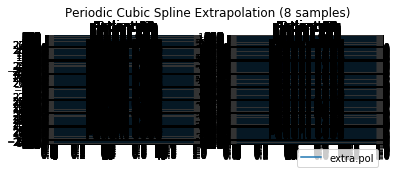

In [131]:
from scipy import interpolate
from scipy import arange, array, exp
from scipy.interpolate import InterpolatedUnivariateSpline

intertest = input_data2
# given values
fig = plt.figure()
fig.suptitle("Periodic Cubic Spline Extrapolation (8 samples) ")
i=0
for ind in range(input_data2[0].count()):
    i=i+1
    fig.add_subplot(ind,2,i)
    xxx = intertest.iloc[ind].index
    yyy = intertest.iloc[ind].values
    xi = xxx[(np.isnan(yyy).argmax()-8):np.isnan(yyy).argmax()]
    yi = yyy[(np.isnan(yyy).argmax()-8):np.isnan(yyy).argmax()]
    #print(yi)
#print(yyy)
# positions to inter/extrapolate
    x = range(np.isnan(yyy).argmax(),53)

# example showing the interpolation for linear, quadratic and cubic interpolation
    #plt.plot(xi, yi)


#for order in range(1, 4):
    try:
        s = interpolate.CubicSpline(xi, yi,3,extrapolate="periodic")
        y = s(x)
        #print(x)
        tem = list(intertest.iloc[ind][0:np.isnan(yyy).argmax()])+list(y)
        #print(len(tem))
        #print(intertest.iloc[ind].shape)
        intertest.iloc[ind]=tem
        #print( intertest.iloc[ind])
        plt.plot(range(53), intertest.iloc[ind],label="extra.pol")
        plt.title("Patient "+str(ind))
    except:
        print("Patient "+str(ind)+" not treated")
#plt.scatter(np.isnan(intertest.iloc[2987].values).argmax(),s(np.isnan(intertest.iloc[2987].values).argmax()))
#print(intertest.ix[])
    #print(intertest.iloc[2987].values)
#intertest.at[np.isnan(intertest.iloc[2987].values).argmax(), np.isnan(intertest.iloc[2987].values).argmax()] = s(np.isnan(intertest.iloc[2987].values).argmax())
    #intertest[np.isnan(intertest.iloc[ind].values).argmax()+1][ind] = s(np.isnan(intertest.iloc[ind].values).argmax()+1)
    #print(intertest[np.isnan(intertest.iloc[ind].values).argmax()+1][ind])
    #plt.plot(yyy,label='data')
plt.legend()
plt.show()
#f = np.poly1d(z)

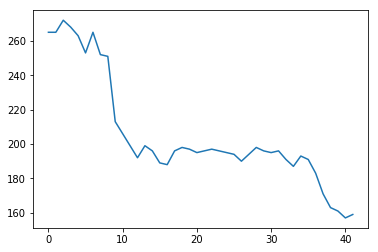

In [130]:
plt.plot(range(53), input_data2.iloc[6050],label="extra.pol")
#plt.plot(range(53), intertest.iloc[6067],label="extra.pol")
plt.show()

In [8]:
from scipy import interpolate
from scipy import arange, array, exp
from scipy.interpolate import InterpolatedUnivariateSpline

intertest = input_data
# given values
fig = plt.figure(figsize=(12,8))
fig.suptitle("Periodic sliding windows Cubic Spline Extrapolation (10 samples) ")
i=0
for ind in ("A0150","A0280"):
    i=i+1
    fig.add_subplot(2,input_data2[0].count(),i)
    xxx = intertest.iloc[ind].index
    yyy = intertest.iloc[ind].values
    xin = np.isnan(yyy).argmax()
    x = np.linspace(xin,52,(52-xin),dtype=int)
    #print(x)
    extrvec = []
    for inde in range(np.isnan(yyy).argmax(),52):
        x2 = xxx[(np.isnan(yyy).argmax()-10):np.isnan(yyy).argmax()]
        y2 = yyy[(np.isnan(yyy).argmax()-10):np.isnan(yyy).argmax()]
        s = interpolate.CubicSpline(x2, y2,extrapolate="periodic")
        y = s(np.isnan(yyy).argmax())
        #print(y)
        yyy[np.isnan(yyy).argmax()]=y
        extrvec.append(int(y))

    plt.title("Patient "+str(ind))
    
    #print(extrvec)
    #print(x)
    plt.plot(x,extrvec,label="extrapolated")
    plt.plot(yyy[0:xin+1],label='data')
    
plt.legend()
plt.show()
#f = np.poly1d(z)

TypeError: 'numpy.int32' object is not iterable

<Figure size 864x576 with 0 Axes>

In [9]:
yiii = input_data.iloc[150].values[0:52]
t = np.isnan(yiii).argmax()
print(t)

26


In [10]:
#plx = input_data2.iloc[168].index
#plt.plot(plx,f(plx))

In [11]:
input_data2 = input_data2.fillna(250)
print(input_data2)

NameError: name 'input_data2' is not defined

In [118]:
display(label2)

,file_name,label
0,A00001,0
1,A00002,0
2,A00003,0
3,A00004,1
4,A00005,1
5,A00006,0
6,A00007,0
8,A00009,1
9,A00010,0
10,A00011,0


In [12]:
#figshow=input_data2
#figshow.plot(y=10)
xplt=pd.DataFrame([figshow.iloc[150].values,figshow.iloc[280].values,figshow.iloc[1202].values,figshow.iloc[2987].values]).T
xplt.plot(legend=False,figsize=(12,8),subplots=True,layout=(2,2),sharex=True,title=["Patient 150","Patient 280","Patient 1202","Patient 2987"])

NameError: name 'input_data2' is not defined

In [93]:
from sklearn.model_selection import train_test_split

label2=label2.drop(label2[label2.file_name=='file_name'].index)
print(label2.head())
print(intertest.shape)

X=intertest.ix[:,:]
y=np.ravel(label2.label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print('x = ',X)
print(X_train.shape)
print(y_train.shape)
print(X_train)

  file_name label
0    A00001     0
1    A00002     0
2    A00003     0
3    A00004     1
4    A00005     1
(6072, 53)
x =         0      1      2      3      4      5      6      7      8      9   \
0   215.0  218.0  237.0  243.0  231.0  239.0  244.0  242.0  234.0  240.0   
0   306.0  301.0  305.0  318.0  305.0  315.0  321.0  308.0  108.0  213.0   
0   223.0  231.0  232.0  236.0  236.0  227.0  214.0  211.0  217.0  223.0   
0   286.0  277.0  323.0  358.0  309.0  342.0  403.0  253.0  215.0  224.0   
0   295.0  183.0  124.0   96.0  117.0  166.0  132.0  112.0  300.0  186.0   
0   251.0  255.0  275.0  297.0  310.0  316.0  306.0  305.0  313.0  316.0   
0   309.0  305.0  301.0  300.0  301.0  292.0  285.0  287.0  291.0  302.0   
0   145.0  139.0  204.0  175.0  212.0  173.0  261.0  216.0  159.0  194.0   
0   267.0  276.0  280.0  284.0  286.0  282.0  283.0  282.0  285.0  288.0   
0   253.0  261.0  263.0  255.0  262.0  260.0  256.0  258.0  248.0  240.0   
0   271.0  272.0  272.0  270.0  272.0  2

In [94]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout,Activation

print(X_train.shape)
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

#print(X_test.shape)
#print(X_train.shape)

input_shape=(X_train.shape[1],X_train.shape[2])
print(input_shape)

Using TensorFlow backend.


(4554, 53)
(53, 1)


In [114]:
from keras.layers import GlobalAveragePooling1D,MaxPooling1D
from keras import *
import keras
keras.backend.clear_session()
print(y_test.shape)
print(y_train.shape)
nb_epoch = 10
batch_size = 8
print(input_shape)
model = Sequential()
model.add(Conv1D(5,3,input_shape=input_shape, activation='relu'))
#print('layer 1')
#print(model.input_shape)
#print(model.output_shape)
model.add(Conv1D(100, 5, activation='relu'))
#print('layer 2')
#print(model.input_shape)
#print(model.output_shape)
model.add(MaxPooling1D(3))
model.add(Conv1D(150, 5, activation='sigmoid'))
#print('layer 3')
#print(model.input_shape)
#print(model.output_shape)
#model.add(MaxPooling1D(3))
#model.add(Conv1D(130, 2, activation='sigmoid'))
#print('layer 4')
#print(model.input_shape)
#print(model.output_shape)
#model.add(GlobalAveragePooling1D())
#model.add(Dropout(0.5))
model.add(Conv1D(100,5, activation='sigmoid'))
#print('layer 5')
#print(model.input_shape)
#print(model.output_shape)
model.add(Flatten())
model.add((Dense(3,activation='sigmoid')))
print('layer 6')
print(model.input_shape)
print(model.output_shape)

print(model.summary())
print(model.input_shape)
print(model.output_shape)
keras.optimizers.Adam(lr=0.02, decay=0.07, amsgrad=True,clipnorm=0.1)
#keras.optimizers.SGD(lr=0.08, momentum=0.9, decay=0.08)
#model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.compile(optimizer='adam', metrics=['accuracy'])
print("ok")
history = model.fit(X_train, y_train, batch_size=batch_size,
          epochs=nb_epoch, validation_data=(X_test, y_test))

(1518,)
(4554,)
(53, 1)
layer 6
(None, 53, 1)
(None, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 51, 5)             20        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 47, 100)           2600      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 11, 150)           75150     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 7, 100)            75100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 700)               0         
_________________________________________________________________
dense_1 (Dense)     

In [50]:
labels = pd.read_csv(os.path.join('C:/Users/kalboussi/Desktop/validation/', 'labels_verif.csv'), names=['file_name', 'label'])

# View DataFrame
print(labels.head(5))
print(labels['file_name'][0])

  file_name label
0    A00001     N
1    A00002     N
2    A00003     N
3    A00004     A
4    A00006     N
A00001


In [51]:
labels_copy=labels
print(labels_copy)
file_list=[]
for i in range(len(labels_copy['label'])):
    if (labels_copy['label'][i] == 'N') :
        labels_copy['label'][i] = 0
    elif (labels_copy['label'][i] == 'A') :
        labels_copy['label'][i] = 1
    elif (labels_copy['label'][i] == '~') :
        labels_copy['label'][i] = 2

    if (labels_copy['label'][i] == 2) or (labels_copy['label'][i] == 1) or (labels_copy['label'][i] == 0):
        file_list.append(labels['file_name'][i])
    else:
        file = labels['file_name'][i]
        labels_copy=labels_copy.drop(labels[labels.file_name==file].index)
print(file_list)
print(labels_copy)

    file_name label
0      A00001     N
1      A00002     N
2      A00003     N
3      A00004     A
4      A00006     N
5      A00007     N
6      A00009     A
7      A00010     N
8      A00011     N
9      A00012     N
10     A00014     N
11     A00015     A
12     A00016     N
13     A00018     N
14     A00019     N
15     A00021     N
16     A00025     N
17     A00026     N
18     A00027     A
19     A00028     N
20     A00031     N
21     A00032     N
22     A00033     N
23     A00034     N
24     A00035     N
25     A00036     N
26     A00037     N
27     A00039     N
28     A00040     N
29     A00042     N
..        ...   ...
200    A00551     A
201    A00585     ~
202    A01006     ~
203    A01070     ~
204    A01246     ~
205    A01299     ~
206    A01521     ~
207    A01567     ~
208    A01707     ~
209    A01727     ~
210    A01772     ~
211    A01833     ~
212    A02168     ~
213    A02372     ~
214    A02772     ~
215    A02785     ~
216    A02833     ~
217    A03549     ~


In [52]:
import scipy.io as sio
from biosppy.signals import ecg
from biosppy.signals.tools import filter_signal 

file_names = [file.split('.')[0] for file in os.listdir('C:/Users/kalboussi/Desktop/validation/') if file.endswith('.mat')]
label2 = labels_copy

rows_list = []
input_data= pd.DataFrame()


for file in file_list:
    signal = sio.loadmat(os.path.join('C:/Users/kalboussi/Desktop/validation/', file))['val'][0].astype('float')
    # Get BioSPPy ECG object
    ecg_object = ecg.ecg(signal=signal , sampling_rate=300, show=False)
    # Get BioSPPy output
    ts = ecg_object['ts']          # Signal time array
    rpeaks = ecg_object['rpeaks']  # rpeak indices
    hr = ecg_object['heart_rate']  # HR
   
    #if((len(ts)/300)==30):
    print(file)
    try :
        basic_features =[]
        rows_list.append(signal)
        print(rpeaks)
        for i in range(len(rpeaks)-1):
            basic_features.append(rpeaks[i+1]-rpeaks[i])
        feat = pd.DataFrame([basic_features])
        input_data=input_data.append([feat],ignore_index=False)
        print(feat.head())
    except Exception as e:
        print('problem', file, e)
    #else :
     #   label2 = label2.drop(label2[label2.file_name==file].index)
     #   print(file)
     #   print(len(ts)/300,' dropped')
print(input_data.head(20))

A00001
[ 127  342  560  797 1040 1271 1510 1754 1996 2230 2470 2713 2952 3189
 3433 3679 3914 4140 4370 4599 4827 5045 5260 5485 5711 5943 6164 6385
 6608 6827 7040 7259 7482 7697 7909 8128 8355 8586 8810]
    0    1    2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  215  218  237  243  231  239  244  242  234  240 ...   219  213  219  223   

    32   33   34   35   36   37  
0  215  212  219  227  231  224  

[1 rows x 38 columns]
A00002
[ 164  470  771 1076 1394 1699 2014 2335 2643 2751 2964 3289 3596 3906
 4219 4522 4818 5120 5369 5474 5558 5630 5774 5847 5949 6241 6531 6818
 7114 7425 7529 7693 7991 8286 8571 8860]
    0    1    2    3    4    5    6    7    8    9  ...    25   26   27   28  \
0  306  301  305  318  305  315  321  308  108  213 ...   290  287  296  311   

    29   30   31   32   33   34  
0  104  164  298  295  285  289  

[1 rows x 35 columns]
A00003
[  289   512   743   975  1211  1447  1674  1888  2099  2316  2539  2772
  3015  3265  3512 

    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  217  183  189  154  201  158  179  209  151  267 ...   263  268  276  191   

    37   38   39   40   41   42  
0  207  155  265  246  156  162  

[1 rows x 43 columns]
A00028
[   83   363   640   921  1204  1487  1768  2051  2339  2621  2905  3192
  3476  3757  4042  4327  4608  4890  5173  5455  5733  6015  6296  6575
  6855  7137  7420  7701  7982  8266  8549  8828  9111  9397  9676  9955
 10239 10521 10803 11087 11374 11656 11936 12219 12503 12783 13063 13348
 13630 13911 14195 14478 14758 15037 15320 15603 15881 16163 16446 16725
 17004 17287 17568 17848]
    0    1    2    3    4    5    6    7    8    9  ...    53   54   55   56  \
0  280  277  281  283  283  281  283  288  282  284 ...   283  283  278  282   

    57   58   59   60   61   62  
0  283  279  279  283  281  280  

[1 rows x 63 columns]
A00031
[ 167  406  640  867 1095 1319 1541 1761 1978 2191 2400 2611 2825 3042
 3260 3479 3703 3925

    0    1    2    3    4    5    6    7    8    9  ...    47   48   49   50  \
0  312  304  307  313  303  301  297  301  301  294 ...   298  298  297  305   

    51   52   53   54   55   56  
0  303  296  296  300  305  304  

[1 rows x 57 columns]
A00052
[ 235  500  784 1073 1348 1624 1901 2170 2414 2669 2932 3177 3426 3690
 3963 4299 4310 4533 4641 4785 4958 5204 5422 5675 5919 6143 6399]
    0    1    2    3    4    5    6    7    8    9  ...    16   17   18   19  \
0  265  284  289  275  276  277  269  244  255  263 ...   223  108  144  173   

    20   21   22   23   24   25  
0  246  218  253  244  224  256  

[1 rows x 26 columns]
A00053
[ 326  662  955 1224 1524 1835 2167 2498 2762 3108 3257 3320 3461 3825
 4017 4159 4522 4862 5225 5565 5819 5928 6262 6625 6970 7335 7680 8046
 8383 8690]
    0    1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  336  293  269  300  311  332  331  264  346  149 ...   254  109  334  363   

    23   24   25   26   27   

    0    1    2    3    4    5    6    7    8    9  ...    33   34   35   36  \
0  186  190  191  190  183  184  188  191  194  193 ...   208  206  200  199   

    37   38   39   40   41   42  
0  199  204  204  206  203  195  

[1 rows x 43 columns]
A00081
[  186   433   679   930  1178  1424  1672  1919  2166  2414  2661  2915
  3161  3406  3653  3901  4148  4396  4654  4915  5149  5395  5641  5888
  6136  6388  6641  6882  7129  7376  7624  7878  8131  8370  8617  8865
  9112  9360  9607  9854 10101 10349 10596 10843 11090 11336 11583 11842
 12114 12361 12590 12838 13084 13334 13588 13840 14081 14331 14588 14834
 15079 15327 15579 15835 16076 16323 16577 16832 17072 17319 17567 17820]
    0    1    2    3    4    5    6    7    8    9  ...    61   62   63   64  \
0  247  246  251  248  246  248  247  247  248  247 ...   252  256  241  247   

    65   66   67   68   69   70  
0  254  255  240  247  248  253  

[1 rows x 71 columns]
A00084
[ 318  602  863 1115 1299 1360 1597 1838 20

A00105
[  146   405   667   936  1212  1489  1771  2052  2361  2670  2960  3250
  3540  3830  4136  4444  4750  5073  5374  5674  6016  6351  6689  7014
  7336  7666  7998  8313  8611  8909  9232  9557  9865 10163 10453 10743
 11032 11310 11590 11881 12181 12485 12797 13098 13408 13715 14023 14320
 14633 14953 15264 15561 15864 16161 16478 16789 17083 17391 17710 18029]
    0    1    2    3    4    5    6    7    8    9  ...    49   50   51   52  \
0  259  262  269  276  277  282  281  309  309  290 ...   311  297  303  297   

    53   54   55   56   57   58  
0  317  311  294  308  319  319  

[1 rows x 59 columns]
A00106
[ 129  411  568  842  965 1233 1499 1766 2034 2306 2579 2853 3127 3401
 3674 3945 4213 4478 4746]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  282  157  274  123  268  266  267  268  272  273  274  274  274  273  271   

    15   16   17  
0  268  265  268  
A00107
[  69  159  249  340  431  524  612  710  810  893  989 1094 118

    0    1    2    3    4    5    6    7    8    9  ...    24   25   26   27  \
0  180  319  137  134  255  294  283  273  281  288 ...   257  260  262  273   

    28   29   30   31   32   33  
0  264  265  285  259  265  267  

[1 rows x 34 columns]
A00135
[  100   342   598   866  1145  1419  1699  1987  2279  2573  2856  3138
  3424  3719  4019  4314  4597  4879  5165  5464  5770  6079  6369  6656
  6947  7244  7542  7837  8123  8419  8725  9041  9344  9642  9939 10243
 10549 10844 11131 11430 11740 12055 12365 12665 12965 13269 13560 13832
 14087 14343 14604 14881 15174 15475 15770 16069 16381 16701 17023 17331
 17632]
    0    1    2    3    4    5    6    7    8    9  ...    50   51   52   53  \
0  242  256  268  279  274  280  288  292  294  283 ...   277  293  301  295   

    54   55   56   57   58   59  
0  299  312  320  322  308  301  

[1 rows x 60 columns]
A00137
[ 143  342  542  671  819 1027 1160 1354 1518 1695 1906 2063 2236 2488
 2661 2811 2972 3136 3255 3432 3599 37

A00160
[ 245  437  630  822 1012 1205 1398 1595 1785 1978 2173 2370 2567 2759
 2954 3149 3345 3537 3731 3925 4116 4308 4496 4685 4871 5058 5243 5429
 5616 5803 5992 6180 6367 6559 6749 6935 7118 7301 7486 7671 7855 8039
 8222 8406 8592 8776]
    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  192  193  192  190  193  193  197  190  193  195 ...   183  183  185  185   

    39   40   41   42   43   44  
0  184  184  183  184  186  184  

[1 rows x 45 columns]
A00163
[  97  353  409  733  896 1310 1626 1900 2195 2493 2813 3093 3401 3717
 4048 4341 4656 4977 5312 5607 5920 6233 6557 6843 7148 7473 7772 8055
 8361 8686]
    0   1    2    3    4    5    6    7    8    9  ...    19   20   21   22  \
0  256  56  324  163  414  316  274  295  298  320 ...   313  313  324  286   

    23   24   25   26   27   28  
0  305  325  299  283  306  325  

[1 rows x 29 columns]
A00164
[  130   222   324   445   515   601   753   904  1062  1116  1316  1514
  1715  1931  2

A00184
[ 259  558  823 1091 1394 1667 1930 2204 2497 2758 3029 3325 3598 3861
 4138 4443 4699 4977 5285 5551 5825 6127 6388 6655 6945 7207 7470 7732
 7999 8287 8535 8795]
    0    1    2    3    4    5    6    7    8    9  ...    21   22   23   24  \
0  299  265  268  303  273  263  274  293  261  271 ...   261  267  290  262   

    25   26   27   28   29   30  
0  263  262  267  288  248  260  

[1 rows x 31 columns]
A00185
[ 200  368  565  764  969 1175 1381 1588 1795 2002 2204 2407 2616 2757
 2822 3031 3238 3444 3644 3846 4051 4255 4459 4662 4865 5063 5261 5460
 5658 5856 6053 6249 6440 6632 6824 7014 7203 7394 7584 7773 7962 8152
 8343 8533 8724]
    0    1    2    3    4    5    6    7    8    9  ...    34   35   36   37  \
0  168  197  199  205  206  206  207  207  207  202 ...   190  189  191  190   

    38   39   40   41   42   43  
0  189  189  190  191  190  191  

[1 rows x 44 columns]
A00188
[ 138  380  598  815 1031 1249 1454 1677 1922 2154 2389 2607 2861 3094
 3324 3535

A00217
[ 254  523  720  808  987 1184 1510 1722 1924 2166 2382 2604 2800 2994
 3266 3534 3777 4047 4271 4487 4713 4913 5059 5331 5610 5847 6127 6248
 6500 6797 7016 7227 7451 7703 7898 8114 8338 8534 8804]
    0    1   2    3    4    5    6    7    8    9  ...    28   29   30   31  \
0  269  197  88  179  197  326  212  202  242  216 ...   297  219  211  224   

    32   33   34   35   36   37  
0  252  195  216  224  196  270  

[1 rows x 38 columns]
A00219
[ 114  344  536  753  890 1088 1280 1362 1469 1665 1900 2097 2292 2491
 2692 2905 3124 3349 3577 3800 4019 4251 4501 4788 5070 5331 5588 5868
 6152 6422 6678 6945 7220 7491 7734 7975 8219 8474 8731]
    0    1    2    3    4    5   6    7    8    9  ...    28   29   30   31  \
0  230  192  217  137  198  192  82  107  196  235 ...   270  256  267  275   

    32   33   34   35   36   37  
0  271  243  241  244  255  257  

[1 rows x 38 columns]
A00221
[ 190  473  730 1000 1214 1458 1697 1962 2180 2419 2637 2844 3058]
    0    1    

    0    1    2    3    4    5    6    7    8    9  ...    14   15   16   17  \
0  247  203  195  166  222  214  213  209  224  230 ...   237  211  214  204   

    18   19   20   21   22   23  
0  186  219  195  189  179  178  

[1 rows x 24 columns]
A00240
[ 151  355  558  761  965 1167 1368 1571 1774 1976 2178 2381 2583 2783
 2982 3183 3380 3577 3771 3966 4162 4358 4556 4756 4956 5156 5354 5553
 5662 5753 5955 6160 6362 6563 6765 6965 7170 7376 7584 7788 7994 8066
 8200 8406 8609 8812]
    0    1    2    3    4    5    6    7    8    9  ...    35   36   37   38  \
0  204  203  203  204  202  201  203  203  202  202 ...   205  206  208  204   

    39  40   41   42   43   44  
0  206  72  134  206  203  203  

[1 rows x 45 columns]
A00241
[  161   422   678   937  1202  1471  1741  2012  2282  2544  2813  3085
  3357  3628  3894  4162  4433  4697  4958  5226  5497  5769  6034  6304
  6578  6854  7123  7391  7660  7921  8173  8426  8682  8942  9198  9453
  9718  9989 10259 10530 10805

    0    1    2    3    4    5    6    7    8    9  ...    44   45   46   47  \
0  158  172  154  118  176  118  119  140  122  152 ...   117  201  170  114   

    48   49   50   51   52   53  
0  116  143  204  197  142  156  

[1 rows x 54 columns]
A00438
[  98  393  574  865 1048 1343 1523 1813 1989 2293 2461 2764 2935 3237
 3408 3714 3880 4183 4357]
    0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  295  181  291  183  295  180  290  176  304  168  303  171  302  171  306   

    15   16   17  
0  166  303  174  
A00439
[  131   318   573   770   966  1264  1460  1698  1925  2109  2345  2519
  2711  2914  3146  3327  3678  3888  4097  4438  4620  4781  5128  5393
  5728  5898  6181  6394  6613  6797  7141  7295  7576  7804  8182  8523
  8763  9027  9221  9654  9903 10195 10383 10714 10897 11152 11448 11621
 11842 12043 12319 12590 12866 13050 13320 13524 13721 14056 14298 14531
 14664 14864 15058 15453 15665 15914 16163 16337 16638 16821 17062 17355

A01707
[  142   235   381   452   541   634   700   798   924  1038  1147  1264
  1338  1508  1766  1904  2021  2125  2310  2375  2486  2576  2713  2814
  2934  3010  3151  3294  3387  3481  3548  3696  3837  3907  4014  4015
  4159  4250  4371  4449  4538  4731  4820  4957  5044  5174  5279  5393
  5506  5639  5854  5949  6015  6117  6199  6324  6396  6520  6610  6716
  6822  6900  6964  7106  7202  7343  7379  7543  7633  7706  7854  7977
  8114  8210  8242  8483  8678  8805  8932  9036  9148  9346  9524  9618
  9860 10007 10082 10169 10238 10329 10345 10460 10584 10690 10762 10876
 11041 11141 11236]
   0    1   2   3   4   5   6    7    8    9  ...  88  89   90   91   92  93  \
0  93  146  71  89  93  66  98  126  114  109 ...  91  16  115  124  106  72   

    94   95   96  97  
0  114  165  100  95  

[1 rows x 98 columns]
A01727
[  66  214  319  604  680  788  915 1062 1260 1344 1552 1632 1694 1847
 1906 2014 2204 2305 2395 2545 2685 2755 2875 3065 3175 3350 3430 3574
 3775 3945

A04701
[ 172 1142 1333 1525 1720 1925 2103 2329 2546 2778 3000 3199 3628 3770
 3942 4138 4318 4530 4714 4916 4992 5067]
    0    1    2    3    4    5    6    7    8    9  ...   11   12   13   14  \
0  970  191  192  195  205  178  226  217  232  222 ...  429  142  172  196   

    15   16   17   18  19  20  
0  180  212  184  202  76  75  

[1 rows x 21 columns]
A04735
[ 203  356  557  690  787 1067 1483 2501 3130 3252 3502 3910 4100 4589
 5401 5567 6054 6538 6670 7026 7512 8000 8231 8491]
    0    1    2   3    4    5     6    7    8    9  ...    13   14   15   16  \
0  153  201  133  97  280  416  1018  629  122  250 ...   812  166  487  484   

    17   18   19   20   21   22  
0  132  356  486  488  231  260  

[1 rows x 23 columns]
A04805
[  78  279  485  731  910 1028 1215 1475 1695 1802 1927 2181 2334 2502
 2596 2739 3044 3331 3414 3669 3832 3990 4102 4227 4313 4553 4775 5078
 5493 5900 6027 6136 6298 6384 6639 7132 7271 7461 7654 7916 8096 8226
 8754]
    0    1    2    3    4

In [53]:
print(input_data)

    0    1    2    3    4    5     6    7    8    9   ...   99   100  101  \
0   215  218  237  243  231  239   244  242  234  240 ...   NaN  NaN  NaN   
0   306  301  305  318  305  315   321  308  108  213 ...   NaN  NaN  NaN   
0   223  231  232  236  236  227   214  211  217  223 ...   NaN  NaN  NaN   
0   286  277  323  358  309  342   403  253  215  224 ...   NaN  NaN  NaN   
0   251  255  275  297  310  316   306  305  313  316 ...   NaN  NaN  NaN   
0   309  305  301  300  301  292   285  287  291  302 ...   NaN  NaN  NaN   
0   145  139  204  175  212  173   261  216  159  194 ...   NaN  NaN  NaN   
0   267  276  280  284  286  282   283  282  285  288 ...   NaN  NaN  NaN   
0   253  261  263  255  262  260   256  258  248  240 ...   NaN  NaN  NaN   
0   271  272  272  270  272  273   271  272  274  270 ...   NaN  NaN  NaN   
0   301  309  277  292  298  304   327  323  312  338 ...   NaN  NaN  NaN   
0   135  150  287  313  173  251   151  242  262  229 ...   NaN  NaN  NaN   

In [54]:
input_data2= pd.DataFrame()
input_data2 = input_data.dropna(thresh=40,axis='columns')
input_data2 = input_data2.fillna(250)
print(input_data2)

     0    1    2    3    4    5     6    7    8    9   ...       43     44  \
0   215  218  237  243  231  239   244  242  234  240  ...    250.0  250.0   
0   306  301  305  318  305  315   321  308  108  213  ...    250.0  250.0   
0   223  231  232  236  236  227   214  211  217  223  ...    223.0  210.0   
0   286  277  323  358  309  342   403  253  215  224  ...    250.0  250.0   
0   251  255  275  297  310  316   306  305  313  316  ...    250.0  250.0   
0   309  305  301  300  301  292   285  287  291  302  ...    250.0  250.0   
0   145  139  204  175  212  173   261  216  159  194  ...    184.0  201.0   
0   267  276  280  284  286  282   283  282  285  288  ...    270.0  267.0   
0   253  261  263  255  262  260   256  258  248  240  ...    250.0  250.0   
0   271  272  272  270  272  273   271  272  274  270  ...    250.0  250.0   
0   301  309  277  292  298  304   327  323  312  338  ...    250.0  250.0   
0   135  150  287  313  173  251   151  242  262  229  ...    25

In [55]:
#help(model.evaluate)
print(input_data2.shape)
#input_data2 = np.expand_dims(input_data2, axis=2)

#print(input_shape)


(230, 53)


In [56]:
X = np.expand_dims(input_data2, axis=2)

In [57]:
y=np.ravel(labels_copy.label)
print(X.shape)
print(y)

(230, 53, 1)
[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]


In [58]:
model.evaluate(X,y)

230/230 [==============================] - 0s 343us/step


[0.2553476973720219, 0.908695652173913]

In [59]:
pred = model.predict_classes(X)

In [21]:
print(pred)

[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 2
 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2]


In [22]:
actual = pd.read_csv(os.path.join('C:/Users/kalboussi/Desktop/validation/', 'labels_verif.csv'), names=['file_name', 'label'])

In [23]:
print(actual)

    file_name label
0      A00001     N
1      A00002     N
2      A00003     N
3      A00004     A
4      A00006     N
5      A00007     N
6      A00009     A
7      A00010     N
8      A00011     N
9      A00012     N
10     A00014     N
11     A00015     A
12     A00016     N
13     A00018     N
14     A00019     N
15     A00021     N
16     A00025     N
17     A00026     N
18     A00027     A
19     A00028     N
20     A00031     N
21     A00032     N
22     A00033     N
23     A00034     N
24     A00035     N
25     A00036     N
26     A00037     N
27     A00039     N
28     A00040     N
29     A00042     N
..        ...   ...
200    A00551     A
201    A00585     ~
202    A01006     ~
203    A01070     ~
204    A01246     ~
205    A01299     ~
206    A01521     ~
207    A01567     ~
208    A01707     ~
209    A01727     ~
210    A01772     ~
211    A01833     ~
212    A02168     ~
213    A02372     ~
214    A02772     ~
215    A02785     ~
216    A02833     ~
217    A03549     ~


In [24]:
labels_copy=actual
print(labels_copy)
file_list=[]
for i in range(len(labels_copy['label'])):
    if (labels_copy['label'][i] == 'N') :
        labels_copy['label'][i] = 0
    elif (labels_copy['label'][i] == 'A') :
        labels_copy['label'][i] = 1
    elif (labels_copy['label'][i] == '~') :
        labels_copy['label'][i] = 2
print(labels_copy)

    file_name label
0      A00001     N
1      A00002     N
2      A00003     N
3      A00004     A
4      A00006     N
5      A00007     N
6      A00009     A
7      A00010     N
8      A00011     N
9      A00012     N
10     A00014     N
11     A00015     A
12     A00016     N
13     A00018     N
14     A00019     N
15     A00021     N
16     A00025     N
17     A00026     N
18     A00027     A
19     A00028     N
20     A00031     N
21     A00032     N
22     A00033     N
23     A00034     N
24     A00035     N
25     A00036     N
26     A00037     N
27     A00039     N
28     A00040     N
29     A00042     N
..        ...   ...
200    A00551     A
201    A00585     ~
202    A01006     ~
203    A01070     ~
204    A01246     ~
205    A01299     ~
206    A01521     ~
207    A01567     ~
208    A01707     ~
209    A01727     ~
210    A01772     ~
211    A01833     ~
212    A02168     ~
213    A02372     ~
214    A02772     ~
215    A02785     ~
216    A02833     ~
217    A03549     ~


In [25]:
y_true = np.asarray(labels_copy['label'])
print(y_true)
y_true = y_true.astype(int)
cm = [y_true,pred]
print(cm)

[0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0

In [26]:
import tensorflow as tf

In [27]:
from sklearn.metrics import classification_report
report = classification_report(y_true, pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       1.00      0.86      0.92        50
           2       0.78      0.93      0.85        30

   micro avg       0.94      0.94      0.94       230
   macro avg       0.91      0.92      0.91       230
weighted avg       0.95      0.94      0.94       230



[[146   0   4]
 [  3  43   4]
 [  2   0  28]]


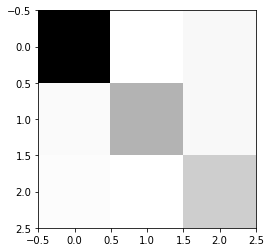

In [28]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,pred)
print(cm)
plt.imshow(cm, cmap='binary')

<Figure size 432x288 with 0 Axes>

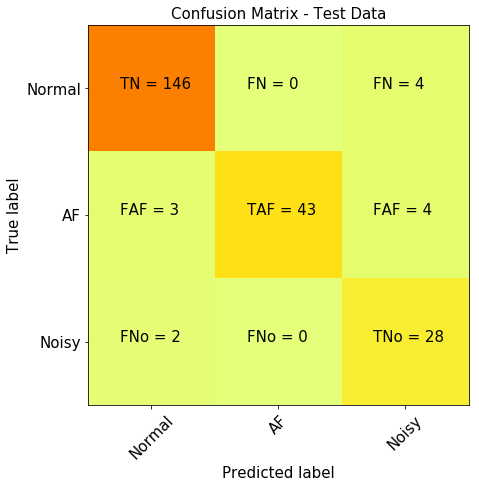

In [29]:
plt.clf()
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

plt.figure(num=None, figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Normal','AF','Noisy']
plt.title('Confusion Matrix - Test Data',fontsize=15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FN','FN'], ['FAF', 'TAF','FAF'],['FNo', 'FNo','TNo']]
for i in range(3):
    for j in range(3):
        plt.text(j-0.25,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=15)
plt.show()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


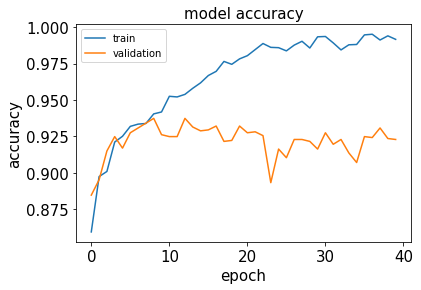

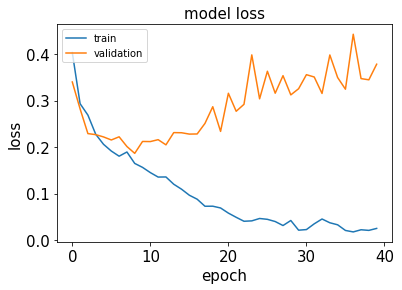

In [30]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy',fontsize=15)
plt.ylabel('accuracy',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss',fontsize=15)
plt.ylabel('loss',fontsize=15)
plt.xlabel('epoch',fontsize=15)
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split

C = 1.0  
labels = pd.read_csv(os.path.join(label_path, 'labels.csv'), names=['file_name', 'label'])

#print(labels.head(5))
#print(labels['file_name'][0])
labels=labels.drop(labels[labels.file_name=='file_name'].index)
#print(labels)

labels_copy=labels
#print(labels_copy)
file_list=[]
for i in range(len(labels_copy['label'])):
    if (labels_copy['label'][i] == 'N') or (labels_copy['label'][i] == 'A') or (labels_copy['label'][i] == '~'):
        file_list.append(labels['file_name'][i])
    else:
        file = labels['file_name'][i]
        labels_copy=labels_copy.drop(labels[labels.file_name==file].index)

X=input_data2.ix[:,:]
y=np.ravel(labels_copy.label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#print(X_train.iloc[:200])

#model = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
#model = svm.LinearSVC(C=C)
# SVC with RBF kernel
#model = svm.SVC(kernel='rbf', gamma=0.6, C=0.6)
# SVC with polynomial (degree 3) kernel
model = svm.SVC(kernel='poly', degree=3, C=C)
model.fit(X_train.iloc[:5000], y_train[:5000])
model.score(X_train, y_train)
#Predict Output
#predicted= model.predict(X_test)

In [57]:
model.score(X_test, y_test)

0.8293807641633728

In [31]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

for K in range(0,50):
 K_value= K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train, y_train) 
 y_pred = neigh.predict(X_train)
 print("Accuracy is ", round((accuracy_score(y_train,y_pred)*100),2),"% validation ",(round((neigh.score(X_test, y_test)*100),2)),"% for K-Value:",K_value)
 

Accuracy is  100.0 % validation  84.72 % for K-Value: 1
Accuracy is  94.8 % validation  85.57 % for K-Value: 2
Accuracy is  88.58 % validation  85.24 % for K-Value: 3
Accuracy is  88.36 % validation  85.77 % for K-Value: 4
Accuracy is  86.96 % validation  85.38 % for K-Value: 5
Accuracy is  87.04 % validation  85.57 % for K-Value: 6
Accuracy is  86.54 % validation  85.31 % for K-Value: 7
Accuracy is  86.52 % validation  85.31 % for K-Value: 8
Accuracy is  86.41 % validation  85.18 % for K-Value: 9
Accuracy is  86.36 % validation  85.18 % for K-Value: 10
Accuracy is  86.36 % validation  85.11 % for K-Value: 11
Accuracy is  86.32 % validation  85.11 % for K-Value: 12
Accuracy is  86.34 % validation  85.11 % for K-Value: 13
Accuracy is  86.36 % validation  85.11 % for K-Value: 14
Accuracy is  86.3 % validation  85.05 % for K-Value: 15
Accuracy is  86.32 % validation  85.05 % for K-Value: 16
Accuracy is  86.23 % validation  85.05 % for K-Value: 17
Accuracy is  86.21 % validation  85.05 % f